# KC HOUSE SALE DATA REGRESSION ANALYSIS

<font size="4">IMPORT DATA WRANGLING LIBRARIES</font>

In [1]:
## Import data wrangling libraries
import warnings
warnings.filterwarnings("ignore", message="Automatic reindexing on DataFrame vs Series comparisons is deprecated")
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import random as rnd
from numpy.linalg import eig

<font size="4"> VISUALIZATION LIBRARIES 

</font>

<font size="3">
    
I have included several visualizations using the Bokeh interactive library. To view these charts and interact with them, it is necessary to run the Jupyter Notebook. However, I have also included static visualizations using libraries such as Seaborn and Matplotlib, which are readily visible without running any code. These visualizations provide a comprehensive overview of the data, allowing for a deeper understanding of the patterns, relationships, and insights derived from the analysis.
</font>

In [2]:
## Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

In [3]:
## import interactive Bokeh libraries
from bokeh.io import push_notebook, show, output_notebook
from bokeh.palettes import Category20c
from bokeh.layouts import row 
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.io import show
import pandas_bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.plotting import figure, output_file, show
from bokeh.models.widgets import DataTable, TableColumn
pandas_bokeh.output_notebook()
from bokeh.plotting import output_file, show
from bokeh.colors import RGB

Loading BokehJS ...

<font size="4">IMPORT MACHINE LEARINING MODELS</font>

In [4]:
## import machine learning model

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


<font size="4">IMPORT PREPROCESSING AND EVALUATION LIBRARIES</font>

In [5]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from sklearn.decomposition import PCA
from numpy import mean
from numpy import std
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score

<font size="4">LOADING DATA</font>

In [6]:
## Lodining data into pandas dataframe

data = pd.read_csv("data/kc_house_data.csv") # kc_data set from kaggle 
data = data.iloc[:,0:len(data)]# data retrieval
pd.set_option('display.max_columns', 25) # display 25 columns
pd.set_option('display.max_rows', 10) # display 10 rows
pd.set_option('display.width', 1000) # display 1000 charectors

# EXPLORATORY ANALYSIS

In [7]:
data.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<font size="3">The dataset contain 21 columns with 21613 rows as shown above. There are 5 float64, 15 int64 and 1 objects data type exists. No missing data found </font>

In [8]:

print('Shape of the train dataset:', data.shape) ## get the shape of the train data


Shape of the train dataset: (21613, 21)


 <font size="3">INSPECTION OF MISSING DATA </font>

In [9]:
## Check for NaN values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
                ..
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Length: 21, dtype: int64

<font size="3">No NaN value column exists</font>

In [10]:
## Check column values
data.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [11]:
## Checking duplicate entries
duplicate = data[data.duplicated('id')] 

duplicate

id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
94     6021501535  20141223T000000   700000.0         3       1.50         1580      5000     1.0           0     0          3      8        1290            290      1939             0    98117  47.6870 -122.386           1570        4500
314    4139480200  20141209T000000  1400000.0         4       3.25         4290     12103     1.0           0     3          3     11        2690           1600      1997             0    98006  47.5503 -122.102           3860       11244
325    7520000520  20150311T000000   240500.0         2       1.00         1240     12092     1.0           0     0          3      6         960            280      1922          1984    98146  47.4957 -122.352           1820        7460
346    3969300030  20141229T000000   239900.0         4       1.00         1000      7134     1.0           0     0          3      6        1000              0      1943             0    98178  47.4897 -122.240           1020        7138
372    2231500030  20150324T000000   530000.0         4       2.25         2180     10754     1.0           0     0          5      7        1100           1080      1954             0    98133  47.7711 -122.341           1810        6929
...           ...              ...        ...       ...        ...          ...       ...     ...         ...   ...        ...    ...         ...            ...       ...           ...      ...      ...      ...            ...         ...
20181  7853400250  20150219T000000   645000.0         4       3.50         2910      5260     2.0           0     0          3      9        2910              0      2012             0    98065  47.5168 -121.883           2910        5260
20613  2724049222  20141201T000000   220000.0         2       2.50         1000      1092     2.0           0     0          3      7         990             10      2004             0    98118  47.5419 -122.271           1330        1466
20670  8564860270  20150330T000000   502000.0         4       2.50         2680      5539     2.0           0     0          3      8        2680              0      2013             0    98045  47.4759 -121.734           2680        5992
20780  6300000226  20150504T000000   380000.0         4       1.00         1200      2171     1.5           0     0          3      7        1200              0      1933             0    98133  47.7076 -122.342           1130        1598
21581  7853420110  20150504T000000   625000.0         3       3.00         2780      6000     2.0           0     0          3      9        2780              0      2013             0    98065  47.5184 -121.886           2850        6000

[177 rows x 21 columns]

<font size="3">There are 177 rows with duplicate values and dropped them</font>

In [12]:
## Drop duplicate entries from the dataset

data = data.drop_duplicates(subset='id')
print(data.shape)

(21436, 21)


In [13]:
## Checking duplicate entries
duplicate = data[data.duplicated('id')] 
duplicate.head(5)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In [14]:
##  get top 5 rows of dataset

data.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0         3       1.00         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1  6414100192  20141209T000000  538000.0         3       2.25         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639
2  5631500400  20150225T000000  180000.0         2       1.00          770     10000     1.0           0     0          3      6         770              0      1933             0    98028  47.7379 -122.233           2720        8062
3  2487200875  20141209T000000  604000.0         4       3.00         1960      5000     1.0           0     0          5      7        1050            910      1965             0    98136  47.5208 -122.393           1360        5000
4  1954400510  20150218T000000  510000.0         3       2.00         1680      8080     1.0           0     0          3      8        1680              0      1987             0    98074  47.6168 -122.045           1800        7503

In [15]:
##  get bottom 5 rows of dataset
data.tail(5)

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
21608   263000018  20140521T000000  360000.0         3       2.50         1530      1131     3.0           0     0          3      8        1530              0      2009             0    98103  47.6993 -122.346           1530        1509
21609  6600060120  20150223T000000  400000.0         4       2.50         2310      5813     2.0           0     0          3      8        2310              0      2014             0    98146  47.5107 -122.362           1830        7200
21610  1523300141  20140623T000000  402101.0         2       0.75         1020      1350     2.0           0     0          3      7        1020              0      2009             0    98144  47.5944 -122.299           1020        2007
21611   291310100  20150116T000000  400000.0         3       2.50         1600      2388     2.0           0     0          3      8        1600              0      2004             0    98027  47.5345 -122.069           1410        1287
21612  1523300157  20141015T000000  325000.0         2       0.75         1020      1076     2.0           0     0          3      7        1020              0      2008             0    98144  47.5941 -122.299           1020        1357

<font size="3">
DESCRIPTIVE STATISTICAL ANALYSIS
</font>

In [16]:
## Describe data
pd.set_option('display.float_format', '{:.2f}'.format) # set to display 2 decimal places.
data.describe()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot   floors  waterfront     view  condition    grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
count      21436.00   21436.00  21436.00   21436.00     21436.00   21436.00 21436.00    21436.00 21436.00   21436.00 21436.00    21436.00       21436.00  21436.00      21436.00 21436.00 21436.00 21436.00       21436.00    21436.00
mean  4580765328.18  540529.29      3.37       2.12      2082.70   15135.64     1.50        0.01     0.24       3.41     7.66     1790.96         291.74   1971.10         84.73 98077.86    47.56  -122.21        1988.31    12785.96
std   2876589633.67  367689.30      0.93       0.77       919.15   41538.62     0.54        0.09     0.77       0.65     1.17      829.03         442.78     29.39        402.43    53.47     0.14     0.14         685.70    27375.47
min      1000102.00   75000.00      0.00       0.00       290.00     520.00     1.00        0.00     0.00       1.00     1.00      290.00           0.00   1900.00          0.00 98001.00    47.16  -122.52         399.00      651.00
25%   2123700078.75  322150.00      3.00       1.75      1430.00    5040.00     1.00        0.00     0.00       3.00     7.00     1200.00           0.00   1952.00          0.00 98033.00    47.47  -122.33        1490.00     5100.00
50%   3904921185.00  450000.00      3.00       2.25      1920.00    7614.00     1.50        0.00     0.00       3.00     7.00     1560.00           0.00   1975.00          0.00 98065.00    47.57  -122.23        1840.00     7620.00
75%   7308675062.50  645000.00      4.00       2.50      2550.00   10696.25     2.00        0.00     0.00       4.00     8.00     2220.00         560.00   1997.00          0.00 98117.00    47.68  -122.12        2370.00    10087.25
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00     3.50        1.00     4.00       5.00    13.00     9410.00        4820.00   2015.00       2015.00 98199.00    47.78  -121.31        6210.00   871200.00

<font size="3">
    
The average price is 540,529 with a standard deviation of 367,689. The range of prices appears to be quite wide, spanning from 75,000 to 7,700,000. The statistical information for the predictors is displayed above.
    

</font>

In [17]:
## Statistics of categorical featur date
data.describe(include=['O']) # object data type

date
count             21436
unique              372
top     20140623T000000
freq                142

In [18]:
## check value counts in waterfront feature
data.groupby(['waterfront'])['waterfront'].count()

waterfront
0    21273
1      163
Name: waterfront, dtype: int64

<font size="3">
    
 There are 163 flats with a waterfront and 21,273 flats without a waterfront.
    
</font>

In [19]:
data.groupby(['waterfront'])['price'].mean()

waterfront
0    531937.20
1   1661876.02
Name: price, dtype: float64

<font size="3">
    
The mean price for waterfront houses is significantly higher than non-waterfront houses, it suggests that waterfront properties tend to have higher prices on average. 
    
</font>

In [20]:
## Counting the number of bedrooms 
data['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
      ... 
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, Length: 13, dtype: int64

In [21]:
## Counting the number of bedrooms 
data.groupby(['bedrooms'])['price'].mean()

bedrooms
0     409503.85
1     317680.59
2     400925.49
3     466482.55
4     635648.62
        ...    
8    1105076.92
9     893999.83
10    819333.33
11    520000.00
33    640000.00
Name: price, Length: 13, dtype: float64

<font size="3">
    
Convert the date attribute to date time format 
    

</font>

In [22]:
## check floor value count
data['floors'].value_counts()


1.00    10559
2.00     8209
1.50     1888
3.00      611
2.50      161
3.50        8
Name: floors, dtype: int64

In [23]:
## Counting the numbesr of view feature
data.groupby(['view'])['view'].count()

view
0    19320
1      331
2      962
3      507
4      316
Name: view, dtype: int64

In [24]:
## Counting the numbesr of yr-renovated feature
data.groupby(['yr_renovated'])['yr_renovated'].count()

yr_renovated
0       20526
1934        1
1940        2
1944        1
1945        3
        ...  
2011       13
2012       11
2013       37
2014       91
2015       16
Name: yr_renovated, Length: 70, dtype: int64

<font size="3">
    
Features like 'view' and 'yr-renovated' having mojority of zero values. Let see any significance on predicting the price
</font>

In [25]:
## transform to date format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21436, dtype: datetime64[ns]

<font size="4">DATA VISUALIZATION</font>

# DATA VISUALIZATION

In [26]:
## Create the mean price line chart of houses over the perod  in an interactive bokeh library

plt_date= data.groupby(['date'])['price'].mean() # extract price by date
labels = list(set(data['date']))

plt_date.plot_bokeh(kind="line",title ="Mean house price over the period",
                   figsize =(1000,600), 
                   xlabel = "Date",
                   ylabel="Price", stacked = True)


Figure(id='1003', ...)

<font size="3">The heighest price of house sold in Sep 2014</font>

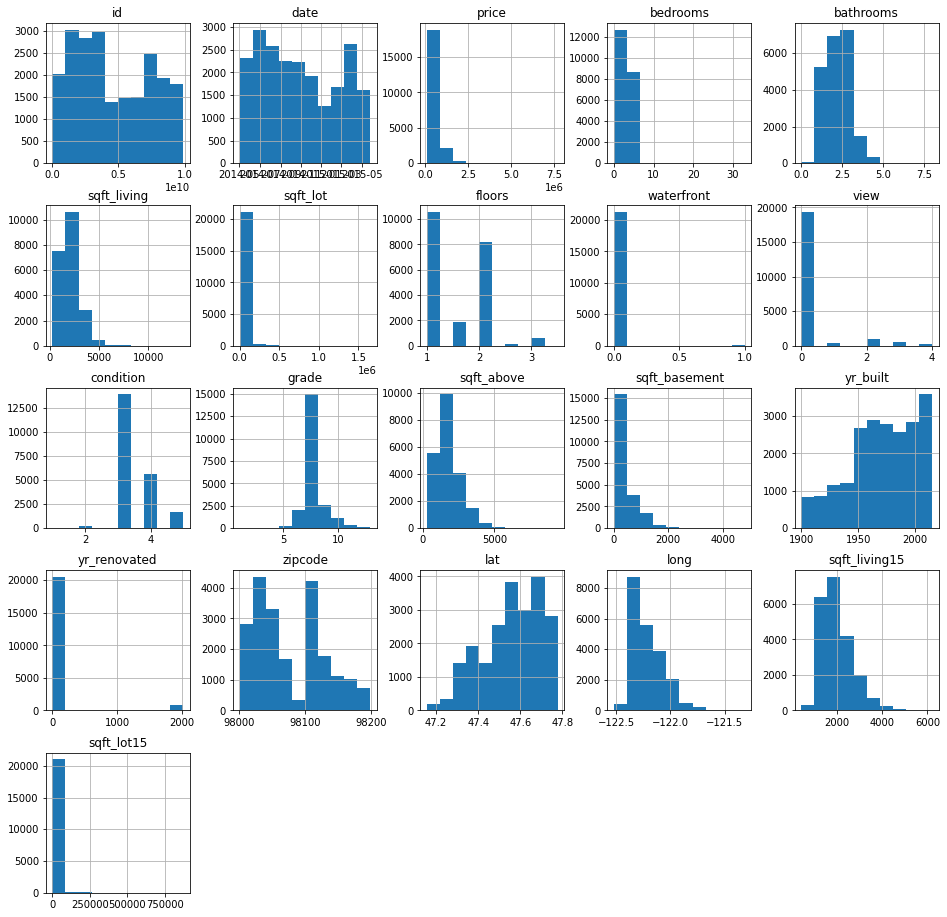

In [27]:
## Plot histogram of numerical variables
data.hist(figsize=(16,16))
plt.show()

<font size="4">
    
Observations of key features:
    
Price Distribution: The distribution of prices is right-skewed, meaning that there is a longer tail on the right side of the distribution indicating higher-priced house.

Bedrooms Distribution: The distribution of bedrooms is approximately normal, suggesting that the number of bedrooms follows a typical bell-shaped curve.

Bathroom Frequencies: The distribution is approximately normal, indicating that there are more properties with a certain number of bathrooms and fewer properties with lower bathroom counts.

Sqft_living: The distribution of small area flats is concentrated around 2500 sqft, suggesting that a significant number of properties have an area close to that value.

Sqft_lot Size: The distribution of lot sizes (sqft_lot) is concentrated on the lower side, indicating that a majority of properties have smaller lot sizes.

Floors Distribution: The distribution of the number of floors appears to be discrete, with 1 and 2 story houses being the most common, indicating that single-story and two-story houses are predominant in the dataset.

View and Condition: Both view and condition variables exhibit discrete distributions, indicating that there are a limited number of distinct categories for these features.

    
    

    
</font>

In [28]:
## Chart of waterfront vs price in bokeh library

plt_w = data.groupby(['waterfront'])['price'].mean()# data extraction, price by waterfront class

## Assign RGB color
red = 200
green = 150
blue = 100
color = RGB(r = red,
            g = green,
            b = blue)

plt_w.plot_bokeh(kind="bar", title="Mean house price group by waterfront class",
                 figsize=(800, 500),
                 xlabel="Waterfront",
                 ylabel="Price",
                 #stacked=True,
                color = color)

Figure(id='1236', ...)

<font size="3">
    
The mean price for waterfront houses is significantly higher than non-waterfront houses, it suggests that waterfront properties tend to have higher prices on average. 
    
</font>

In [29]:
## Chart of price with number of bedrooms and waterfront in bokeh intractive library.

plt_p = data.groupby(['bedrooms','waterfront'])['price'].mean().unstack() # data extraction, bedrooms and waterfront
plt_p.plot_bokeh(kind="bar", title="Mean house price group by number of bedrooms and waterfront",
                 figsize=(800, 500),
                 xlabel="Bedrooms",
                 ylabel="Price",
                 stacked=False)


Figure(id='1401', ...)

<font size="3">
    
The mean price for 8-bedroom houses is significantly higher compared to houses with smaller or larger numbers of bedrooms. However, it is important to note that the mean price is influenced by various factors, and the number of bedrooms alone may not be the sole determinant of the price.
    
</font>

In [30]:
## Chart of floor vs price in bokeh library

plt_f = data.groupby(['floors'])['price'].mean() # extraxt floor and price details

##  Assogn RGB color
red = 300
green = 100
blue = 100
color = RGB(r = red,
            g = green,
            b = blue)

plt_f.plot_bokeh(kind="line", title="Mean house price base on floors",
                 figsize=(800, 500),
                 xlabel="Floors",
                 ylabel="Price",
                 stacked=True,
                color = color)

Figure(id='1557', ...)

<font size="3">
    
The mean price of houses with 2.5 floors appears to be higher compared to houses with a different number of floors.
    
There is a positive trend observed in the relationship between the number of floors and the mean price of houses. As the number of floors increases up to 2.5, the mean price tends to increase as well. However, this positive trend declines when the number of floors reaches 3, as the mean price starts to decrease. Interestingly, the mean price then climbs again when the number of floors reaches 3.5
    
This indicates that there may be a non-linear relationship between the number of floors and the mean price. The trend initially suggests that additional floors up to 2.5 are valued and contribute to higher prices. However, beyond a certain point (at 3 floors), additional floors may not have the same positive impact on the mean price. The subsequent increase in the mean price at 3.5 floors suggests that there could be other factors influencing this particular range of the number of floors.
    
</font>

In [31]:
## Chart of floor and waterfront vs price in bokeh library

plt_fw = data.groupby(['floors','waterfront'])['price'].mean().unstack() # extraxt floor and price wiath waterfront details

plt_fw.plot_bokeh(kind="bar", title="Mean house price of floors with waterfront",
                 figsize=(800, 500),
                 xlabel="Floors",
                 ylabel="Price",
                 stacked=True,)

Figure(id='1747', ...)

<font size="3">
    
The mean price of houses with 2.5 floors appears to be higher compared to houses with a different number of floors. It is consistant whether it waterfront location or not.
   
</font>

In [32]:
## Chart of bathrooms vs price in bokeh library

plt_b = data.groupby(['bathrooms'])['price'].mean() # data extraction, price by bathrooms

## Assign RGB color
red = 200
green = 100
blue = 120
color = RGB(r = red,
            g = green,
            b = blue)

plt_b.plot_bokeh(kind="bar", title="Mean house price base on bathrooms",
                 figsize=(800, 500),
                 xlabel="Bathrooms",
                 ylabel="Price",
                 stacked=True,
                color = color)

Figure(id='1957', ...)

<font size="3">
    
There is a positive trend in the relationship between the number of bathrooms and the mean price of houses up to 6.25 bathrooms. As the number of bathrooms increases within this range, the mean price tends to increase as well. However, once the number of bathrooms reaches 6.25, the mean price starts to drop, indicating a potential saturation point where additional bathrooms beyond this threshold may not contribute significantly to the price.

Interestingly, the subsequent trend appears to be non-linear, as the mean price experiences both increases and drops at different numbers of bathrooms. This suggests that there are other factors influencing the relationship between the number of bathrooms and the mean price.
    
</font>

In [33]:
## Line chart of sqft_living vs price in bokeh library

plt_s = data.groupby(['sqft_living',])['price'].mean()# data extraction, price by bathrooms

## Assign RGB color
red = 100
green = 200
blue = 180
color = RGB(r = red,
            g = green,
            b = blue)

plt_s.plot_bokeh(kind="line", title="Mean house price base on sqft_living",
                 figsize=(800, 500),
                 xlabel="Sqft_living",
                 ylabel="Price",
                 #stacked=True,
                color = color)

Figure(id='2121', ...)

<font size="3">
    
Based on the line chart, it is evident that there is an increasing trend in the price as the square footage of living space (sqft_living) increases. However, an interesting observation is that once the sqft_living reaches 12,000, there is a significant drop in the price.
    
</font>

<font size="3">
    
In addition to the relationship between price and sqft_living, it is important to consider the correlations between other features and the price as well. To gain a more insights of these relationships, it is recommended to examine the correlation matrix. The correlation matrix provides a quantitative measure of the correlations between predictors (such as bedrooms, bathrooms, floors, etc.) and the target variable (price).
</font>

In [34]:
## hbar chart of grade and bedrooms vs price in bokeh library

plt_g = data.groupby(['grade','bedrooms'])['price'].mean().unstack()# data extraction, price by grade and bedrooms

plt_g.plot_bokeh(kind="barh", title="Mean house price base on grade and bedrooms",
                 figsize=(800, 500),
                 xlabel="Price",
                 ylabel="Grade",
                 stacked=False,)
         

Figure(id='2337', ...)

<font size="3">
    
Based on the horrizontal bar chart, it is evident that there is an increasing trend in the price as the grade increases along with certain number of bedrooms. The heighest price combination was observed for 6 bedroom house with grade 13.
    
</font>

In [35]:
## point chart of lat and waterfront vs price in bokeh library

plt_g = data.groupby(['lat','waterfront'])['price'].mean().unstack()# data extraction, price by lat and waterfront

plt_g.plot_bokeh(kind="point", title="Mean house price base on lat and waterfront",
                 figsize=(800, 500),
                 xlabel="Lat",
                 ylabel="Price",
                 stacked=False,)

Figure(id='2746', ...)

<font size="3">
    
Based on the point chart, the higher the latitude, hose price is high for waterfront location. Also observed slight price variations in other loations as well.
    
</font>

In [36]:
## Correlation matrix between features in table form
cormat = data.corr()#correlation matrix
round(cormat,2)
cormat.head(20)

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat  long  sqft_living15  sqft_lot15
id             1.00  -0.02      0.00       0.00        -0.01     -0.13    0.02       -0.00  0.01      -0.02   0.01       -0.01          -0.01      0.02         -0.02    -0.01 -0.00  0.02          -0.00       -0.14
price         -0.02   1.00      0.31       0.53         0.70      0.09    0.26        0.27  0.40       0.04   0.67        0.61           0.32      0.05          0.13    -0.05  0.31  0.02           0.58        0.08
bedrooms       0.00   0.31      1.00       0.52         0.58      0.03    0.18       -0.01  0.08       0.03   0.36        0.48           0.30      0.15          0.02    -0.15 -0.01  0.13           0.39        0.03
bathrooms      0.00   0.53      0.52       1.00         0.75      0.09    0.50        0.06  0.19      -0.13   0.66        0.68           0.28      0.51          0.05    -0.20  0.02  0.22           0.57        0.09
sqft_living   -0.01   0.70      0.58       0.75         1.00      0.17    0.35        0.10  0.28      -0.06   0.76        0.88           0.43      0.32          0.06    -0.20  0.05  0.24           0.76        0.18
...             ...    ...       ...        ...          ...       ...     ...         ...   ...        ...    ...         ...            ...       ...           ...      ...   ...   ...            ...         ...
zipcode       -0.01  -0.05     -0.15      -0.20        -0.20     -0.13   -0.06        0.03  0.09       0.00  -0.18       -0.26           0.08     -0.35          0.06     1.00  0.27 -0.56          -0.28       -0.15
lat           -0.00   0.31     -0.01       0.02         0.05     -0.09    0.05       -0.01  0.01      -0.02   0.11       -0.00           0.11     -0.15          0.03     0.27  1.00 -0.14           0.05       -0.09
long           0.02   0.02      0.13       0.22         0.24      0.23    0.12       -0.04 -0.08      -0.11   0.20        0.34          -0.15      0.41         -0.07    -0.56 -0.14  1.00           0.33        0.25
sqft_living15 -0.00   0.58      0.39       0.57         0.76      0.14    0.28        0.09  0.28      -0.10   0.71        0.73           0.20      0.32         -0.00    -0.28  0.05  0.33           1.00        0.18
sqft_lot15    -0.14   0.08      0.03       0.09         0.18      0.72   -0.01        0.03  0.07      -0.00   0.12        0.19           0.02      0.07          0.01    -0.15 -0.09  0.25           0.18        1.00

[20 rows x 20 columns]

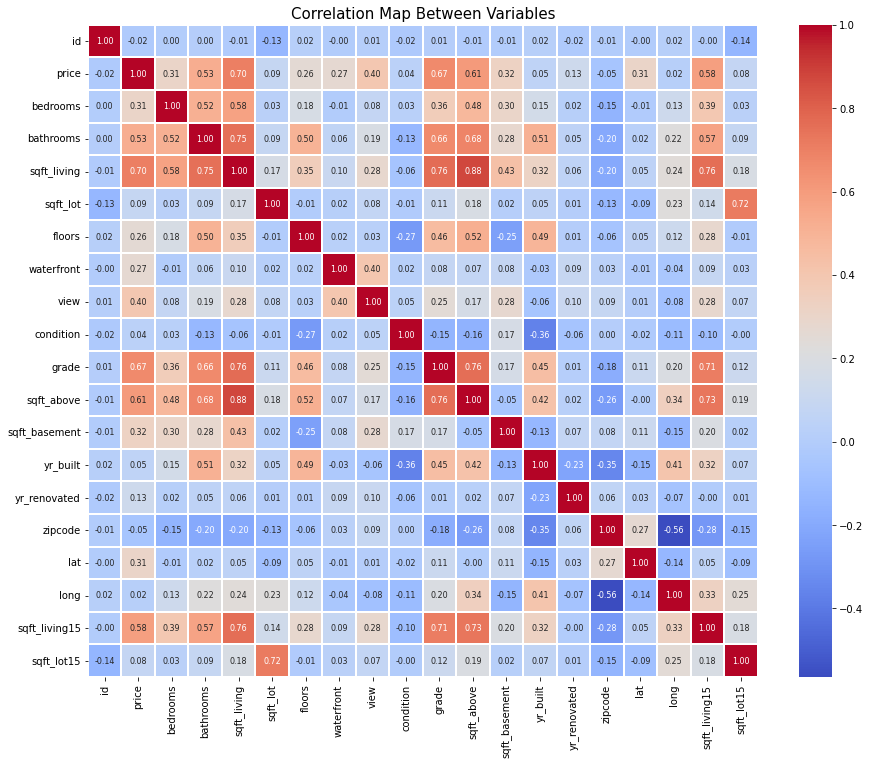

In [37]:
## To view correlations with heatmap

plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(method = 'pearson'), 
            annot = True, fmt = '.2f',
            linewidths = 0.1,
            linecolor= 'white',
             cmap='coolwarm',
            annot_kws={'size':8})
plt.title('Correlation Map Between Variables', fontsize = 15)
plt.show()

<font size="3">
    
Discussing the correlations +/- 0.5 and above
    
Sqft_lot15 exhibits a strong positive correlation with sqft_lot, indicating that as the size of the lot (sqft_lot) increases, the corresponding size of the lot for the nearest 15 neighbors (sqft_lot15) also tends to increase.

Sqft_living15 demonstrates moderate to strong positive correlations with bathrooms, sqft_living, grade, and sqft_above. This implies that as the living area (sqft_living15) increases, there is a tendency for the number of bathrooms, total living area, grade of the property, and the above-ground living area to increase as well.

Yr_built displays a moderate positive correlation with bathrooms, indicating that as the year of construction (yr_built) increases, there is a tendency for the number of bathrooms to increase as well.

Sqft_above exhibits moderate positive correlations with bathrooms, sqft_living, and floors. This suggests that as the above-ground living area (sqft_above) increases, there is a tendency for the number of bathrooms, total living area, and number of floors to increase as well.

Grade demonstrates strong positive correlations with bathrooms and sqft_living, indicating that as the grade of the property increases, there is a tendency for the number of bathrooms and total living area to increase as well.

Additionally, there are moderate correlations observed between bathrooms and bedrooms, suggesting that as the number of bathrooms increases, there is a tendency for the number of bedrooms to also increase.
    
I WILL CHECK THE HIGHLY CORRELATED PREDICTORS STATUS DURING SELECTION OF FEATURS PRIOR TO REGRESSION ANALYSIS.
    
    
</font>

<AxesSubplot:title={'center':'Pearson correlation coefficients between variables and price'}>

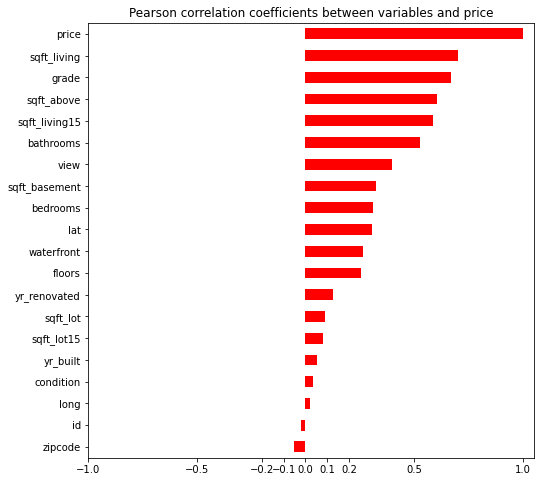

In [38]:
## Correlation of features with respect to the target price

df1 = cormat['price'] # target variable
df1_sorted = df1.sort_values() # sort the values

df1_sorted.plot(kind='barh',
                title='Pearson correlation coefficients between variables and price',
                color='red',
                figsize=(8, 8),
                xticks=(-1, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 1)) # range of x-values -1 to 1



<font size="3">
    
The resulting bar plot shows the Pearson correlation coefficients between each variable and the 'price' variable. Positive correlations are displayed on the right side of the plot, while negative correlations are shown on the left side. The length of the bars represents the strength of the correlation, with longer bars indicating a stronger correlation.
    
The analysis reveals that several variables show a significant positive correlation with the target variable, price. The variable with the highest positive correlation is sqft_living, followed by grade, sqft_above, sqft_living15, and others. This suggests that as the square footage of the living area increases, along with other factors such as the grade of the property and the above-ground living area, the price tends to rise as well.

On the other hand, the variables id, zipcode,long,condition,yr_built, sqft_lot15 and sqft_lot are not seem to have a notable impact on the target variable, price. These variables may not provide meaningful information or influence the pricing of houses in this dataset. I will leave them and will manage when selecting the right predictors process in coming sessions.
    
</font>

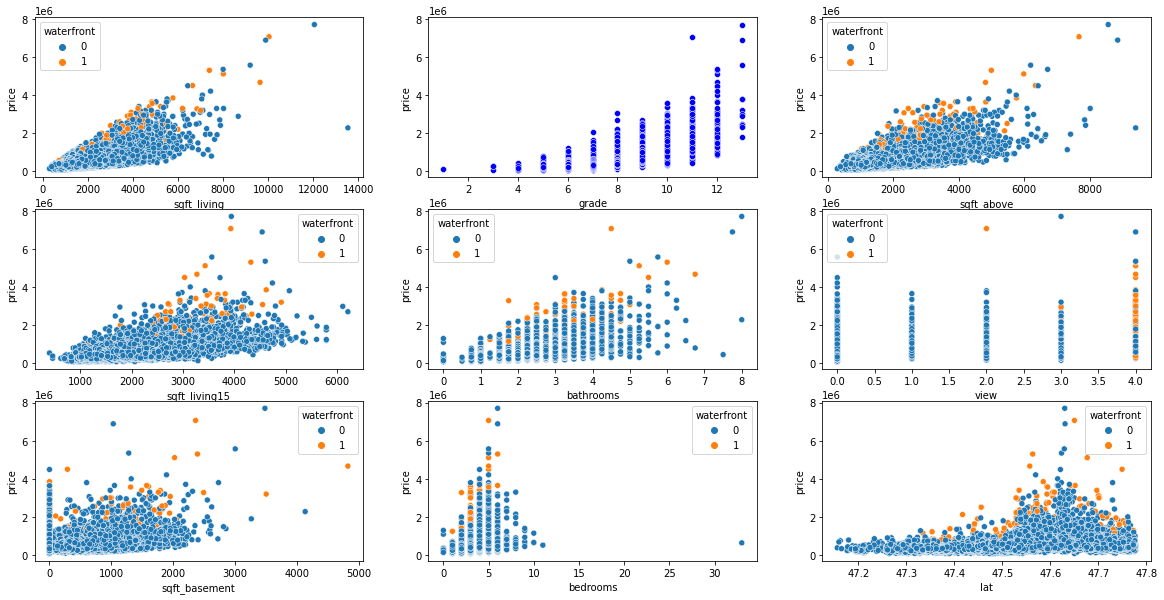

In [39]:
## A closer look at the scatter plot with price

plt.figure(figsize=(20, 10))

plt.subplot(331)
sns.scatterplot(x="sqft_living",y="price",hue='waterfront', data=data, color='green')

plt.subplot(332)
sns.scatterplot(x="grade", y="price", data=data, color='blue')

plt.subplot(333)
sns.scatterplot(x="sqft_above",y="price",hue='waterfront',  data=data, color='purple')

plt.subplot(334)
sns.scatterplot(x="sqft_living15",y="price",hue='waterfront',  data=data, color='orange')

plt.subplot(335)
sns.scatterplot(x="bathrooms", y="price",hue='waterfront', data=data, color='yellow')

plt.subplot(336)
sns.scatterplot(x="view", y="price",hue='waterfront', data=data, color='magenta')

plt.subplot(337)
sns.scatterplot(x="sqft_basement",y="price",hue='waterfront',  data=data, color='red')

plt.subplot(338)
sns.scatterplot(x="bedrooms",y="price",hue='waterfront',  data=data, color='tan')

plt.subplot(339)
sns.scatterplot(x="lat",y="price",hue='waterfront',  data=data, color='lightgreen')
plt.show()


<font size="3">
    
The scatter plot visualizations of the major predictor variables, such as sqft_living, grade, sqft_above, sqft_living15, and bathrooms, further confirm the patterns and correlations observed in the previous analysis. By examining these scatter plots, we can validate the relationships between variables and the target variable, price which is variying with waterfront location.
    
</font>

In [40]:
## Check data type of class feature waterfront
data['waterfront'].dtype
print(data['waterfront'].dtype)

## Make waterfront feature as object since it has 2 classess
#data['waterfront'] = data['waterfront'].astype('object')


#data['waterfront'].dtype

int64


In [41]:
## Check data type of class feature view
#data['view'].dtype
#print(data['view'].dtype)

## Make waterfront feature as object since it has 4 classess
#data['view'] = data['view'].astype('object')

#data['view'].dtype

In [42]:
## To mitigate multicollinearity, features that exhibit high correlation are dropped.
#data.drop(['zipcode', 'id', 'long', 'condition', 'yr_built', 'sqft_lot15', 'sqft_lot','yr_renovated', 'date'],axis=1, inplace =True)

## Drop the id and data
data.drop(['id', 'date'],axis=1, inplace =True)
data.shape

(21436, 19)


    
# DATA PREPROCESSING
    


<font size="3">
    
MANAGING OUTLIERS
    
</font>

In [43]:
## detecting outliers on upper and lower quantiles using the functions

def quantile_up(data1):
  
    Q1 = data1.quantile(0.25) #1st quantile - 25%
    Q3 = data1.quantile(0.75) #3rd quantile - 75%
    IQR = Q3 - Q1 #Interquantile range - IQR
    outlier_step = 1.5 * IQR
    upper_whisker = data1[data1<=Q3+1.5*IQR].max()
    return (upper_whisker)

def quantile_down(data2):
    
    Q1 = data2.quantile(0.25) #1st quantile - 25%
    Q3 = data2.quantile(0.75) #3rd quantile - 75%
    IQR = Q3 - Q1 #Interquantile range - IQR
    outlier_step = 1.5 * IQR
    lower_whisker = data2[data2>=Q1-1.5*IQR].min()
    return (lower_whisker)


<font size="3">
    
The upper and lower quantiles are determined by calculating the interquartile range (IQR) of each variable and adding or subtracting 1.5 times the IQR from the respective quartiles. This helps identify potential outliers in the data.
    
</font>

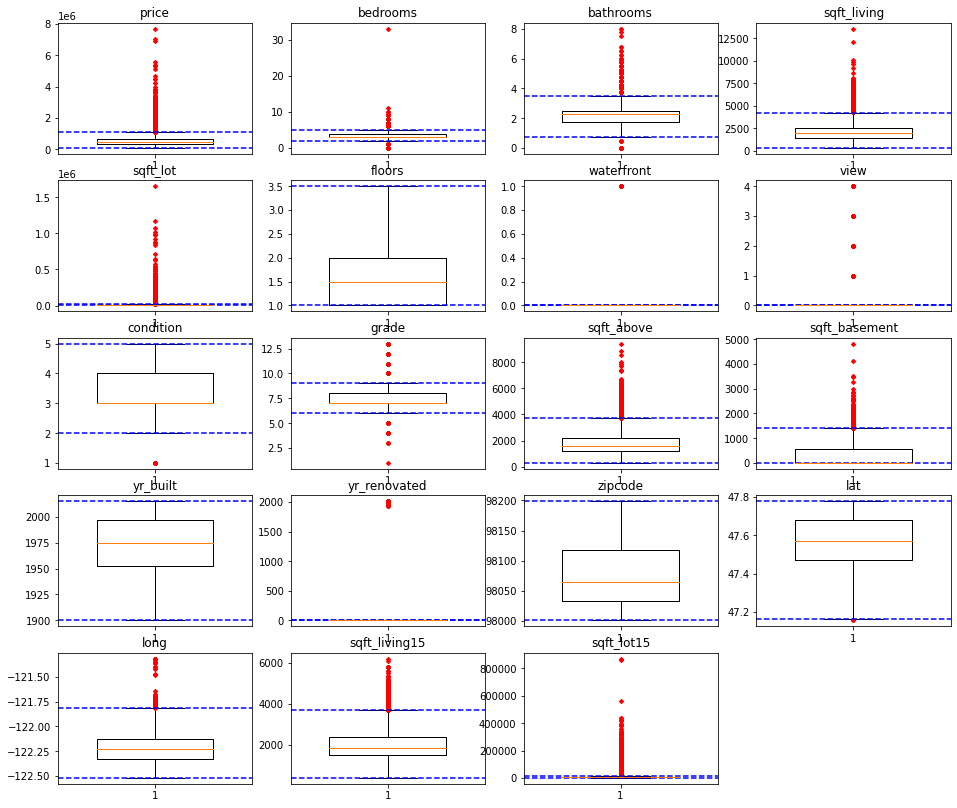

In [44]:
## Box plot to illustrate the outliers with IQR cutoff points

plt.figure(figsize=(16,14))
labels = list(set(data.columns)) # list of unique column from dataset
for x in range(19): # iterate over the range 0-18
    plt.subplot(5,4,x+1) # set plot 5 rows and 4 rows
    plt.boxplot(data.iloc[:,x], 
                whis = 1.5, 
                widths = 0.6, 
                flierprops = {'marker':'D', 
                              'markerfacecolor':'red', 
                              'markeredgecolor':'red', 
                              'markersize':3})
    
    plt.axhline(y = quantile_up(data.iloc[:,x]), color='b', linestyle='--')# draw horizontal dashed line upper border
    plt.axhline(y = quantile_down(data.iloc[:,x]), color='b', linestyle='--')# draw horizontal dashed line lower border
    plt.title(data.columns[x])
plt.show()

<font size="3">
    
The above plots highlights potential outliers by setting cutoff lines based on 1.5 times the IQR above and below the quartiles. Any data points that fall beyond these cutoff lines are considered outliers and are plotted as individual data points.
    
</font>

Remaining data: (14813, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14813 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14813 non-null  float64
 1   bedrooms       14813 non-null  int64  
 2   bathrooms      14813 non-null  float64
 3   sqft_living    14813 non-null  int64  
 4   sqft_lot       14813 non-null  int64  
 5   floors         14813 non-null  float64
 6   waterfront     14813 non-null  int64  
 7   view           14813 non-null  int64  
 8   condition      14813 non-null  int64  
 9   grade          14813 non-null  int64  
 10  sqft_above     14813 non-null  int64  
 11  sqft_basement  14813 non-null  int64  
 12  yr_built       14813 non-null  int64  
 13  yr_renovated   14813 non-null  int64  
 14  zipcode        14813 non-null  int64  
 15  lat            14813 non-null  float64
 16  long           14813 non-null  float64
 17  sqft_living15  14813 n

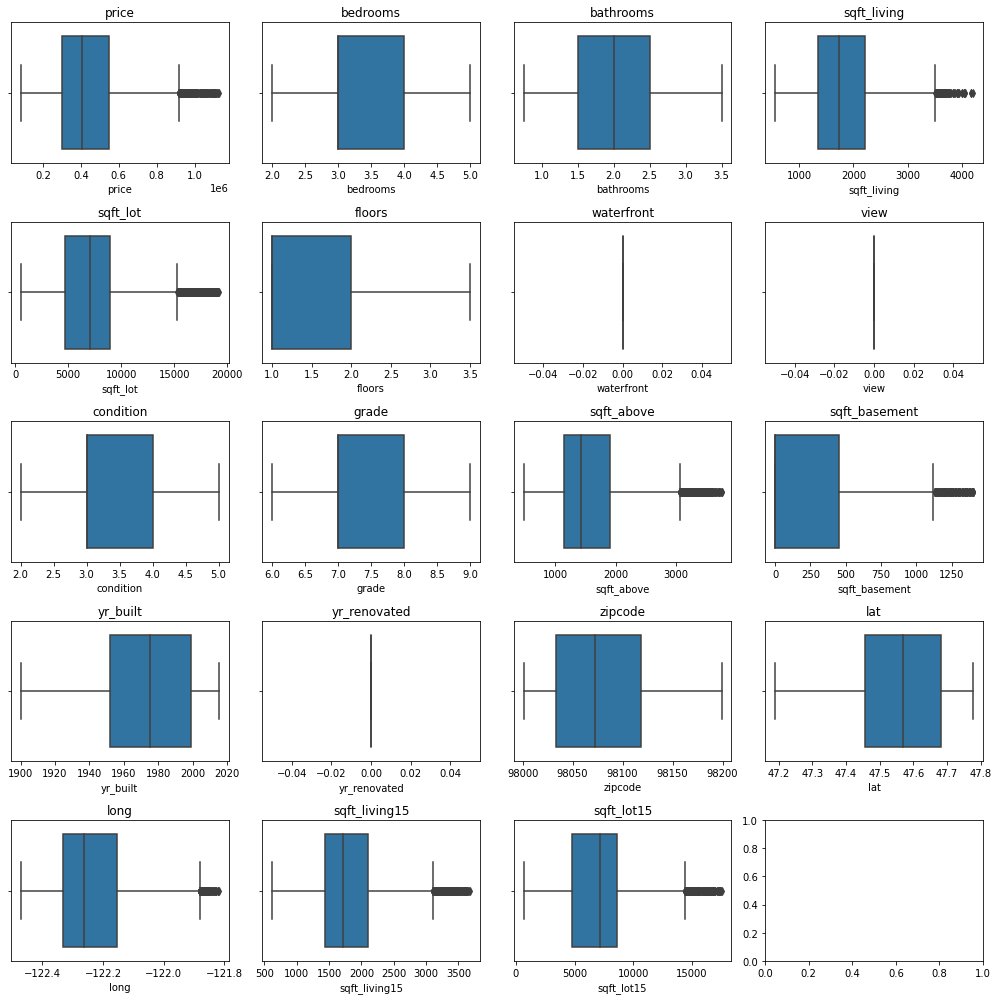

In [45]:
## Ploting the remaining data after removing the outliers

dfr = data.copy()
Q1 = dfr.quantile(0.25)#1st quantile - 25%
Q3 = dfr.quantile(0.75)#3rd quantile - 75%
IQR = Q3 - Q1 #Interquantile range - IQR
df_rem = dfr[~((dfr < (Q1 - 1.5 * IQR)) | \
               (dfr> (Q3 + 1.5 * IQR))).any(axis=1)]

print('Remaining data:',df_rem.shape)
df_rem.info()

# plot box and whisker plots after clearing outliers
fig, axes = plt.subplots(5, 4, figsize=(14, 14)) # 5 rows with 4 columns
axes = axes.flatten() # create an array to iterate 

for i, col in enumerate(df_rem.columns): # to iterate over the colums 
    sns.boxplot(x=df_rem[col], ax=axes[i])# plot boxplot 
    axes[i].set_title(col) # label

plt.tight_layout()
plt.show()


<font size="3">
    
After eliminating potential outliers, the dataset has been reduced to 13,457 rows and 17 columns. We have disregarded the three empty plots since a 5x4 matrix allows for 20 plots, but we are only utilizing 17 of them.
    
</font>

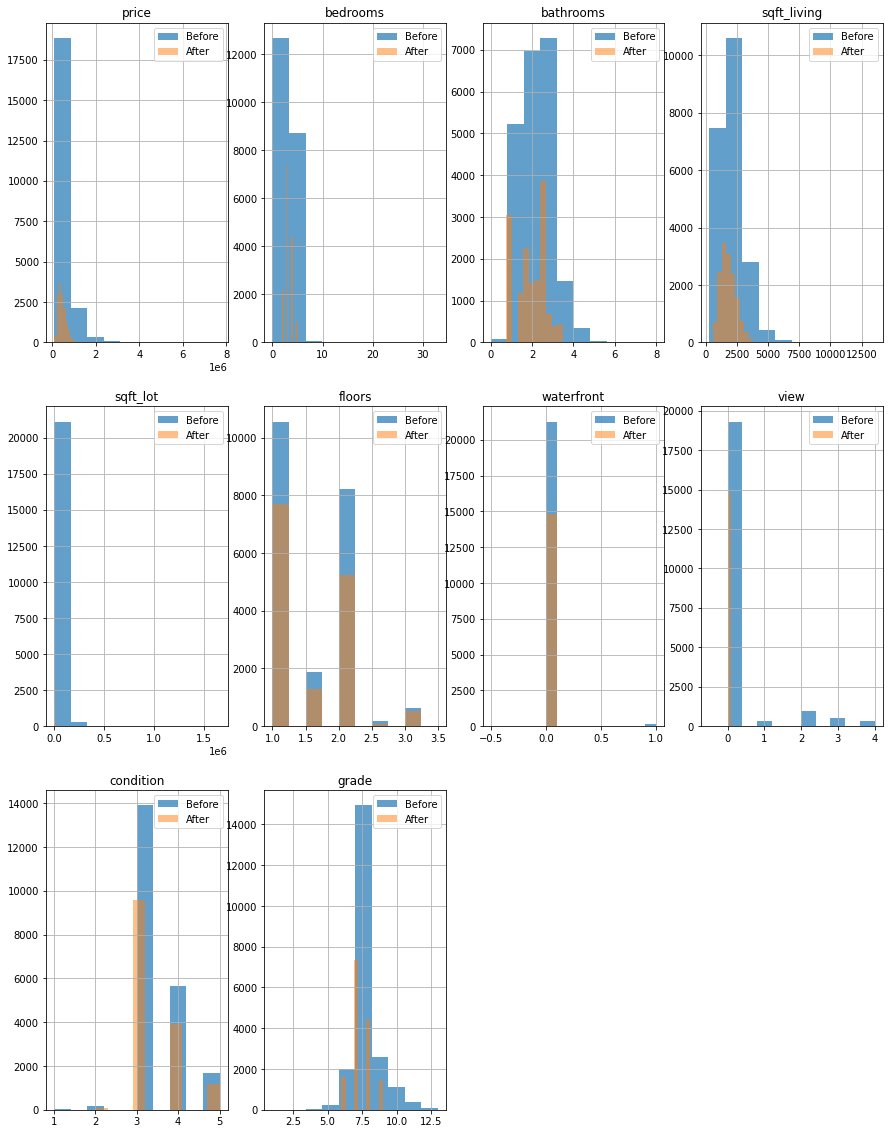

In [46]:
## Plot histogram before and after clearing outliers
plt.figure(figsize=(15,20))
for x in range(10): # iterate over range 0-18
    plt.subplot(3,4,x+1) # 3 rows and 4 columns
    data.iloc[:,x].hist(alpha = 0.7) # plot histogram of the values of x-column -before
    df_rem.iloc[:,x].hist(alpha = 0.5)# # plot histogram of the values of x-column - after
    plt.legend(['Before', 'After'])
    plt.title(df_rem.columns[x])
plt.show()


<font size="3">
    
The distributions of features before and after the removal of outliers exhibit notable changes. Following the removal of outliers, there is a decrease in the frequencies of data. Features such as sqft_living, bedrooms, bathrooms, and sqft_living15 etc. appear to be more concentrated or centered in their distributions.
    
</font>

In [47]:
## Check the remained data as data for further analysis. 
data = df_rem
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14813 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14813 non-null  float64
 1   bedrooms       14813 non-null  int64  
 2   bathrooms      14813 non-null  float64
 3   sqft_living    14813 non-null  int64  
 4   sqft_lot       14813 non-null  int64  
 5   floors         14813 non-null  float64
 6   waterfront     14813 non-null  int64  
 7   view           14813 non-null  int64  
 8   condition      14813 non-null  int64  
 9   grade          14813 non-null  int64  
 10  sqft_above     14813 non-null  int64  
 11  sqft_basement  14813 non-null  int64  
 12  yr_built       14813 non-null  int64  
 13  yr_renovated   14813 non-null  int64  
 14  zipcode        14813 non-null  int64  
 15  lat            14813 non-null  float64
 16  long           14813 non-null  float64
 17  sqft_living15  14813 non-null  int64  
 18  sqft_l

In [48]:
## Set the target variable as price

target = data['price']
target.shape


(14813,)

In [49]:
## Drop price from the data
data = data.copy() # created a copy of the data
data.drop('price', axis=1, inplace=True) # drop the price varaible
print(data.shape)

(14813, 18)


In [50]:
## Stadard Scaling of data
from sklearn.preprocessing import StandardScaler

#features = list(data.select_dtypes(exclude=['object']).columns) # select data type (numeric)
features = list(data.select_dtypes(include=['int64', 'float64', 'int32']).columns) # select data type (numeric)
data_scaler = StandardScaler() # assign scaler instance
data_scaled = pd.DataFrame(data = data) # copy and name the new dataframe
data_scaled[features] = data_scaler.fit_transform(data_scaled[features]) # sacle the features and transformed

print(np.mean(data), np.std(data))

bedrooms        -0.00
bathrooms        0.00
sqft_living      0.00
sqft_lot        -0.00
floors          -0.00
                 ... 
zipcode         -0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
Length: 18, dtype: float64 bedrooms        1.00
bathrooms       1.00
sqft_living     1.00
sqft_lot        1.00
floors          1.00
                ... 
zipcode         1.00
lat             1.00
long            1.00
sqft_living15   1.00
sqft_lot15      1.00
Length: 18, dtype: float64


<font size="3">
    
As shown above, the scaling process standardizes the data by adjusting it to have a mean of 0 and a standard deviation of 1. This standardization is beneficial for optimizing the utilization of machine learning algorithms and conducting statistical analyses more effectively.
    
</font>

In [51]:
data.head()# view scaled data head

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat  long  sqft_living15  sqft_lot15
0     -0.34      -1.51        -1.03     -0.40   -0.86        0.00  0.00      -0.65  -0.48       -0.68          -0.65     -0.58          0.00     1.84 -0.34 -0.22          -0.90       -0.41
2     -1.63      -1.51        -1.70      0.90   -0.86        0.00  0.00      -0.65  -1.72       -1.36          -0.65     -1.33          0.00    -0.97  1.26 -0.03           1.81        0.40
3      0.95       1.59         0.23     -0.59   -0.86        0.00  0.00       2.44  -0.48       -0.89           1.93     -0.23          0.00     1.05 -0.27 -1.32          -0.86       -0.62
4     -0.34       0.04        -0.22      0.33   -0.86        0.00  0.00      -0.65   0.77        0.15          -0.65      0.52          0.00    -0.11  0.41  1.49           0.00        0.21
6     -0.34       0.43        -0.16     -0.05    0.96        0.00  0.00      -0.65  -0.48        0.21          -0.65      0.79          0.00    -1.43 -1.75 -0.78           0.86       -0.01

In [52]:
## Droped features with sigle zero values
data.drop(['waterfront','view','yr_renovated'],axis = 1, inplace =True)

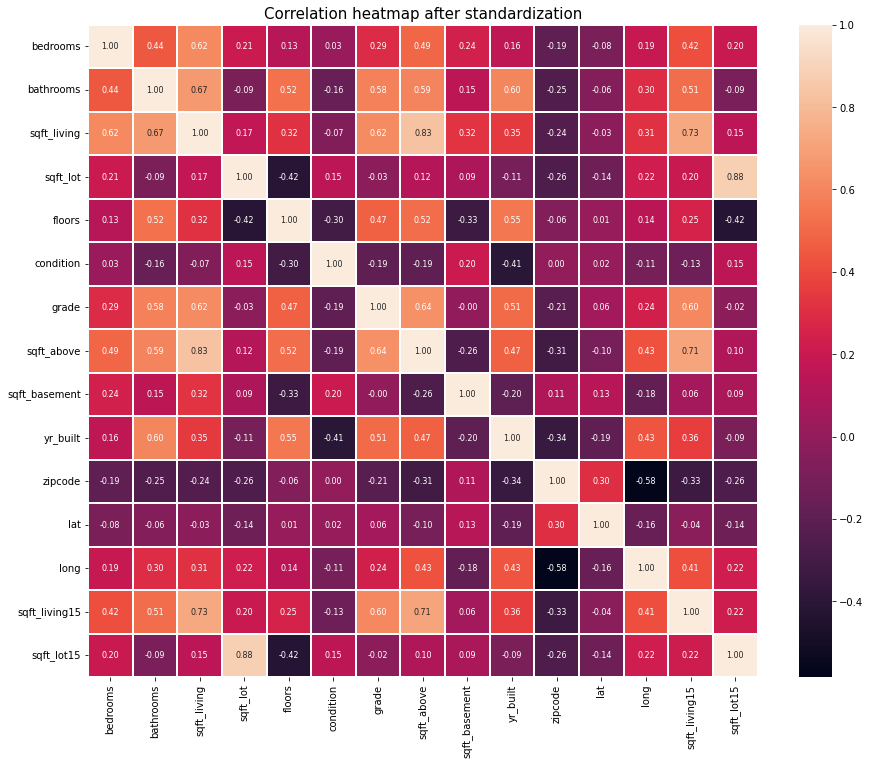

In [53]:
## Review the correlation heatmap after stadardization

plt.figure(figsize=(15, 12))
#color = plt.get_cmap('RdYlGn')   # default color
#color.set_bad('lightblue')
sns.heatmap(data.corr(method = 'pearson'), 
            annot = True, fmt = '.2f',
            linewidths = 0.1,
            linecolor= 'white',
            #vmin=0.5, 
            #vmax=0.7,
            annot_kws={'size':8})
plt.title('Correlation heatmap after standardization', fontsize = 15)
plt.show()

<font size="3">
    
The correlations among the predictors remain largely unchanged.
    
</font>

In [54]:
data.shape # check the data shape

(14813, 15)

In [55]:
# Check column name values
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

<font size="3">
    
PREPARING DATA FOR ANALYSIS WITH LEARNING ALGORITHAMS
    
Feature selection process
    
</font>

In [56]:
## Import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

## Assigning X as predictors and y as target as usual
X = data
y = target

selector = SelectKBest(score_func=f_regression, k='all') # f_regression to get feature scores
selector.fit(X, y) # fitting with selector

f_scores = selector.scores_ # get featur scores
f_names = X.columns # get featur names
f_scores_df = pd.DataFrame({'Feature': f_names, 'Score': f_scores}) # dataframe to store feature name and score
f_scores_df = f_scores_df.sort_values(by='Score', ascending=False)# sort the feature score 

df3 = f_scores_df.loc[:, ['Feature', 'Score']] # best feature and score dataframe
df3 # view 

Feature   Score
6           grade 5740.69
2     sqft_living 5359.63
11            lat 4669.37
13  sqft_living15 3736.32
7      sqft_above 2987.01
..            ...     ...
5       condition  106.25
3        sqft_lot  105.43
12           long   35.51
9        yr_built    2.23
10        zipcode    1.23

[15 rows x 2 columns]

<AxesSubplot:xlabel='Feature'>

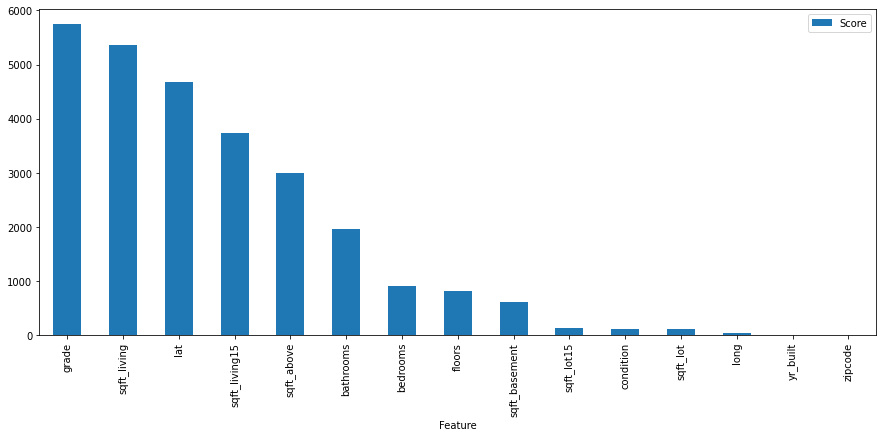

In [57]:
## Plot the best features with higher score

labels = list(set(df3['Feature']))
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
df3.plot.bar(x='Feature', y='Score', ax=ax)

#plt.show()

In [58]:
## Select the top features based on score
#from sklearn.feature_selection import SelectKBest, f_regression

#selector = SelectKBest(score_func=f_regression, k=13) # Select K Best feature selector
#X_selected = selector.fit_transform(X, y)  # Fit the selector 
#features_selected = X.columns[selector.get_support()] # selected features
#X_selected = pd.DataFrame(X_selected, columns=features_selected) # new dataframe with selected features

#X_selected # Use X_selected for further analysis and modeling

<font size="3">
    
After careful analysis, we have selected the top 13 features for further examination. However, we have decided to exclude "yr_built" and "zipcode" from consideration. These features were not deemed as influential or relevant in predicting the target variable and were therefore excluded from the analysis. By focusing on the remaining 13 features, we aim to refine our model and enhance its predictive capabilities.
    
</font>

In [59]:
#X_selected.columns # look the column name valus

In [60]:
#from sklearn.linear_model import Lasso
#from sklearn.model_selection import GridSearchCV

#lasso = Lasso()

# Define the alpha values to be searched
#param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
#param_grid = {'alpha': np.linspace(0.1, 1, 100)}

# Perform grid search with cross-validation
#grid_search = GridSearchCV(lasso, param_grid, cv=5)
#grid_search.fit(X, y)

#best_alpha = grid_search.best_params_['alpha']
#print("Best alpha:", best_alpha)

In [61]:
## feature selection 
#import libraries

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X = data
y = target

lasso = Lasso(alpha=1000)  # set the alpha value as per your requirement
lasso.fit(X, y)

my_feature = SelectFromModel(lasso, prefit=True) # lasso feature selection 
X_selected = my_feature.transform(X) # selected features based on lasso co efficients

feature_id = my_feature.get_support(indices=True) # get the selected feature names 
selected_f = X.columns[feature_id]

X_selected = X[selected_f].copy()
#X_selected

#print("Selected Features:")
#print(selected_f)


c:\users\h207171\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [62]:
# Check the inportance of each feature
import catboost as cb
cb = cb.CatBoostRegressor()
cb.fit(data,target)

importances = pd.DataFrame({'feature':data.columns,'importance':np.round(cb.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(17)

Learning rate set to 0.062682
0:	learn: 172974.0172922	total: 147ms	remaining: 2m 26s
1:	learn: 166348.7262716	total: 152ms	remaining: 1m 15s
2:	learn: 159896.0314007	total: 156ms	remaining: 51.8s
3:	learn: 153885.1582101	total: 160ms	remaining: 39.9s
4:	learn: 148382.2871493	total: 164ms	remaining: 32.7s
5:	learn: 143264.2942713	total: 168ms	remaining: 27.9s
6:	learn: 138401.3840134	total: 173ms	remaining: 24.5s
7:	learn: 134102.3954123	total: 177ms	remaining: 22s
8:	learn: 129829.5939298	total: 182ms	remaining: 20s
9:	learn: 126005.5965741	total: 186ms	remaining: 18.4s
10:	learn: 122420.0210299	total: 190ms	remaining: 17.1s
11:	learn: 119072.8715465	total: 194ms	remaining: 16s
12:	learn: 115922.8957666	total: 199ms	remaining: 15.1s
13:	learn: 112950.2373331	total: 204ms	remaining: 14.4s
14:	learn: 110020.9519665	total: 209ms	remaining: 13.7s
15:	learn: 107451.2704285	total: 213ms	remaining: 13.1s
16:	learn: 105163.4016643	total: 217ms	remaining: 12.6s
17:	learn: 102944.1274105	total:

164:	learn: 61991.6283519	total: 1.03s	remaining: 5.22s
165:	learn: 61890.5400057	total: 1.04s	remaining: 5.24s
166:	learn: 61846.2442665	total: 1.05s	remaining: 5.25s
167:	learn: 61810.0901364	total: 1.06s	remaining: 5.25s
168:	learn: 61713.0332138	total: 1.07s	remaining: 5.27s
169:	learn: 61641.0687140	total: 1.08s	remaining: 5.27s
170:	learn: 61607.1833488	total: 1.08s	remaining: 5.26s
171:	learn: 61533.3168960	total: 1.09s	remaining: 5.25s
172:	learn: 61487.5796301	total: 1.1s	remaining: 5.25s
173:	learn: 61412.9897964	total: 1.11s	remaining: 5.28s
174:	learn: 61362.8173063	total: 1.12s	remaining: 5.28s
175:	learn: 61277.9140812	total: 1.13s	remaining: 5.28s
176:	learn: 61245.0093518	total: 1.13s	remaining: 5.27s
177:	learn: 61190.7569770	total: 1.14s	remaining: 5.29s
178:	learn: 61150.6723022	total: 1.15s	remaining: 5.29s
179:	learn: 61127.6438428	total: 1.16s	remaining: 5.29s
180:	learn: 61077.6979368	total: 1.17s	remaining: 5.3s
181:	learn: 61013.7263342	total: 1.18s	remaining: 

350:	learn: 55779.0393796	total: 2.26s	remaining: 4.18s
351:	learn: 55753.6639758	total: 2.27s	remaining: 4.17s
352:	learn: 55737.9981728	total: 2.27s	remaining: 4.16s
353:	learn: 55727.3404220	total: 2.27s	remaining: 4.15s
354:	learn: 55710.8276461	total: 2.28s	remaining: 4.14s
355:	learn: 55693.3050063	total: 2.28s	remaining: 4.13s
356:	learn: 55673.0773304	total: 2.29s	remaining: 4.12s
357:	learn: 55642.1259881	total: 2.29s	remaining: 4.11s
358:	learn: 55628.5173721	total: 2.29s	remaining: 4.1s
359:	learn: 55614.7660945	total: 2.3s	remaining: 4.09s
360:	learn: 55602.9806114	total: 2.3s	remaining: 4.08s
361:	learn: 55578.9993821	total: 2.31s	remaining: 4.07s
362:	learn: 55531.7162143	total: 2.31s	remaining: 4.05s
363:	learn: 55509.4851825	total: 2.31s	remaining: 4.04s
364:	learn: 55477.4927052	total: 2.32s	remaining: 4.03s
365:	learn: 55443.6812200	total: 2.32s	remaining: 4.02s
366:	learn: 55423.3833509	total: 2.33s	remaining: 4.01s
367:	learn: 55407.0753468	total: 2.33s	remaining: 4

500:	learn: 53043.0636405	total: 2.88s	remaining: 2.87s
501:	learn: 53016.1094788	total: 2.88s	remaining: 2.86s
502:	learn: 52999.4948543	total: 2.89s	remaining: 2.85s
503:	learn: 52988.8845542	total: 2.89s	remaining: 2.85s
504:	learn: 52959.2861426	total: 2.9s	remaining: 2.84s
505:	learn: 52947.4700441	total: 2.9s	remaining: 2.83s
506:	learn: 52936.3123110	total: 2.9s	remaining: 2.83s
507:	learn: 52915.0948342	total: 2.91s	remaining: 2.82s
508:	learn: 52902.7291588	total: 2.91s	remaining: 2.81s
509:	learn: 52892.7179450	total: 2.92s	remaining: 2.8s
510:	learn: 52875.2849629	total: 2.92s	remaining: 2.8s
511:	learn: 52856.3568730	total: 2.93s	remaining: 2.79s
512:	learn: 52846.6794389	total: 2.93s	remaining: 2.78s
513:	learn: 52825.0218477	total: 2.93s	remaining: 2.77s
514:	learn: 52806.1535527	total: 2.94s	remaining: 2.77s
515:	learn: 52782.7700195	total: 2.94s	remaining: 2.76s
516:	learn: 52767.6153684	total: 2.95s	remaining: 2.75s
517:	learn: 52761.8632276	total: 2.95s	remaining: 2.7

685:	learn: 50366.7482231	total: 3.71s	remaining: 1.7s
686:	learn: 50347.1395006	total: 3.72s	remaining: 1.69s
687:	learn: 50338.2167251	total: 3.72s	remaining: 1.69s
688:	learn: 50325.1345319	total: 3.73s	remaining: 1.68s
689:	learn: 50307.3707572	total: 3.73s	remaining: 1.68s
690:	learn: 50301.6745460	total: 3.73s	remaining: 1.67s
691:	learn: 50289.1648368	total: 3.74s	remaining: 1.66s
692:	learn: 50275.0779084	total: 3.74s	remaining: 1.66s
693:	learn: 50253.1161248	total: 3.75s	remaining: 1.65s
694:	learn: 50237.6998646	total: 3.75s	remaining: 1.65s
695:	learn: 50227.5626595	total: 3.76s	remaining: 1.64s
696:	learn: 50211.6179629	total: 3.76s	remaining: 1.64s
697:	learn: 50201.5846620	total: 3.77s	remaining: 1.63s
698:	learn: 50184.4811786	total: 3.77s	remaining: 1.62s
699:	learn: 50170.4816671	total: 3.77s	remaining: 1.62s
700:	learn: 50160.2461134	total: 3.78s	remaining: 1.61s
701:	learn: 50149.4033477	total: 3.78s	remaining: 1.6s
702:	learn: 50142.3610822	total: 3.79s	remaining: 

850:	learn: 48411.4455942	total: 4.5s	remaining: 789ms
851:	learn: 48402.8632827	total: 4.51s	remaining: 783ms
852:	learn: 48393.2542262	total: 4.51s	remaining: 778ms
853:	learn: 48381.0467148	total: 4.52s	remaining: 773ms
854:	learn: 48370.5490849	total: 4.53s	remaining: 767ms
855:	learn: 48354.7847938	total: 4.53s	remaining: 762ms
856:	learn: 48338.0988818	total: 4.53s	remaining: 757ms
857:	learn: 48327.1830768	total: 4.54s	remaining: 751ms
858:	learn: 48315.2065740	total: 4.54s	remaining: 746ms
859:	learn: 48305.8290037	total: 4.55s	remaining: 741ms
860:	learn: 48296.2767262	total: 4.55s	remaining: 735ms
861:	learn: 48278.5403094	total: 4.56s	remaining: 730ms
862:	learn: 48265.4707200	total: 4.56s	remaining: 724ms
863:	learn: 48258.3486869	total: 4.57s	remaining: 719ms
864:	learn: 48234.2060727	total: 4.57s	remaining: 714ms
865:	learn: 48227.4413872	total: 4.58s	remaining: 708ms
866:	learn: 48220.1734938	total: 4.58s	remaining: 703ms
867:	learn: 48213.0173850	total: 4.59s	remaining:

importance
feature                  
lat                 51.00
sqft_living         13.36
long                 7.51
grade                6.63
zipcode              4.59
...                   ...
sqft_lot15           1.13
sqft_basement        0.95
bathrooms            0.51
bedrooms             0.39
floors               0.12

[15 rows x 1 columns]

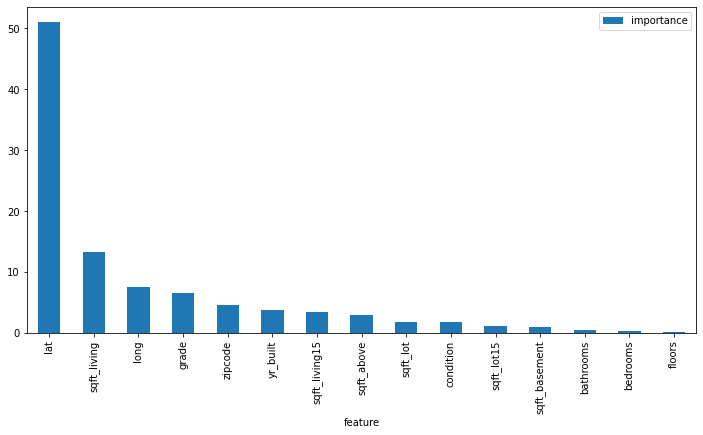

In [63]:
## Importances.plot.bar()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

importances.plot.bar(ax=ax)

plt.show()

In [64]:
data1= data[['sqft_living', 'sqft_lot','condition', 'grade', 'sqft_above',
            'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15','sqft_basement','zipcode']]

SelectBest and Lasso feature selection option will not yiled / minimize the mean square error. The catboost regressor options deemed to be minimizing the mean square error.

Therefore, I have selected the top 12 features for further examination. Also include "yr_built" and "zipcode" as it contributes the prediction of price. These features were not deemed as influential or relevant in predicting the target variable and were therefore excluded from the analysis. By focusing on the remaining 12 features, aim to refine our model and enhance its predictive capabilities.

In [65]:
# Check the inportance of each feature
import catboost as cb
cb = cb.CatBoostRegressor()
cb.fit(data1,target)

importances = pd.DataFrame({'feature':data1.columns,'importance':np.round(cb.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(17)

Learning rate set to 0.062682
0:	learn: 172834.9114267	total: 4.93ms	remaining: 4.92s
1:	learn: 165848.5439165	total: 9.31ms	remaining: 4.65s
2:	learn: 159417.1377597	total: 13.8ms	remaining: 4.58s
3:	learn: 153392.2891998	total: 18.1ms	remaining: 4.5s
4:	learn: 147878.9614403	total: 22.3ms	remaining: 4.44s
5:	learn: 142758.4624443	total: 26.6ms	remaining: 4.41s
6:	learn: 138130.8286032	total: 30.8ms	remaining: 4.37s
7:	learn: 133490.1995820	total: 35.1ms	remaining: 4.35s
8:	learn: 129042.7029766	total: 39.6ms	remaining: 4.36s
9:	learn: 125144.0573184	total: 44.2ms	remaining: 4.38s
10:	learn: 121688.2053755	total: 48.8ms	remaining: 4.38s
11:	learn: 118590.8947982	total: 53.2ms	remaining: 4.38s
12:	learn: 115431.5413485	total: 58.2ms	remaining: 4.42s
13:	learn: 112601.4894328	total: 63.1ms	remaining: 4.44s
14:	learn: 110025.6713913	total: 67.4ms	remaining: 4.43s
15:	learn: 107251.7366470	total: 71.9ms	remaining: 4.42s
16:	learn: 105038.1149479	total: 76.3ms	remaining: 4.41s
17:	learn: 1

163:	learn: 61898.4399439	total: 783ms	remaining: 3.99s
164:	learn: 61848.9657796	total: 799ms	remaining: 4.04s
165:	learn: 61785.1742625	total: 810ms	remaining: 4.07s
166:	learn: 61727.7731769	total: 822ms	remaining: 4.1s
167:	learn: 61654.7579080	total: 841ms	remaining: 4.17s
168:	learn: 61623.6668525	total: 867ms	remaining: 4.26s
169:	learn: 61560.4358265	total: 878ms	remaining: 4.29s
170:	learn: 61535.0635618	total: 891ms	remaining: 4.32s
171:	learn: 61489.2399823	total: 901ms	remaining: 4.34s
172:	learn: 61431.7234448	total: 908ms	remaining: 4.34s
173:	learn: 61400.1571953	total: 918ms	remaining: 4.36s
174:	learn: 61345.6831746	total: 928ms	remaining: 4.38s
175:	learn: 61291.6536876	total: 940ms	remaining: 4.4s
176:	learn: 61217.3274040	total: 954ms	remaining: 4.44s
177:	learn: 61162.5514247	total: 966ms	remaining: 4.46s
178:	learn: 61095.8535207	total: 976ms	remaining: 4.48s
179:	learn: 61063.5679439	total: 988ms	remaining: 4.5s
180:	learn: 61016.7116948	total: 1s	remaining: 4.53

332:	learn: 56490.1707736	total: 2.86s	remaining: 5.72s
333:	learn: 56477.3548822	total: 2.87s	remaining: 5.72s
334:	learn: 56457.2807758	total: 2.88s	remaining: 5.71s
335:	learn: 56429.5121361	total: 2.89s	remaining: 5.71s
336:	learn: 56405.3890081	total: 2.89s	remaining: 5.69s
337:	learn: 56382.8267854	total: 2.9s	remaining: 5.69s
338:	learn: 56370.4198138	total: 2.91s	remaining: 5.68s
339:	learn: 56335.3147582	total: 2.92s	remaining: 5.67s
340:	learn: 56330.3068727	total: 2.93s	remaining: 5.66s
341:	learn: 56322.7421880	total: 2.94s	remaining: 5.65s
342:	learn: 56309.3678359	total: 2.95s	remaining: 5.64s
343:	learn: 56290.1018302	total: 2.96s	remaining: 5.64s
344:	learn: 56268.5182064	total: 2.97s	remaining: 5.63s
345:	learn: 56245.2689117	total: 2.98s	remaining: 5.63s
346:	learn: 56234.6499603	total: 2.99s	remaining: 5.62s
347:	learn: 56211.8683824	total: 3s	remaining: 5.61s
348:	learn: 56192.9710161	total: 3s	remaining: 5.61s
349:	learn: 56181.3662991	total: 3.01s	remaining: 5.6s


515:	learn: 53200.9508798	total: 3.9s	remaining: 3.65s
516:	learn: 53192.6191580	total: 3.9s	remaining: 3.64s
517:	learn: 53187.3879586	total: 3.9s	remaining: 3.63s
518:	learn: 53161.2319169	total: 3.91s	remaining: 3.62s
519:	learn: 53158.4009264	total: 3.91s	remaining: 3.61s
520:	learn: 53147.3947733	total: 3.92s	remaining: 3.6s
521:	learn: 53120.2307114	total: 3.92s	remaining: 3.59s
522:	learn: 53114.2922568	total: 3.93s	remaining: 3.58s
523:	learn: 53108.2967620	total: 3.93s	remaining: 3.57s
524:	learn: 53082.7515897	total: 3.94s	remaining: 3.56s
525:	learn: 53063.3740371	total: 3.94s	remaining: 3.55s
526:	learn: 53050.4542902	total: 3.95s	remaining: 3.54s
527:	learn: 53039.2196698	total: 3.95s	remaining: 3.53s
528:	learn: 53029.7905641	total: 3.96s	remaining: 3.52s
529:	learn: 53018.2812293	total: 3.96s	remaining: 3.51s
530:	learn: 53003.7880702	total: 3.96s	remaining: 3.5s
531:	learn: 52990.9792296	total: 3.97s	remaining: 3.49s
532:	learn: 52970.1443669	total: 3.98s	remaining: 3.4

683:	learn: 50921.0643659	total: 4.69s	remaining: 2.17s
684:	learn: 50914.1869527	total: 4.69s	remaining: 2.16s
685:	learn: 50903.9691803	total: 4.7s	remaining: 2.15s
686:	learn: 50896.5291741	total: 4.7s	remaining: 2.14s
687:	learn: 50878.4758819	total: 4.71s	remaining: 2.13s
688:	learn: 50870.4997086	total: 4.71s	remaining: 2.13s
689:	learn: 50864.0829228	total: 4.71s	remaining: 2.12s
690:	learn: 50843.4625621	total: 4.72s	remaining: 2.11s
691:	learn: 50821.0323878	total: 4.72s	remaining: 2.1s
692:	learn: 50799.2275765	total: 4.73s	remaining: 2.09s
693:	learn: 50788.0857274	total: 4.73s	remaining: 2.09s
694:	learn: 50772.0961630	total: 4.74s	remaining: 2.08s
695:	learn: 50756.3868359	total: 4.74s	remaining: 2.07s
696:	learn: 50749.6516471	total: 4.75s	remaining: 2.06s
697:	learn: 50738.8001315	total: 4.75s	remaining: 2.06s
698:	learn: 50732.3248475	total: 4.76s	remaining: 2.05s
699:	learn: 50723.6277822	total: 4.76s	remaining: 2.04s
700:	learn: 50713.7025693	total: 4.76s	remaining: 2

843:	learn: 49000.7857334	total: 5.49s	remaining: 1.01s
844:	learn: 48982.4509436	total: 5.49s	remaining: 1.01s
845:	learn: 48965.2094780	total: 5.5s	remaining: 1s
846:	learn: 48954.3124018	total: 5.5s	remaining: 994ms
847:	learn: 48941.0518994	total: 5.51s	remaining: 988ms
848:	learn: 48929.7390961	total: 5.52s	remaining: 982ms
849:	learn: 48921.0932650	total: 5.52s	remaining: 975ms
850:	learn: 48913.0624564	total: 5.53s	remaining: 968ms
851:	learn: 48903.0768788	total: 5.53s	remaining: 961ms
852:	learn: 48889.9528363	total: 5.54s	remaining: 954ms
853:	learn: 48877.9405000	total: 5.54s	remaining: 948ms
854:	learn: 48859.2908590	total: 5.55s	remaining: 941ms
855:	learn: 48853.7652340	total: 5.55s	remaining: 934ms
856:	learn: 48836.8551900	total: 5.56s	remaining: 928ms
857:	learn: 48824.4987187	total: 5.57s	remaining: 921ms
858:	learn: 48812.7383785	total: 5.57s	remaining: 914ms
859:	learn: 48806.1032542	total: 5.58s	remaining: 908ms
860:	learn: 48797.2237263	total: 5.58s	remaining: 901

importance
feature                  
lat                 52.12
sqft_living         12.61
long                 7.29
grade                6.93
zipcode              4.81
...                   ...
sqft_above           2.70
condition            1.91
sqft_lot             1.72
sqft_lot15           1.55
sqft_basement        0.77

[12 rows x 1 columns]

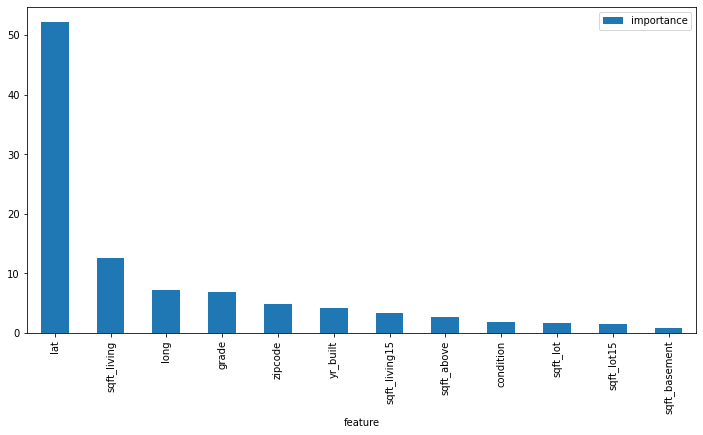

In [66]:
## Importances.plot.bar()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

importances.plot.bar(ax=ax)

plt.show()

In [67]:
## Preparing data for traing and testing by spliting

X = data1.values # get predictor variable values
y = target.values # get target variable values

## spliting dataset to 80/20 proportion for training and testing
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) 

In [68]:
## check the shape of the split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11850, 12)
(11850,)
(2963, 12)
(2963,)



    
# BUILDING REGRESSION MODELS


In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

lr_models =[]

lr_models.append(('Linear Regression',LinearRegression()))
lr_models.append(('Ridge',Ridge(alpha=0.1)))
lr_models.append(('Lasso',Lasso(alpha=0.8,max_iter=1000)))

## Evaluate each model in turn
results = []
names = []

for name, model in lr_models:
    fit = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #print(name, "Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
    #print(name, "Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))
    
    r_squared_train = model.score(X_train, y_train) # compute R-sdquared value for train
    r_squared_test = model.score(X_test, y_test) # compute R-sdquared value for test
    rmse = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square

    # Print the metrics
    print(name,"Train_R^2: {:.2f}%".format(r_squared_train * 100))
    print(name,"Test_R^2: {:.2f}%".format(r_squared_test * 100))
    print(name,"RMSE: {:.2f}".format(rmse))

## Cross validation
    kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
    cv_scores = cross_val_score(model,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

    # Print scores
    print(name,"Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
    print(name,"Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
    #print('slope:', np.round(model.coef_,2))
    #print('intercept:',np.round(model.intercept_,2))
    print()




Linear Regression Train_R^2: 65.23%
Linear Regression Test_R^2: 65.43%
Linear Regression RMSE: 106612.06
Linear Regression Mean cv Score: 65.02%
Linear Regression Standard Deviation of CV Scores: 0.011

Ridge Train_R^2: 65.23%
Ridge Test_R^2: 65.43%
Ridge RMSE: 106612.32
Ridge Mean cv Score: 65.03%
Ridge Standard Deviation of CV Scores: 0.011

Lasso Train_R^2: 65.23%
Lasso Test_R^2: 65.43%
Lasso RMSE: 106612.27
Lasso Mean cv Score: 65.03%
Lasso Standard Deviation of CV Scores: 0.011



<font size="3">

The linear, ridge, and lasso regression models did not meet the performance expectations in this analysis. Therefore, explore other regression algorithms for further analysis and improved results. By trying alternative regression models, we can potentially find a better fit for the data and enhance the predictive accuracy of the model.
    
</font>


<font size="3">

FIT WITH KNN MODEL
    
</font>

In [70]:
## 2 - Model KNN
model2 = KNeighborsRegressor(weights='uniform')
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

print("KNN_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("KNN_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_knn = model2.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_knn = model2.score(X_test, y_test) # compute R-sdquared value for test
rmse_knn = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_knn * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_knn * 100))
print("RMSE: {:.2f}".format(rmse_knn))

## Cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
cv_scores = cross_val_score(model2,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
print()

KNN_Predictions: 416950, Actual Values: 431000
KNN_Predictions: 326202, Actual Values: 240000
Train_R^2: 86.14%
Test_R^2: 78.71%
RMSE: 83653.87
Mean cv Score: 78.11%
Standard Deviation of CV Scores: 0.014



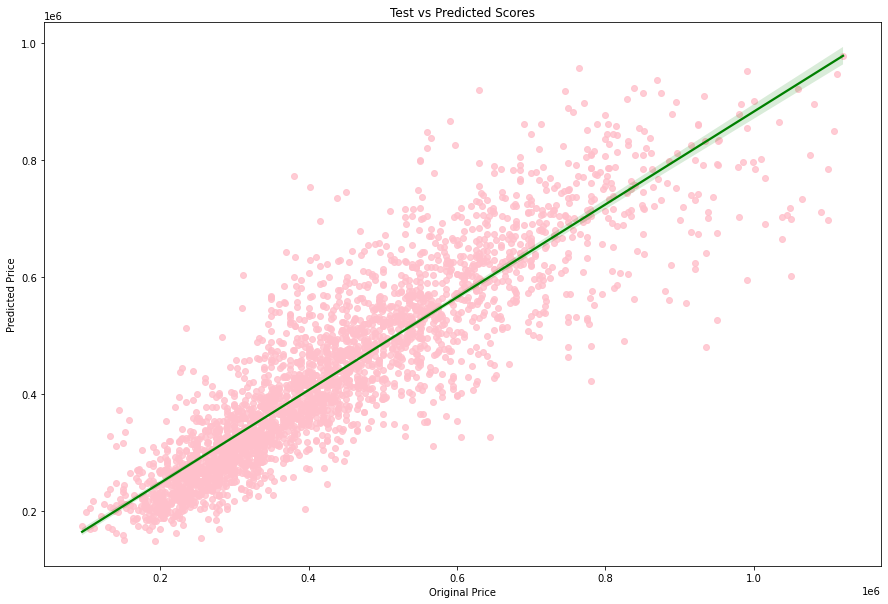

In [71]:
## plot the test, predicted score KNN
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'pink'}, line_kws={'color': 'green'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()


<font size="3">

FIT WITH DECISION TREE
    
</font>


In [72]:
## 3 - Model Decision tree
model3 = DecisionTreeRegressor()
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)

print("TREE_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("TREE_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_tree = model3.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_tree = model3.score(X_test, y_test) # compute R-sdquared value for test
rmse_tree = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_tree * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_tree * 100))
print("RMSE: {:.2f}".format(rmse_tree))

## Cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
cv_scores = cross_val_score(model3,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
print()

TREE_Predictions: 331000, Actual Values: 431000
TREE_Predictions: 265000, Actual Values: 240000
Train_R^2: 100.00%
Test_R^2: 76.07%
RMSE: 88687.56
Mean cv Score: 73.72%
Standard Deviation of CV Scores: 0.015



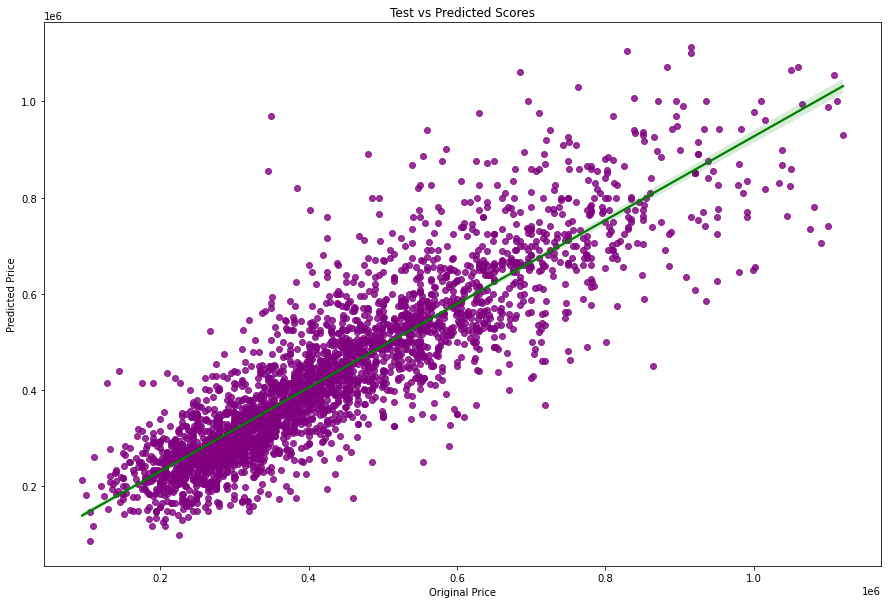

In [73]:
## plot the test, predicted score TREE
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'purple'}, line_kws={'color': 'green'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()


<font size="3">

FIT WITH RANDOM FOREST
    
</font>

In [74]:
## 4 - Model Random Forest
model4 = RandomForestRegressor()
model4.fit(X_train,y_train)

y_pred = model4.predict(X_test)

print("RF_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("RF_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_rf = model4.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_rf = model4.score(X_test, y_test) # compute R-sdquared value for test
rmse_rf = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_rf * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_rf * 100))
print("RMSE(RF): {:.2f}".format(rmse_rf))
print('MAE (RF): {:.2f}'.format(mae_rf))
print('MSE (RF): {:.2f}'.format(mse_rf))


## Cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
cv_scores = cross_val_score(model4,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
print()

RF_Predictions: 323589, Actual Values: 431000
RF_Predictions: 322388, Actual Values: 240000
Train_R^2: 98.19%
Test_R^2: 87.96%
RMSE(RF): 62901.19
MAE (RF): 44275.77
MSE (RF): 3956559852.99
Mean cv Score: 86.65%
Standard Deviation of CV Scores: 0.008



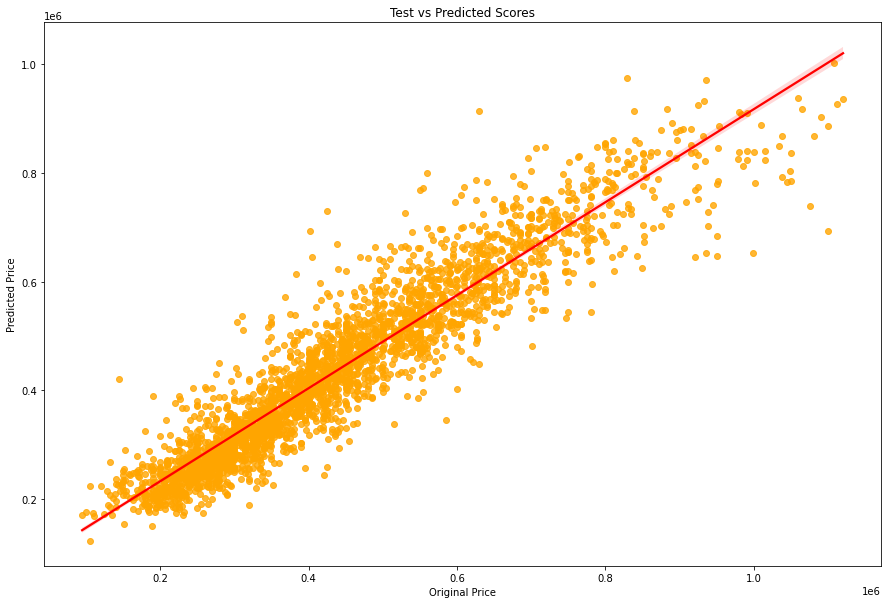

In [75]:
## plot the test, predicted score RF
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'orange'}, line_kws={'color': 'red'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()


<font size="3">
    
FIT WITH XGB REGRESSOR
    
</font>

In [76]:
from xgboost import XGBRegressor

## 5 - Model XGB
#model5 = XGBRegressor()

model5 = XGBRegressor(subsample= 0.9,
                      n_estimators=1500,
                      max_depth = 5,
                      learning_rate = 0.1,
                      colsample_bytree = 0.6
                     )
model5.fit(X_train,y_train)

y_pred = model5.predict(X_test)

print("XGB_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("XGB_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_xgb = model5.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_xgb = model5.score(X_test, y_test) # compute R-sdquared value for test
rmse_xgb = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_xgb * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_xgb * 100))
print("RMSE (XGB): {:.2f}".format(rmse_xgb))
print('MAE (XGB): {:.2f}'.format(mae_xgb))
print('MSE (XGB): {:.2f}'.format(mse_xgb))

## Cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
cv_scores = cross_val_score(model5,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
print()

XGB_Predictions: 340396, Actual Values: 431000
XGB_Predictions: 283436, Actual Values: 240000
Train_R^2: 98.74%
Test_R^2: 89.15%
RMSE (XGB): 59727.61
MAE (XGB): 42336.54
MSE (XGB): 3567387169.54
Mean cv Score: 87.81%
Standard Deviation of CV Scores: 0.011



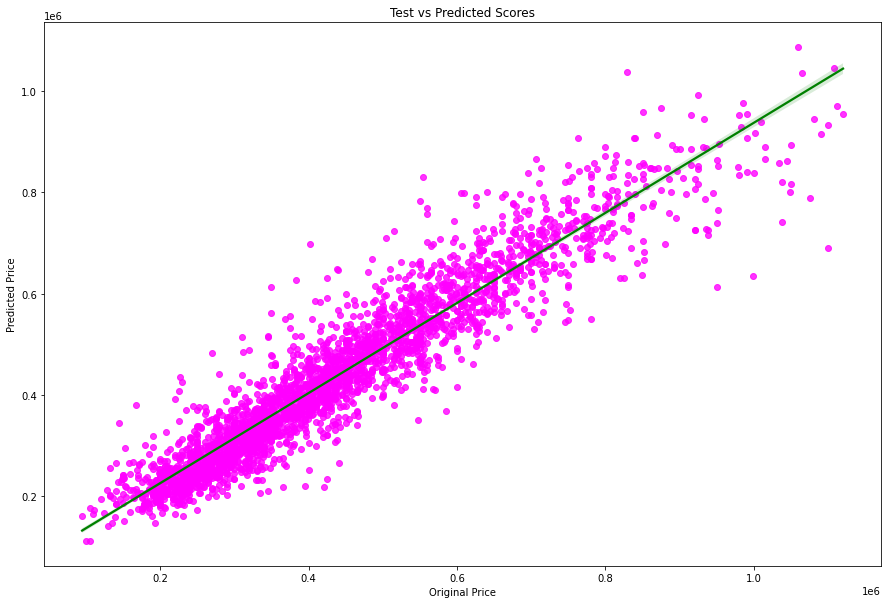

In [77]:
## plot the test, predicted score XGB
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'magenta'}, line_kws={'color': 'green'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()

<font size="3">
    
FIT WITH GRADIENT BOOSTING REGRESSOR
    
</font>

In [78]:

## 6 - Model GBR
#model6 = GradientBoostingRegressor()

model6 = GradientBoostingRegressor(subsample=0.8,
                                   n_estimators=1500,
                                   max_depth=7,
                                   learning_rate=0.01,
                                   #colsample_bytree=0.6
                                  )
model6.fit(X_train,y_train)

y_pred = model6.predict(X_test)

print("GBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("GBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_gbr = model6.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_gbr = model6.score(X_test, y_test) # compute R-sdquared value for test
rmse_gbr = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_gbr = mean_absolute_error(y_test, y_pred)
mse_gbr = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_gbr * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_gbr * 100))
print("RMSE (GBR): {:.2f}".format(rmse_gbr))
print('MAE (GBR): {:.2f}'.format(mae_gbr))
print('MSE (GBR): {:.2f}'.format(mse_gbr))

## Cross validation
#kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
#cv_scores = cross_val_score(model6,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
#print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
#print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
#print()


GBR_Predictions: 368807, Actual Values: 431000
GBR_Predictions: 282150, Actual Values: 240000
Train_R^2: 96.41%
Test_R^2: 89.38%
RMSE (GBR): 59090.50
MAE (GBR): 41786.17
MSE (GBR): 3491686944.00


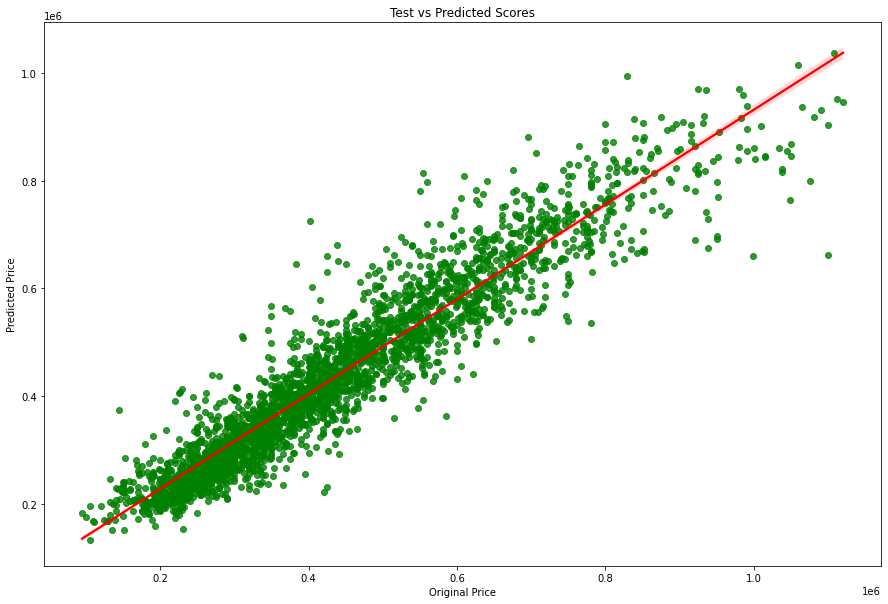

In [79]:
## plot the test, predicted score GBR
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()

<font size="3">
    
FIT WITH CATBOOST REGRESSOR
    
</font>

In [80]:
## Moedl 7 CBR
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

model7 = cb.CatBoostRegressor()
model7.fit(X_train,y_train,verbose=False)

y_pred = model7.predict(X_test)

print("CBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("CBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_cbr = model7.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_cbr = model7.score(X_test, y_test) # compute R-sdquared value for test
rmse_cb = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_cb = mean_absolute_error(y_test, y_pred)
mse_cb = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_cbr * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_cbr * 100))
print("RMSE (CBR): {:.2f}".format(rmse_cb))
print('MAE (CBR): {:.2f}'.format(mae_cb))
print('MSE (CBR): {:.2f}'.format(mse_cb))


CBR_Predictions: 387948, Actual Values: 431000
CBR_Predictions: 288067, Actual Values: 240000
Train_R^2: 93.38%
Test_R^2: 89.69%
RMSE (CBR): 58215.37
MAE (CBR): 41334.25
MSE (CBR): 3389028823.09


<font size="3">
    
CATBOOST REGRESSOR VALIDATION
    
</font>

In [81]:
## Cross validation
#model7.fit(X_train,y_train,verbose=False)
#kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
#cv_scores = cross_val_score(model7, cv=kf) # Compute 6-fold cross-validation scores

model7.fit(X_train, y_train, verbose=False)
kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6-fold cross validation
cv_scores = cross_val_score(model7, X_train, y_train, cv=kf, verbose = 0) # Compute 6-fold cross-validation scores


# Print scores
print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
#print()

Learning rate set to 0.058792
0:	learn: 171691.4912841	total: 5.38ms	remaining: 5.38s
1:	learn: 165533.0681533	total: 10.7ms	remaining: 5.33s
2:	learn: 159545.2183094	total: 16.1ms	remaining: 5.34s
3:	learn: 153940.6473633	total: 21.3ms	remaining: 5.3s
4:	learn: 148905.4019464	total: 26.3ms	remaining: 5.24s
5:	learn: 143997.9799833	total: 31.4ms	remaining: 5.21s
6:	learn: 139399.4237476	total: 36.3ms	remaining: 5.15s
7:	learn: 135210.1737404	total: 41.5ms	remaining: 5.15s
8:	learn: 130961.6402478	total: 46.6ms	remaining: 5.13s
9:	learn: 127240.5113186	total: 51.4ms	remaining: 5.09s
10:	learn: 123857.4328952	total: 57.4ms	remaining: 5.16s
11:	learn: 120887.0473997	total: 63ms	remaining: 5.19s
12:	learn: 117807.6893761	total: 68.6ms	remaining: 5.21s
13:	learn: 114697.0997491	total: 74.3ms	remaining: 5.23s
14:	learn: 112225.1788355	total: 79.1ms	remaining: 5.19s
15:	learn: 109703.8617127	total: 84.5ms	remaining: 5.19s
16:	learn: 107390.1694513	total: 89.9ms	remaining: 5.2s
17:	learn: 1052

172:	learn: 61960.4031662	total: 1.02s	remaining: 4.87s
173:	learn: 61907.2029878	total: 1.02s	remaining: 4.86s
174:	learn: 61876.4196902	total: 1.03s	remaining: 4.84s
175:	learn: 61808.1664872	total: 1.03s	remaining: 4.83s
176:	learn: 61768.3176073	total: 1.04s	remaining: 4.82s
177:	learn: 61734.3724340	total: 1.04s	remaining: 4.81s
178:	learn: 61697.0195650	total: 1.05s	remaining: 4.8s
179:	learn: 61665.8308031	total: 1.05s	remaining: 4.79s
180:	learn: 61630.9346181	total: 1.05s	remaining: 4.78s
181:	learn: 61586.4650851	total: 1.06s	remaining: 4.76s
182:	learn: 61509.8307411	total: 1.06s	remaining: 4.75s
183:	learn: 61452.8043171	total: 1.07s	remaining: 4.74s
184:	learn: 61389.1234018	total: 1.07s	remaining: 4.73s
185:	learn: 61293.1628289	total: 1.08s	remaining: 4.73s
186:	learn: 61233.5018942	total: 1.08s	remaining: 4.72s
187:	learn: 61170.4052512	total: 1.09s	remaining: 4.71s
188:	learn: 61126.3318813	total: 1.09s	remaining: 4.7s
189:	learn: 61083.3105536	total: 1.1s	remaining: 4

332:	learn: 55836.6781488	total: 1.8s	remaining: 3.6s
333:	learn: 55819.1496102	total: 1.8s	remaining: 3.6s
334:	learn: 55795.1974602	total: 1.81s	remaining: 3.6s
335:	learn: 55767.0320469	total: 1.82s	remaining: 3.6s
336:	learn: 55749.0802765	total: 1.83s	remaining: 3.6s
337:	learn: 55731.7534978	total: 1.84s	remaining: 3.6s
338:	learn: 55715.1358954	total: 1.85s	remaining: 3.6s
339:	learn: 55680.8746675	total: 1.86s	remaining: 3.61s
340:	learn: 55646.1388483	total: 1.87s	remaining: 3.62s
341:	learn: 55610.2483895	total: 1.88s	remaining: 3.63s
342:	learn: 55586.7480565	total: 1.9s	remaining: 3.63s
343:	learn: 55573.3041078	total: 1.9s	remaining: 3.63s
344:	learn: 55542.2352103	total: 1.91s	remaining: 3.63s
345:	learn: 55520.0327294	total: 1.92s	remaining: 3.63s
346:	learn: 55498.9984108	total: 1.93s	remaining: 3.63s
347:	learn: 55467.9610907	total: 1.95s	remaining: 3.65s
348:	learn: 55454.6755153	total: 1.96s	remaining: 3.66s
349:	learn: 55430.0466059	total: 1.98s	remaining: 3.67s
350

507:	learn: 52188.2036971	total: 3.28s	remaining: 3.17s
508:	learn: 52168.6912058	total: 3.28s	remaining: 3.17s
509:	learn: 52142.2990784	total: 3.29s	remaining: 3.16s
510:	learn: 52126.7569435	total: 3.29s	remaining: 3.15s
511:	learn: 52106.7440002	total: 3.3s	remaining: 3.14s
512:	learn: 52093.2974010	total: 3.3s	remaining: 3.14s
513:	learn: 52074.5446907	total: 3.31s	remaining: 3.13s
514:	learn: 52055.6664945	total: 3.31s	remaining: 3.12s
515:	learn: 52040.0037475	total: 3.32s	remaining: 3.11s
516:	learn: 52014.5380630	total: 3.33s	remaining: 3.11s
517:	learn: 51991.9196528	total: 3.33s	remaining: 3.1s
518:	learn: 51976.2269002	total: 3.34s	remaining: 3.1s
519:	learn: 51949.4698793	total: 3.35s	remaining: 3.09s
520:	learn: 51934.9399214	total: 3.35s	remaining: 3.08s
521:	learn: 51916.9891118	total: 3.36s	remaining: 3.08s
522:	learn: 51899.6520651	total: 3.37s	remaining: 3.07s
523:	learn: 51889.1139866	total: 3.37s	remaining: 3.06s
524:	learn: 51879.1052297	total: 3.38s	remaining: 3.

669:	learn: 49522.8338499	total: 4.26s	remaining: 2.1s
670:	learn: 49504.1316255	total: 4.27s	remaining: 2.09s
671:	learn: 49490.3814210	total: 4.27s	remaining: 2.08s
672:	learn: 49483.6013595	total: 4.28s	remaining: 2.08s
673:	learn: 49476.4220829	total: 4.29s	remaining: 2.07s
674:	learn: 49458.5428688	total: 4.29s	remaining: 2.07s
675:	learn: 49450.6446355	total: 4.3s	remaining: 2.06s
676:	learn: 49424.5618868	total: 4.3s	remaining: 2.05s
677:	learn: 49410.1448320	total: 4.31s	remaining: 2.05s
678:	learn: 49392.2396255	total: 4.32s	remaining: 2.04s
679:	learn: 49384.2130239	total: 4.32s	remaining: 2.03s
680:	learn: 49366.8435544	total: 4.33s	remaining: 2.03s
681:	learn: 49352.0452878	total: 4.34s	remaining: 2.02s
682:	learn: 49336.4337546	total: 4.34s	remaining: 2.02s
683:	learn: 49326.8315167	total: 4.35s	remaining: 2.01s
684:	learn: 49315.5271228	total: 4.36s	remaining: 2s
685:	learn: 49295.3492743	total: 4.36s	remaining: 2s
686:	learn: 49279.3748989	total: 4.37s	remaining: 1.99s
6

824:	learn: 47443.9131844	total: 5.26s	remaining: 1.12s
825:	learn: 47430.0070275	total: 5.27s	remaining: 1.11s
826:	learn: 47414.3067042	total: 5.28s	remaining: 1.1s
827:	learn: 47400.7306879	total: 5.28s	remaining: 1.1s
828:	learn: 47388.3896538	total: 5.29s	remaining: 1.09s
829:	learn: 47378.8814159	total: 5.3s	remaining: 1.08s
830:	learn: 47363.4046687	total: 5.3s	remaining: 1.08s
831:	learn: 47348.0193959	total: 5.31s	remaining: 1.07s
832:	learn: 47331.1053998	total: 5.32s	remaining: 1.06s
833:	learn: 47321.6285131	total: 5.32s	remaining: 1.06s
834:	learn: 47310.6734793	total: 5.33s	remaining: 1.05s
835:	learn: 47299.6584742	total: 5.33s	remaining: 1.05s
836:	learn: 47275.3196077	total: 5.34s	remaining: 1.04s
837:	learn: 47264.4935206	total: 5.35s	remaining: 1.03s
838:	learn: 47248.2010963	total: 5.35s	remaining: 1.03s
839:	learn: 47234.5518727	total: 5.36s	remaining: 1.02s
840:	learn: 47223.5043400	total: 5.36s	remaining: 1.01s
841:	learn: 47213.1344480	total: 5.37s	remaining: 1.

978:	learn: 45627.2862093	total: 6.26s	remaining: 134ms
979:	learn: 45613.5207936	total: 6.27s	remaining: 128ms
980:	learn: 45605.8071001	total: 6.28s	remaining: 122ms
981:	learn: 45594.8341195	total: 6.29s	remaining: 115ms
982:	learn: 45581.6355087	total: 6.29s	remaining: 109ms
983:	learn: 45570.5917735	total: 6.3s	remaining: 102ms
984:	learn: 45558.0469291	total: 6.3s	remaining: 96ms
985:	learn: 45548.5732843	total: 6.31s	remaining: 89.6ms
986:	learn: 45533.6902137	total: 6.32s	remaining: 83.2ms
987:	learn: 45523.6250241	total: 6.32s	remaining: 76.8ms
988:	learn: 45512.3611975	total: 6.33s	remaining: 70.4ms
989:	learn: 45498.3708575	total: 6.34s	remaining: 64ms
990:	learn: 45483.2086901	total: 6.34s	remaining: 57.6ms
991:	learn: 45476.3711003	total: 6.35s	remaining: 51.2ms
992:	learn: 45468.4038884	total: 6.36s	remaining: 44.8ms
993:	learn: 45453.8493520	total: 6.36s	remaining: 38.4ms
994:	learn: 45444.2091051	total: 6.37s	remaining: 32ms
995:	learn: 45428.7271856	total: 6.38s	remain

151:	learn: 63497.2498969	total: 981ms	remaining: 5.47s
152:	learn: 63393.4068491	total: 987ms	remaining: 5.46s
153:	learn: 63358.3434964	total: 995ms	remaining: 5.46s
154:	learn: 63289.2379305	total: 1s	remaining: 5.45s
155:	learn: 63262.0934915	total: 1.01s	remaining: 5.45s
156:	learn: 63217.4567205	total: 1.01s	remaining: 5.45s
157:	learn: 63105.8701710	total: 1.02s	remaining: 5.45s
158:	learn: 63010.9180815	total: 1.03s	remaining: 5.44s
159:	learn: 62975.8961841	total: 1.03s	remaining: 5.43s
160:	learn: 62903.8933814	total: 1.04s	remaining: 5.43s
161:	learn: 62838.7318086	total: 1.05s	remaining: 5.45s
162:	learn: 62760.0109730	total: 1.06s	remaining: 5.45s
163:	learn: 62705.7057954	total: 1.07s	remaining: 5.45s
164:	learn: 62610.7808894	total: 1.07s	remaining: 5.44s
165:	learn: 62573.9315648	total: 1.08s	remaining: 5.45s
166:	learn: 62535.2657961	total: 1.09s	remaining: 5.44s
167:	learn: 62510.2811168	total: 1.1s	remaining: 5.46s
168:	learn: 62471.6592256	total: 1.11s	remaining: 5.

334:	learn: 56309.6953877	total: 2.2s	remaining: 4.37s
335:	learn: 56290.1723524	total: 2.21s	remaining: 4.36s
336:	learn: 56265.1283250	total: 2.21s	remaining: 4.35s
337:	learn: 56240.0569216	total: 2.22s	remaining: 4.34s
338:	learn: 56220.8856763	total: 2.22s	remaining: 4.33s
339:	learn: 56200.6176455	total: 2.23s	remaining: 4.32s
340:	learn: 56173.4994409	total: 2.23s	remaining: 4.31s
341:	learn: 56153.0750859	total: 2.24s	remaining: 4.3s
342:	learn: 56128.5836462	total: 2.24s	remaining: 4.3s
343:	learn: 56086.1396511	total: 2.25s	remaining: 4.29s
344:	learn: 56074.9308898	total: 2.25s	remaining: 4.28s
345:	learn: 56043.0413922	total: 2.26s	remaining: 4.27s
346:	learn: 56019.6327638	total: 2.26s	remaining: 4.26s
347:	learn: 55990.2722643	total: 2.27s	remaining: 4.25s
348:	learn: 55976.9707539	total: 2.27s	remaining: 4.24s
349:	learn: 55933.8908619	total: 2.28s	remaining: 4.23s
350:	learn: 55921.3828190	total: 2.28s	remaining: 4.22s
351:	learn: 55889.2946349	total: 2.29s	remaining: 4

491:	learn: 52819.7581473	total: 3.01s	remaining: 3.1s
492:	learn: 52802.4525140	total: 3.01s	remaining: 3.1s
493:	learn: 52766.1556598	total: 3.02s	remaining: 3.09s
494:	learn: 52760.6043561	total: 3.02s	remaining: 3.08s
495:	learn: 52737.0225562	total: 3.03s	remaining: 3.08s
496:	learn: 52715.4646607	total: 3.03s	remaining: 3.07s
497:	learn: 52699.4771251	total: 3.04s	remaining: 3.06s
498:	learn: 52678.0088045	total: 3.04s	remaining: 3.06s
499:	learn: 52655.5823862	total: 3.05s	remaining: 3.05s
500:	learn: 52640.1324954	total: 3.05s	remaining: 3.04s
501:	learn: 52618.5066380	total: 3.06s	remaining: 3.03s
502:	learn: 52583.8715617	total: 3.06s	remaining: 3.03s
503:	learn: 52566.4480231	total: 3.07s	remaining: 3.02s
504:	learn: 52547.8949545	total: 3.07s	remaining: 3.01s
505:	learn: 52535.7219485	total: 3.08s	remaining: 3s
506:	learn: 52519.7924715	total: 3.08s	remaining: 3s
507:	learn: 52503.5528248	total: 3.09s	remaining: 2.99s
508:	learn: 52484.2283662	total: 3.09s	remaining: 2.98s


654:	learn: 49927.6185691	total: 3.79s	remaining: 2s
655:	learn: 49899.6732682	total: 3.8s	remaining: 1.99s
656:	learn: 49872.2882990	total: 3.8s	remaining: 1.99s
657:	learn: 49857.1822855	total: 3.81s	remaining: 1.98s
658:	learn: 49847.4580456	total: 3.81s	remaining: 1.97s
659:	learn: 49835.0493754	total: 3.82s	remaining: 1.97s
660:	learn: 49824.7562318	total: 3.82s	remaining: 1.96s
661:	learn: 49816.1641749	total: 3.83s	remaining: 1.95s
662:	learn: 49803.9082950	total: 3.83s	remaining: 1.95s
663:	learn: 49791.4070569	total: 3.84s	remaining: 1.94s
664:	learn: 49784.2648349	total: 3.84s	remaining: 1.94s
665:	learn: 49762.5606453	total: 3.85s	remaining: 1.93s
666:	learn: 49746.0162685	total: 3.85s	remaining: 1.92s
667:	learn: 49738.0220890	total: 3.86s	remaining: 1.92s
668:	learn: 49726.6115309	total: 3.87s	remaining: 1.91s
669:	learn: 49713.3748031	total: 3.87s	remaining: 1.91s
670:	learn: 49679.8296289	total: 3.88s	remaining: 1.9s
671:	learn: 49661.8258939	total: 3.88s	remaining: 1.89

818:	learn: 47606.3069095	total: 4.59s	remaining: 1.01s
819:	learn: 47598.0391973	total: 4.6s	remaining: 1.01s
820:	learn: 47578.7755813	total: 4.61s	remaining: 1s
821:	learn: 47560.2306327	total: 4.61s	remaining: 998ms
822:	learn: 47549.2591472	total: 4.62s	remaining: 993ms
823:	learn: 47536.7185392	total: 4.62s	remaining: 987ms
824:	learn: 47521.2411540	total: 4.62s	remaining: 981ms
825:	learn: 47508.2125782	total: 4.63s	remaining: 975ms
826:	learn: 47494.3629384	total: 4.64s	remaining: 970ms
827:	learn: 47472.6276600	total: 4.64s	remaining: 964ms
828:	learn: 47455.2923568	total: 4.65s	remaining: 959ms
829:	learn: 47441.6099455	total: 4.65s	remaining: 953ms
830:	learn: 47426.8877984	total: 4.66s	remaining: 947ms
831:	learn: 47414.3714478	total: 4.66s	remaining: 941ms
832:	learn: 47405.6867647	total: 4.67s	remaining: 935ms
833:	learn: 47392.7677342	total: 4.67s	remaining: 930ms
834:	learn: 47385.0769540	total: 4.67s	remaining: 924ms
835:	learn: 47372.7984077	total: 4.68s	remaining: 91

982:	learn: 45552.9537799	total: 5.41s	remaining: 93.5ms
983:	learn: 45543.0551501	total: 5.41s	remaining: 88ms
984:	learn: 45533.2079511	total: 5.42s	remaining: 82.5ms
985:	learn: 45523.9892299	total: 5.42s	remaining: 77ms
986:	learn: 45513.7156822	total: 5.43s	remaining: 71.5ms
987:	learn: 45503.8136367	total: 5.43s	remaining: 66ms
988:	learn: 45485.3024734	total: 5.44s	remaining: 60.5ms
989:	learn: 45480.4037695	total: 5.44s	remaining: 55ms
990:	learn: 45471.6310993	total: 5.45s	remaining: 49.5ms
991:	learn: 45462.6071210	total: 5.45s	remaining: 44ms
992:	learn: 45452.2702852	total: 5.46s	remaining: 38.5ms
993:	learn: 45438.8004800	total: 5.46s	remaining: 33ms
994:	learn: 45428.5730922	total: 5.46s	remaining: 27.5ms
995:	learn: 45420.3120081	total: 5.47s	remaining: 22ms
996:	learn: 45411.3038244	total: 5.47s	remaining: 16.5ms
997:	learn: 45400.9083167	total: 5.48s	remaining: 11ms
998:	learn: 45390.4041134	total: 5.48s	remaining: 5.49ms
999:	learn: 45377.3422370	total: 5.49s	remainin

165:	learn: 62664.8234534	total: 814ms	remaining: 4.09s
166:	learn: 62638.5697512	total: 819ms	remaining: 4.09s
167:	learn: 62573.1024599	total: 824ms	remaining: 4.08s
168:	learn: 62544.6575534	total: 829ms	remaining: 4.08s
169:	learn: 62509.7926921	total: 835ms	remaining: 4.08s
170:	learn: 62448.7045879	total: 839ms	remaining: 4.07s
171:	learn: 62374.3755763	total: 844ms	remaining: 4.06s
172:	learn: 62322.2459725	total: 849ms	remaining: 4.06s
173:	learn: 62288.5209294	total: 854ms	remaining: 4.05s
174:	learn: 62233.1351772	total: 859ms	remaining: 4.05s
175:	learn: 62205.0291528	total: 863ms	remaining: 4.04s
176:	learn: 62156.4164103	total: 868ms	remaining: 4.04s
177:	learn: 62103.6391234	total: 873ms	remaining: 4.03s
178:	learn: 62054.7668979	total: 878ms	remaining: 4.03s
179:	learn: 61984.6027693	total: 883ms	remaining: 4.02s
180:	learn: 61935.5129671	total: 888ms	remaining: 4.02s
181:	learn: 61890.7953535	total: 893ms	remaining: 4.01s
182:	learn: 61853.3509479	total: 898ms	remaining

342:	learn: 56274.3244245	total: 2.04s	remaining: 3.91s
343:	learn: 56261.0564023	total: 2.05s	remaining: 3.9s
344:	learn: 56238.7432399	total: 2.05s	remaining: 3.89s
345:	learn: 56215.9426397	total: 2.06s	remaining: 3.88s
346:	learn: 56204.0424272	total: 2.06s	remaining: 3.88s
347:	learn: 56186.5582755	total: 2.06s	remaining: 3.87s
348:	learn: 56170.5606704	total: 2.07s	remaining: 3.86s
349:	learn: 56147.6570966	total: 2.07s	remaining: 3.85s
350:	learn: 56129.8289913	total: 2.08s	remaining: 3.84s
351:	learn: 56100.8551302	total: 2.08s	remaining: 3.83s
352:	learn: 56079.4975285	total: 2.09s	remaining: 3.83s
353:	learn: 56042.0638317	total: 2.09s	remaining: 3.82s
354:	learn: 56022.4809767	total: 2.1s	remaining: 3.81s
355:	learn: 55988.2874687	total: 2.1s	remaining: 3.8s
356:	learn: 55962.3335774	total: 2.11s	remaining: 3.79s
357:	learn: 55934.2098258	total: 2.11s	remaining: 3.79s
358:	learn: 55906.5594103	total: 2.12s	remaining: 3.78s
359:	learn: 55872.7546741	total: 2.12s	remaining: 3.

525:	learn: 52432.7645559	total: 3.05s	remaining: 2.75s
526:	learn: 52422.2267098	total: 3.06s	remaining: 2.75s
527:	learn: 52404.2365664	total: 3.07s	remaining: 2.74s
528:	learn: 52370.2058913	total: 3.07s	remaining: 2.74s
529:	learn: 52352.3079372	total: 3.08s	remaining: 2.73s
530:	learn: 52332.7890084	total: 3.09s	remaining: 2.73s
531:	learn: 52313.3018512	total: 3.09s	remaining: 2.72s
532:	learn: 52305.4607697	total: 3.1s	remaining: 2.71s
533:	learn: 52292.5663680	total: 3.1s	remaining: 2.71s
534:	learn: 52273.7570312	total: 3.11s	remaining: 2.7s
535:	learn: 52257.3800328	total: 3.12s	remaining: 2.7s
536:	learn: 52241.4780826	total: 3.12s	remaining: 2.69s
537:	learn: 52231.4462848	total: 3.13s	remaining: 2.68s
538:	learn: 52223.8685604	total: 3.13s	remaining: 2.68s
539:	learn: 52213.4190078	total: 3.13s	remaining: 2.67s
540:	learn: 52202.6540587	total: 3.14s	remaining: 2.66s
541:	learn: 52182.0918117	total: 3.15s	remaining: 2.66s
542:	learn: 52165.0058171	total: 3.15s	remaining: 2.

682:	learn: 49785.4101067	total: 4.08s	remaining: 1.89s
683:	learn: 49766.5396259	total: 4.09s	remaining: 1.89s
684:	learn: 49744.3317130	total: 4.09s	remaining: 1.88s
685:	learn: 49727.7178674	total: 4.09s	remaining: 1.87s
686:	learn: 49701.2604336	total: 4.1s	remaining: 1.87s
687:	learn: 49678.6276542	total: 4.1s	remaining: 1.86s
688:	learn: 49662.8777823	total: 4.11s	remaining: 1.85s
689:	learn: 49639.0812368	total: 4.11s	remaining: 1.85s
690:	learn: 49627.0045234	total: 4.12s	remaining: 1.84s
691:	learn: 49615.7471820	total: 4.12s	remaining: 1.83s
692:	learn: 49599.5476342	total: 4.12s	remaining: 1.83s
693:	learn: 49588.3475833	total: 4.13s	remaining: 1.82s
694:	learn: 49565.5080477	total: 4.13s	remaining: 1.81s
695:	learn: 49550.3004467	total: 4.14s	remaining: 1.81s
696:	learn: 49534.6158569	total: 4.14s	remaining: 1.8s
697:	learn: 49517.0135699	total: 4.15s	remaining: 1.79s
698:	learn: 49504.9896396	total: 4.15s	remaining: 1.79s
699:	learn: 49496.6534895	total: 4.15s	remaining: 1

855:	learn: 47314.5783872	total: 5.12s	remaining: 862ms
856:	learn: 47306.3151972	total: 5.13s	remaining: 856ms
857:	learn: 47282.1757088	total: 5.13s	remaining: 849ms
858:	learn: 47272.6710067	total: 5.14s	remaining: 843ms
859:	learn: 47261.3211620	total: 5.14s	remaining: 837ms
860:	learn: 47249.4193626	total: 5.15s	remaining: 831ms
861:	learn: 47235.1683944	total: 5.15s	remaining: 825ms
862:	learn: 47219.6558452	total: 5.16s	remaining: 819ms
863:	learn: 47210.0337983	total: 5.16s	remaining: 812ms
864:	learn: 47199.8411749	total: 5.16s	remaining: 806ms
865:	learn: 47188.2834916	total: 5.17s	remaining: 800ms
866:	learn: 47171.2785597	total: 5.17s	remaining: 794ms
867:	learn: 47161.8969297	total: 5.18s	remaining: 788ms
868:	learn: 47154.3617685	total: 5.18s	remaining: 782ms
869:	learn: 47142.8403042	total: 5.19s	remaining: 775ms
870:	learn: 47136.6551441	total: 5.19s	remaining: 769ms
871:	learn: 47129.2075924	total: 5.2s	remaining: 763ms
872:	learn: 47123.9273192	total: 5.2s	remaining: 

43:	learn: 77804.3115480	total: 195ms	remaining: 4.23s
44:	learn: 77408.9289961	total: 199ms	remaining: 4.23s
45:	learn: 76956.2424889	total: 204ms	remaining: 4.22s
46:	learn: 76615.2406781	total: 208ms	remaining: 4.22s
47:	learn: 76284.5913998	total: 212ms	remaining: 4.21s
48:	learn: 75766.4155140	total: 216ms	remaining: 4.2s
49:	learn: 75478.9642917	total: 221ms	remaining: 4.19s
50:	learn: 75172.8858458	total: 225ms	remaining: 4.18s
51:	learn: 74759.9321001	total: 229ms	remaining: 4.18s
52:	learn: 74509.6688851	total: 233ms	remaining: 4.17s
53:	learn: 74297.1072310	total: 237ms	remaining: 4.15s
54:	learn: 73823.5402525	total: 241ms	remaining: 4.15s
55:	learn: 73549.5772327	total: 246ms	remaining: 4.14s
56:	learn: 73145.0480424	total: 250ms	remaining: 4.14s
57:	learn: 72882.8732756	total: 255ms	remaining: 4.14s
58:	learn: 72680.7658521	total: 261ms	remaining: 4.16s
59:	learn: 72358.0834601	total: 269ms	remaining: 4.21s
60:	learn: 72124.6319312	total: 275ms	remaining: 4.23s
61:	learn: 

207:	learn: 59682.9703021	total: 1.45s	remaining: 5.52s
208:	learn: 59617.8305079	total: 1.46s	remaining: 5.54s
209:	learn: 59577.4870439	total: 1.47s	remaining: 5.54s
210:	learn: 59555.5122280	total: 1.48s	remaining: 5.54s
211:	learn: 59503.1482922	total: 1.49s	remaining: 5.54s
212:	learn: 59436.2957806	total: 1.5s	remaining: 5.54s
213:	learn: 59388.4906541	total: 1.51s	remaining: 5.54s
214:	learn: 59341.8989965	total: 1.51s	remaining: 5.53s
215:	learn: 59290.8250307	total: 1.52s	remaining: 5.52s
216:	learn: 59257.6158630	total: 1.54s	remaining: 5.54s
217:	learn: 59212.2818552	total: 1.54s	remaining: 5.54s
218:	learn: 59177.0805474	total: 1.55s	remaining: 5.55s
219:	learn: 59143.6823600	total: 1.56s	remaining: 5.54s
220:	learn: 59111.8676414	total: 1.57s	remaining: 5.53s
221:	learn: 59068.7472538	total: 1.57s	remaining: 5.51s
222:	learn: 59048.6457222	total: 1.58s	remaining: 5.51s
223:	learn: 59012.1881490	total: 1.59s	remaining: 5.5s
224:	learn: 58976.5893257	total: 1.59s	remaining: 

361:	learn: 54886.1063450	total: 2.26s	remaining: 3.98s
362:	learn: 54849.8585541	total: 2.26s	remaining: 3.97s
363:	learn: 54808.4010298	total: 2.27s	remaining: 3.96s
364:	learn: 54786.4851580	total: 2.27s	remaining: 3.95s
365:	learn: 54764.4299676	total: 2.27s	remaining: 3.94s
366:	learn: 54742.4757751	total: 2.28s	remaining: 3.93s
367:	learn: 54709.0715945	total: 2.28s	remaining: 3.92s
368:	learn: 54690.5427591	total: 2.29s	remaining: 3.91s
369:	learn: 54666.5013127	total: 2.29s	remaining: 3.9s
370:	learn: 54631.5359215	total: 2.29s	remaining: 3.89s
371:	learn: 54587.4231345	total: 2.3s	remaining: 3.88s
372:	learn: 54552.3225064	total: 2.3s	remaining: 3.87s
373:	learn: 54525.8986951	total: 2.31s	remaining: 3.86s
374:	learn: 54514.9846567	total: 2.31s	remaining: 3.85s
375:	learn: 54488.4462799	total: 2.32s	remaining: 3.84s
376:	learn: 54478.7737972	total: 2.32s	remaining: 3.83s
377:	learn: 54459.2187727	total: 2.32s	remaining: 3.83s
378:	learn: 54437.7436597	total: 2.33s	remaining: 3

509:	learn: 51712.8355977	total: 3.06s	remaining: 2.94s
510:	learn: 51699.9906198	total: 3.07s	remaining: 2.94s
511:	learn: 51686.4316385	total: 3.07s	remaining: 2.93s
512:	learn: 51672.6307744	total: 3.08s	remaining: 2.92s
513:	learn: 51651.1698231	total: 3.08s	remaining: 2.91s
514:	learn: 51636.2973343	total: 3.09s	remaining: 2.91s
515:	learn: 51614.1866057	total: 3.09s	remaining: 2.9s
516:	learn: 51595.0036808	total: 3.1s	remaining: 2.89s
517:	learn: 51581.6825674	total: 3.1s	remaining: 2.88s
518:	learn: 51567.1242373	total: 3.1s	remaining: 2.88s
519:	learn: 51553.1753094	total: 3.11s	remaining: 2.87s
520:	learn: 51540.7294335	total: 3.11s	remaining: 2.86s
521:	learn: 51531.7145208	total: 3.12s	remaining: 2.85s
522:	learn: 51507.8949915	total: 3.12s	remaining: 2.85s
523:	learn: 51487.5924823	total: 3.13s	remaining: 2.84s
524:	learn: 51467.6642114	total: 3.13s	remaining: 2.83s
525:	learn: 51449.5475208	total: 3.13s	remaining: 2.82s
526:	learn: 51436.8615384	total: 3.14s	remaining: 2.

695:	learn: 48659.5565436	total: 4.09s	remaining: 1.79s
696:	learn: 48639.7014656	total: 4.1s	remaining: 1.78s
697:	learn: 48630.5299563	total: 4.1s	remaining: 1.77s
698:	learn: 48619.4944326	total: 4.11s	remaining: 1.77s
699:	learn: 48593.3549309	total: 4.11s	remaining: 1.76s
700:	learn: 48581.3382988	total: 4.12s	remaining: 1.76s
701:	learn: 48565.6429985	total: 4.12s	remaining: 1.75s
702:	learn: 48549.4545092	total: 4.13s	remaining: 1.74s
703:	learn: 48538.2245895	total: 4.13s	remaining: 1.74s
704:	learn: 48517.5026655	total: 4.14s	remaining: 1.73s
705:	learn: 48499.4693399	total: 4.14s	remaining: 1.73s
706:	learn: 48488.7060178	total: 4.15s	remaining: 1.72s
707:	learn: 48472.1715512	total: 4.16s	remaining: 1.71s
708:	learn: 48456.0801561	total: 4.16s	remaining: 1.71s
709:	learn: 48437.5690233	total: 4.17s	remaining: 1.7s
710:	learn: 48424.5930813	total: 4.17s	remaining: 1.69s
711:	learn: 48406.4307113	total: 4.17s	remaining: 1.69s
712:	learn: 48391.3685470	total: 4.18s	remaining: 1

868:	learn: 46350.5475260	total: 5.11s	remaining: 771ms
869:	learn: 46336.4110780	total: 5.12s	remaining: 765ms
870:	learn: 46316.8825839	total: 5.12s	remaining: 759ms
871:	learn: 46309.1276669	total: 5.13s	remaining: 753ms
872:	learn: 46297.4403227	total: 5.13s	remaining: 746ms
873:	learn: 46292.3776685	total: 5.13s	remaining: 740ms
874:	learn: 46278.1838543	total: 5.14s	remaining: 734ms
875:	learn: 46265.8145991	total: 5.14s	remaining: 728ms
876:	learn: 46258.8348541	total: 5.15s	remaining: 722ms
877:	learn: 46244.4314418	total: 5.15s	remaining: 716ms
878:	learn: 46230.6153689	total: 5.16s	remaining: 710ms
879:	learn: 46216.0014799	total: 5.16s	remaining: 704ms
880:	learn: 46208.6063122	total: 5.17s	remaining: 698ms
881:	learn: 46200.8668042	total: 5.17s	remaining: 692ms
882:	learn: 46185.3058880	total: 5.18s	remaining: 686ms
883:	learn: 46177.1736927	total: 5.18s	remaining: 680ms
884:	learn: 46163.4752948	total: 5.19s	remaining: 674ms
885:	learn: 46147.9872563	total: 5.19s	remaining

19:	learn: 101319.7879149	total: 189ms	remaining: 9.25s
20:	learn: 99554.5918006	total: 205ms	remaining: 9.54s
21:	learn: 97935.1945760	total: 221ms	remaining: 9.81s
22:	learn: 96307.8459572	total: 230ms	remaining: 9.76s
23:	learn: 94861.7012337	total: 236ms	remaining: 9.59s
24:	learn: 93304.6022430	total: 242ms	remaining: 9.46s
25:	learn: 92105.3544995	total: 251ms	remaining: 9.38s
26:	learn: 91010.4615424	total: 258ms	remaining: 9.3s
27:	learn: 89893.5673858	total: 272ms	remaining: 9.43s
28:	learn: 88916.3624603	total: 279ms	remaining: 9.35s
29:	learn: 87820.2155302	total: 288ms	remaining: 9.32s
30:	learn: 86903.0115029	total: 295ms	remaining: 9.22s
31:	learn: 86011.2805639	total: 302ms	remaining: 9.14s
32:	learn: 85222.5399604	total: 310ms	remaining: 9.1s
33:	learn: 84249.9587140	total: 318ms	remaining: 9.04s
34:	learn: 83562.4093561	total: 327ms	remaining: 9.02s
35:	learn: 82873.7455852	total: 335ms	remaining: 8.98s
36:	learn: 81982.3649692	total: 345ms	remaining: 8.97s
37:	learn: 

174:	learn: 61312.6723204	total: 1.64s	remaining: 7.72s
175:	learn: 61289.0580882	total: 1.65s	remaining: 7.71s
176:	learn: 61255.0301195	total: 1.66s	remaining: 7.7s
177:	learn: 61182.1538012	total: 1.67s	remaining: 7.7s
178:	learn: 61109.8771389	total: 1.68s	remaining: 7.69s
179:	learn: 61082.4869322	total: 1.69s	remaining: 7.68s
180:	learn: 61049.7815464	total: 1.7s	remaining: 7.68s
181:	learn: 61015.1768676	total: 1.7s	remaining: 7.66s
182:	learn: 60983.1524519	total: 1.71s	remaining: 7.65s
183:	learn: 60947.5981771	total: 1.72s	remaining: 7.63s
184:	learn: 60906.6268047	total: 1.73s	remaining: 7.63s
185:	learn: 60883.3459917	total: 1.74s	remaining: 7.61s
186:	learn: 60860.5968904	total: 1.75s	remaining: 7.59s
187:	learn: 60780.1864831	total: 1.75s	remaining: 7.57s
188:	learn: 60694.3247840	total: 1.76s	remaining: 7.54s
189:	learn: 60668.8593709	total: 1.76s	remaining: 7.52s
190:	learn: 60580.5801372	total: 1.77s	remaining: 7.5s
191:	learn: 60505.2310003	total: 1.78s	remaining: 7.5

344:	learn: 55395.9796668	total: 3.1s	remaining: 5.88s
345:	learn: 55360.4249459	total: 3.1s	remaining: 5.86s
346:	learn: 55354.9822121	total: 3.11s	remaining: 5.85s
347:	learn: 55341.3837194	total: 3.11s	remaining: 5.83s
348:	learn: 55332.3446735	total: 3.12s	remaining: 5.82s
349:	learn: 55301.5709097	total: 3.13s	remaining: 5.8s
350:	learn: 55265.1159497	total: 3.13s	remaining: 5.79s
351:	learn: 55254.9806427	total: 3.14s	remaining: 5.78s
352:	learn: 55238.4994945	total: 3.14s	remaining: 5.76s
353:	learn: 55224.9405565	total: 3.15s	remaining: 5.74s
354:	learn: 55211.9116381	total: 3.15s	remaining: 5.73s
355:	learn: 55189.1237842	total: 3.16s	remaining: 5.72s
356:	learn: 55146.4790129	total: 3.17s	remaining: 5.7s
357:	learn: 55117.0126900	total: 3.17s	remaining: 5.69s
358:	learn: 55091.0154572	total: 3.18s	remaining: 5.68s
359:	learn: 55066.2422499	total: 3.19s	remaining: 5.66s
360:	learn: 55048.2268895	total: 3.19s	remaining: 5.65s
361:	learn: 55016.0541887	total: 3.2s	remaining: 5.6

524:	learn: 51406.6091352	total: 4.13s	remaining: 3.74s
525:	learn: 51393.1033398	total: 4.13s	remaining: 3.73s
526:	learn: 51371.4898241	total: 4.14s	remaining: 3.72s
527:	learn: 51357.8595776	total: 4.15s	remaining: 3.71s
528:	learn: 51339.4685116	total: 4.15s	remaining: 3.7s
529:	learn: 51329.6694383	total: 4.16s	remaining: 3.69s
530:	learn: 51311.3427160	total: 4.16s	remaining: 3.67s
531:	learn: 51288.3520694	total: 4.17s	remaining: 3.67s
532:	learn: 51269.7297645	total: 4.17s	remaining: 3.65s
533:	learn: 51258.0626559	total: 4.18s	remaining: 3.64s
534:	learn: 51249.6813168	total: 4.18s	remaining: 3.63s
535:	learn: 51225.9969202	total: 4.19s	remaining: 3.62s
536:	learn: 51211.4676743	total: 4.19s	remaining: 3.61s
537:	learn: 51198.7032142	total: 4.2s	remaining: 3.6s
538:	learn: 51183.8901378	total: 4.2s	remaining: 3.59s
539:	learn: 51166.6994980	total: 4.2s	remaining: 3.58s
540:	learn: 51139.3016089	total: 4.21s	remaining: 3.57s
541:	learn: 51113.2994957	total: 4.21s	remaining: 3.5

684:	learn: 49002.3497049	total: 4.93s	remaining: 2.27s
685:	learn: 48984.2880991	total: 4.93s	remaining: 2.26s
686:	learn: 48975.2240831	total: 4.94s	remaining: 2.25s
687:	learn: 48963.7958427	total: 4.94s	remaining: 2.24s
688:	learn: 48943.1222316	total: 4.95s	remaining: 2.23s
689:	learn: 48931.2951518	total: 4.95s	remaining: 2.22s
690:	learn: 48918.3164701	total: 4.96s	remaining: 2.21s
691:	learn: 48900.3490254	total: 4.96s	remaining: 2.21s
692:	learn: 48879.3226219	total: 4.96s	remaining: 2.2s
693:	learn: 48852.1325613	total: 4.97s	remaining: 2.19s
694:	learn: 48836.7140956	total: 4.97s	remaining: 2.18s
695:	learn: 48818.7535888	total: 4.98s	remaining: 2.17s
696:	learn: 48803.6838766	total: 4.98s	remaining: 2.17s
697:	learn: 48794.4660290	total: 4.99s	remaining: 2.16s
698:	learn: 48780.3893858	total: 4.99s	remaining: 2.15s
699:	learn: 48750.7470803	total: 4.99s	remaining: 2.14s
700:	learn: 48725.2801178	total: 5s	remaining: 2.13s
701:	learn: 48705.6373653	total: 5s	remaining: 2.12s

845:	learn: 46703.2198731	total: 5.73s	remaining: 1.04s
846:	learn: 46697.3656082	total: 5.74s	remaining: 1.04s
847:	learn: 46690.1733904	total: 5.74s	remaining: 1.03s
848:	learn: 46678.8962359	total: 5.75s	remaining: 1.02s
849:	learn: 46662.9639657	total: 5.75s	remaining: 1.01s
850:	learn: 46646.9338352	total: 5.76s	remaining: 1.01s
851:	learn: 46632.7248880	total: 5.76s	remaining: 1s
852:	learn: 46613.5641799	total: 5.76s	remaining: 994ms
853:	learn: 46603.6443851	total: 5.77s	remaining: 986ms
854:	learn: 46591.6597287	total: 5.77s	remaining: 979ms
855:	learn: 46579.8783921	total: 5.78s	remaining: 972ms
856:	learn: 46566.9513629	total: 5.78s	remaining: 965ms
857:	learn: 46552.3128841	total: 5.79s	remaining: 958ms
858:	learn: 46542.0568262	total: 5.79s	remaining: 951ms
859:	learn: 46526.1528954	total: 5.8s	remaining: 944ms
860:	learn: 46510.9846756	total: 5.8s	remaining: 937ms
861:	learn: 46497.3380443	total: 5.81s	remaining: 930ms
862:	learn: 46479.4554021	total: 5.81s	remaining: 923

Learning rate set to 0.058792
0:	learn: 173247.3091053	total: 6.71ms	remaining: 6.71s
1:	learn: 166715.3875718	total: 16.1ms	remaining: 8.05s
2:	learn: 160689.1366107	total: 23.2ms	remaining: 7.72s
3:	learn: 155036.6684079	total: 33.1ms	remaining: 8.25s
4:	learn: 149629.3693834	total: 42ms	remaining: 8.35s
5:	learn: 144849.5034639	total: 50.9ms	remaining: 8.44s
6:	learn: 140280.8095226	total: 60.3ms	remaining: 8.56s
7:	learn: 135841.7176850	total: 68.5ms	remaining: 8.49s
8:	learn: 131562.0774184	total: 79.2ms	remaining: 8.72s
9:	learn: 127729.8712585	total: 86.1ms	remaining: 8.53s
10:	learn: 124189.7062085	total: 95.7ms	remaining: 8.61s
11:	learn: 121093.7481601	total: 103ms	remaining: 8.47s
12:	learn: 117969.4566731	total: 111ms	remaining: 8.44s
13:	learn: 115091.8297186	total: 117ms	remaining: 8.27s
14:	learn: 112544.2189510	total: 126ms	remaining: 8.29s
15:	learn: 110110.8560838	total: 133ms	remaining: 8.19s
16:	learn: 107895.3415356	total: 141ms	remaining: 8.12s
17:	learn: 105658.3

152:	learn: 63564.2967758	total: 1.01s	remaining: 5.58s
153:	learn: 63532.4438044	total: 1.02s	remaining: 5.58s
154:	learn: 63449.0982335	total: 1.02s	remaining: 5.58s
155:	learn: 63384.0800790	total: 1.03s	remaining: 5.58s
156:	learn: 63220.6282409	total: 1.04s	remaining: 5.59s
157:	learn: 63137.5252753	total: 1.05s	remaining: 5.58s
158:	learn: 63032.6992370	total: 1.05s	remaining: 5.58s
159:	learn: 62991.2273735	total: 1.06s	remaining: 5.57s
160:	learn: 62915.4141380	total: 1.07s	remaining: 5.56s
161:	learn: 62841.9371989	total: 1.07s	remaining: 5.56s
162:	learn: 62765.7028337	total: 1.08s	remaining: 5.55s
163:	learn: 62685.6977983	total: 1.09s	remaining: 5.55s
164:	learn: 62599.3139856	total: 1.09s	remaining: 5.54s
165:	learn: 62560.9461941	total: 1.1s	remaining: 5.53s
166:	learn: 62463.4421823	total: 1.11s	remaining: 5.52s
167:	learn: 62377.8104496	total: 1.11s	remaining: 5.52s
168:	learn: 62324.0773674	total: 1.12s	remaining: 5.51s
169:	learn: 62257.1971431	total: 1.13s	remaining:

310:	learn: 56546.3267380	total: 2.02s	remaining: 4.48s
311:	learn: 56522.7950257	total: 2.03s	remaining: 4.47s
312:	learn: 56489.1784261	total: 2.03s	remaining: 4.46s
313:	learn: 56468.1673031	total: 2.04s	remaining: 4.45s
314:	learn: 56426.4403953	total: 2.04s	remaining: 4.44s
315:	learn: 56399.3961957	total: 2.05s	remaining: 4.43s
316:	learn: 56369.0047073	total: 2.05s	remaining: 4.42s
317:	learn: 56335.7161647	total: 2.06s	remaining: 4.41s
318:	learn: 56310.3947540	total: 2.06s	remaining: 4.4s
319:	learn: 56296.1026481	total: 2.07s	remaining: 4.39s
320:	learn: 56279.4718246	total: 2.07s	remaining: 4.38s
321:	learn: 56254.8013911	total: 2.08s	remaining: 4.37s
322:	learn: 56230.5379001	total: 2.08s	remaining: 4.36s
323:	learn: 56206.8214044	total: 2.09s	remaining: 4.36s
324:	learn: 56186.9369862	total: 2.09s	remaining: 4.34s
325:	learn: 56164.3655295	total: 2.1s	remaining: 4.33s
326:	learn: 56130.5422871	total: 2.1s	remaining: 4.33s
327:	learn: 56093.2767110	total: 2.11s	remaining: 4

467:	learn: 52843.2824152	total: 2.82s	remaining: 3.2s
468:	learn: 52817.2080203	total: 2.82s	remaining: 3.2s
469:	learn: 52793.8566264	total: 2.83s	remaining: 3.19s
470:	learn: 52767.2550603	total: 2.84s	remaining: 3.19s
471:	learn: 52755.7838556	total: 2.85s	remaining: 3.18s
472:	learn: 52741.7605166	total: 2.85s	remaining: 3.18s
473:	learn: 52727.1452080	total: 2.86s	remaining: 3.17s
474:	learn: 52697.2756915	total: 2.87s	remaining: 3.17s
475:	learn: 52672.7877643	total: 2.87s	remaining: 3.16s
476:	learn: 52658.7100819	total: 2.88s	remaining: 3.15s
477:	learn: 52649.9026806	total: 2.88s	remaining: 3.15s
478:	learn: 52622.2455608	total: 2.89s	remaining: 3.14s
479:	learn: 52606.0059473	total: 2.9s	remaining: 3.14s
480:	learn: 52583.7360987	total: 2.9s	remaining: 3.13s
481:	learn: 52566.4900875	total: 2.91s	remaining: 3.13s
482:	learn: 52538.9565277	total: 2.92s	remaining: 3.12s
483:	learn: 52519.1078160	total: 2.92s	remaining: 3.12s
484:	learn: 52505.0913704	total: 2.93s	remaining: 3.

623:	learn: 50073.7305431	total: 4.04s	remaining: 2.43s
624:	learn: 50054.5087961	total: 4.05s	remaining: 2.43s
625:	learn: 50037.1894636	total: 4.07s	remaining: 2.43s
626:	learn: 50018.7974407	total: 4.08s	remaining: 2.43s
627:	learn: 49994.8652857	total: 4.09s	remaining: 2.42s
628:	learn: 49983.4339405	total: 4.1s	remaining: 2.42s
629:	learn: 49945.0509991	total: 4.11s	remaining: 2.41s
630:	learn: 49932.1268225	total: 4.11s	remaining: 2.4s
631:	learn: 49919.1648257	total: 4.12s	remaining: 2.4s
632:	learn: 49899.9112659	total: 4.13s	remaining: 2.39s
633:	learn: 49886.2248490	total: 4.13s	remaining: 2.38s
634:	learn: 49871.7529220	total: 4.14s	remaining: 2.38s
635:	learn: 49850.6683605	total: 4.14s	remaining: 2.37s
636:	learn: 49832.2705119	total: 4.15s	remaining: 2.37s
637:	learn: 49824.2840112	total: 4.16s	remaining: 2.36s
638:	learn: 49811.9015545	total: 4.16s	remaining: 2.35s
639:	learn: 49800.7923678	total: 4.17s	remaining: 2.34s
640:	learn: 49785.5260969	total: 4.17s	remaining: 2

785:	learn: 47707.0013251	total: 5.9s	remaining: 1.61s
786:	learn: 47692.9548314	total: 5.91s	remaining: 1.6s
787:	learn: 47684.8438393	total: 5.92s	remaining: 1.59s
788:	learn: 47675.0955603	total: 5.92s	remaining: 1.58s
789:	learn: 47657.9754293	total: 5.93s	remaining: 1.57s
790:	learn: 47645.4737850	total: 5.93s	remaining: 1.57s
791:	learn: 47632.9836162	total: 5.94s	remaining: 1.56s
792:	learn: 47621.0315227	total: 5.94s	remaining: 1.55s
793:	learn: 47611.3091822	total: 5.95s	remaining: 1.54s
794:	learn: 47598.2164292	total: 5.95s	remaining: 1.53s
795:	learn: 47584.4960871	total: 5.96s	remaining: 1.53s
796:	learn: 47573.0770447	total: 5.96s	remaining: 1.52s
797:	learn: 47566.1832766	total: 5.97s	remaining: 1.51s
798:	learn: 47551.3363694	total: 5.98s	remaining: 1.5s
799:	learn: 47539.6054011	total: 5.98s	remaining: 1.5s
800:	learn: 47524.4394143	total: 5.99s	remaining: 1.49s
801:	learn: 47517.4962204	total: 6s	remaining: 1.48s
802:	learn: 47502.4031512	total: 6.01s	remaining: 1.47s

936:	learn: 45831.6393161	total: 6.91s	remaining: 465ms
937:	learn: 45823.5432868	total: 6.91s	remaining: 457ms
938:	learn: 45805.7754384	total: 6.92s	remaining: 449ms
939:	learn: 45798.0899916	total: 6.92s	remaining: 442ms
940:	learn: 45792.0227459	total: 6.93s	remaining: 434ms
941:	learn: 45781.1101354	total: 6.93s	remaining: 427ms
942:	learn: 45768.8037844	total: 6.93s	remaining: 419ms
943:	learn: 45759.7142549	total: 6.94s	remaining: 412ms
944:	learn: 45750.2532735	total: 6.94s	remaining: 404ms
945:	learn: 45741.7166232	total: 6.95s	remaining: 397ms
946:	learn: 45735.6006804	total: 6.95s	remaining: 389ms
947:	learn: 45718.5156310	total: 6.96s	remaining: 382ms
948:	learn: 45707.4658299	total: 6.96s	remaining: 374ms
949:	learn: 45693.8979630	total: 6.97s	remaining: 367ms
950:	learn: 45679.0446918	total: 6.97s	remaining: 359ms
951:	learn: 45663.1226427	total: 6.97s	remaining: 352ms
952:	learn: 45654.1195585	total: 6.98s	remaining: 344ms
953:	learn: 45634.8127775	total: 6.98s	remaining

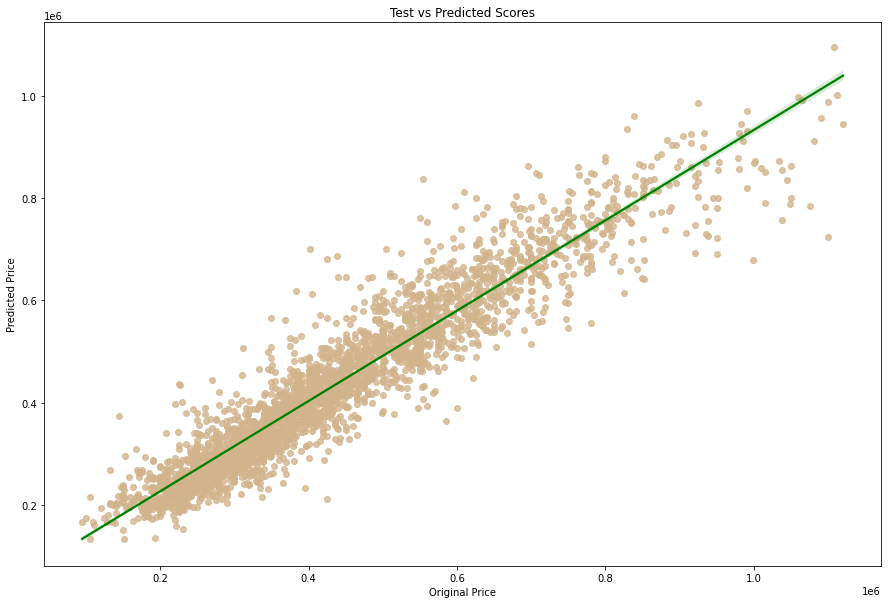

In [82]:
## plot the test, predicted score CBR
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'tan'}, line_kws={'color': 'green'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()


<font size="3">
    
MODEL COMPARISON
    
</font>

In [83]:
results = pd.DataFrame({
    'Model': ['KNN', 'TREE', 'Random Forest', 
              'XGB', 'GBR', 'CBR'],
 
    'Score': [r_squared_test_knn,
              r_squared_test_tree,
              r_squared_test_rf,
              r_squared_test_xgb,
              r_squared_test_gbr,
              r_squared_test_cbr],
    'RMSE':[rmse_knn,
           rmse_tree,
           rmse_rf,
           rmse_xgb,
           rmse_gbr,
           rmse_cb]
             })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model     RMSE
Score                        
0.90             CBR 58215.37
0.89             GBR 59090.50
0.89             XGB 59727.61
0.88   Random Forest 62901.19
0.79             KNN 83653.87
0.76            TREE 88687.56


<font size="3">
    
MODEL PERFROMANCE COMPARISON WITH TEST SCORE
    
All models have been cross-validated and evaluated based on their training scores. 
    
The performance of the models can be assessed based on the RMSE scores:

CBR (Score: 0.8969): Achieving an RMSE of 58215.37, this model demonstrates relatively good accuracy in predicting the target variable.

GBR (Score: 0.8944): With an RMSE of 58923.04, the Gradient Boosting Regression model also performs well and provides similar accuracy to the CBR model.

XGB (Score: 0.8915): The XGBoost model shows a slightly higher RMSE of 59727.61compared to the CBR and GBR models, indicating slightly lower predictive accuracy.

Random Forest (Score: 0.8777): The Random Forest model exhibits an RMSE of 63402.34, which is higher than the previous models. This suggests that it may not perform as well in predicting the target variable.

KNN (Score: 0.7871): The K-Nearest Neighbors model demonstrates a relatively higher RMSE of 83653.87, indicating less accuracy compared to the other models.

TREE (Score: 0.7514): Similarly, the decision tree model exhibits an RMSE of 90408.69, suggesting a lower predictive accuracy compared to the other models.

Based on the RMSE scores, the CBR and GBR models appear to be the top performers, followed by XGB. Random Forest, KNN, and TREE models show comparatively lower accuracy in predicting the target variable.
    
In addition to evaluating the RMSE, I also plotted a scatter diagram to visually compare the actual and predicted values. This allowed for a better understanding of the model's performance. As the RMSE decreases, it indicates that the spread or deviation of data points from the regression line is reduced. This aligns with the R-Squared values, as a higher R-Squared value indicates a better fit of the regression line to the data points. The scatter diagram serves as a visual confirmation of the model's accuracy, providing a clearer understanding of how well the model predicts the target variable and how closely it aligns with the actual values.

    

    
</font>

BELOW VALIDATION REQUIRED, CHECK

<font size="4">

HYPER PARAMETER SETTINGS
    
</font>

In [84]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import numpy as np

# Define the parameter grid

param_grid = {
    "learning_rate": [0.03, 0.04, 0.06],
    "iterations": np.linspace(100, 3000, 2, dtype=int),
    "depth": [5, 8, 10],
    "l2_leaf_reg": [2, 3, 5],
}

# Create a CatBoost regressor
catboost = CatBoostRegressor()

# Initialize GridSearchCV
clf = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, verbose= False, n_jobs=-1)

# Fit GridSearchCV on the training data
#clf.fit(X_train, y_train)

# Print the best parameters found
#print(clf.best_params_)

<font size="3">

catboost best parameters: 
'depth': 8, 'iterations': 2000, 'l2_leaf_reg': 2, 'learning_rate': 0.03
    
</font>

<font size="3">
    
RETRAIN MODEL CATBOOST REGRESSOR

</font>

In [92]:
## Train the cat boose model with best parameters
## 7 - Model XB
#import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


model7=cb.CatBoostRegressor(iterations=2000, 
                     learning_rate=0.03, 
                     depth=8, 
                     l2_leaf_reg=2, 
                     loss_function='RMSE', 
                     verbose=True)             

model7.fit(X_train,y_train,verbose=False)

y_pred = model7.predict(X_test)

print("CBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("CBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_cb = model7.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_cb = model7.score(X_test, y_test) # compute R-sdquared value for test
rmse_cb = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_cb = mean_absolute_error(y_test, y_pred)
mse_cb = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_cb * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_cb * 100))
print("RMSE (CBR): {:.2f}".format(rmse_cb))
print('MAE (CBR): {:.2f}'.format(mae_cb))
print('MSE (CBR): {:.2f}'.format(mse_cb))


CBR_Predictions: 363463, Actual Values: 431000
CBR_Predictions: 284051, Actual Values: 240000
Train_R^2: 95.97%
Test_R^2: 89.90%
RMSE (CBR): 57628.23
MAE (CBR): 40742.03
MSE (CBR): 3321013142.04


<font size="3">
    
The R-squared value was significantly improved to 89.9% after conducting hyperparameter tuning. Additionally, the RMSE value decreased to 57628.23, indicating a reduction in the model's prediction error. Similarly, the MAE value decreased to 40742.03, further confirming the improved accuracy of the model.
    
    

</font>

In [93]:
## Cross validation after fine tune
  
kf = KFold(n_splits=10,shuffle=True, random_state= 5) # 6 fold cross validation
cv_scores = cross_val_score(model7,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores

print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
#print()

0:	learn: 175584.0310712	total: 9.15ms	remaining: 18.3s
1:	learn: 171866.3662478	total: 19.9ms	remaining: 19.9s
2:	learn: 168519.2438482	total: 30.8ms	remaining: 20.5s
3:	learn: 165200.7918885	total: 40.8ms	remaining: 20.4s
4:	learn: 161883.7168759	total: 52.1ms	remaining: 20.8s
5:	learn: 158754.5293757	total: 74.7ms	remaining: 24.8s
6:	learn: 155738.0680916	total: 106ms	remaining: 30.3s
7:	learn: 152832.5461532	total: 125ms	remaining: 31.2s
8:	learn: 150176.0533990	total: 142ms	remaining: 31.4s
9:	learn: 147352.3829394	total: 161ms	remaining: 32s
10:	learn: 144847.1222674	total: 175ms	remaining: 31.6s
11:	learn: 142275.9072253	total: 188ms	remaining: 31.2s
12:	learn: 139852.9977186	total: 200ms	remaining: 30.6s
13:	learn: 137539.2060810	total: 214ms	remaining: 30.3s
14:	learn: 135302.3811325	total: 226ms	remaining: 29.9s
15:	learn: 133134.9924533	total: 240ms	remaining: 29.8s
16:	learn: 131023.9144484	total: 252ms	remaining: 29.4s
17:	learn: 128998.4399387	total: 265ms	remaining: 29.1

151:	learn: 65154.8903374	total: 1.67s	remaining: 20.3s
152:	learn: 65077.4053195	total: 1.68s	remaining: 20.3s
153:	learn: 64992.5757583	total: 1.7s	remaining: 20.4s
154:	learn: 64880.4725085	total: 1.71s	remaining: 20.4s
155:	learn: 64841.7117846	total: 1.73s	remaining: 20.4s
156:	learn: 64798.1530728	total: 1.74s	remaining: 20.4s
157:	learn: 64760.7595936	total: 1.76s	remaining: 20.5s
158:	learn: 64717.4371663	total: 1.78s	remaining: 20.6s
159:	learn: 64648.6359017	total: 1.8s	remaining: 20.7s
160:	learn: 64605.7457147	total: 1.81s	remaining: 20.7s
161:	learn: 64560.8018877	total: 1.83s	remaining: 20.7s
162:	learn: 64502.6166093	total: 1.84s	remaining: 20.7s
163:	learn: 64453.9254715	total: 1.85s	remaining: 20.7s
164:	learn: 64386.4818533	total: 1.86s	remaining: 20.7s
165:	learn: 64317.0476507	total: 1.88s	remaining: 20.7s
166:	learn: 64268.1843461	total: 1.89s	remaining: 20.8s
167:	learn: 64225.7160397	total: 1.91s	remaining: 20.8s
168:	learn: 64173.6736601	total: 1.92s	remaining: 

304:	learn: 58679.3044517	total: 3.26s	remaining: 18.1s
305:	learn: 58641.4295327	total: 3.27s	remaining: 18.1s
306:	learn: 58586.0372964	total: 3.28s	remaining: 18.1s
307:	learn: 58566.0247617	total: 3.29s	remaining: 18.1s
308:	learn: 58524.3146467	total: 3.3s	remaining: 18.1s
309:	learn: 58483.6376998	total: 3.31s	remaining: 18s
310:	learn: 58465.6761028	total: 3.32s	remaining: 18s
311:	learn: 58440.3904414	total: 3.33s	remaining: 18s
312:	learn: 58412.7842085	total: 3.33s	remaining: 18s
313:	learn: 58390.2803025	total: 3.34s	remaining: 18s
314:	learn: 58358.2644121	total: 3.35s	remaining: 17.9s
315:	learn: 58324.5753964	total: 3.36s	remaining: 17.9s
316:	learn: 58301.3462756	total: 3.37s	remaining: 17.9s
317:	learn: 58281.9852931	total: 3.38s	remaining: 17.9s
318:	learn: 58254.0590306	total: 3.39s	remaining: 17.9s
319:	learn: 58231.9312500	total: 3.4s	remaining: 17.8s
320:	learn: 58205.2348013	total: 3.4s	remaining: 17.8s
321:	learn: 58176.2637830	total: 3.41s	remaining: 17.8s
322:	

464:	learn: 54081.9824506	total: 4.71s	remaining: 15.5s
465:	learn: 54062.2295397	total: 4.71s	remaining: 15.5s
466:	learn: 54039.1040570	total: 4.72s	remaining: 15.5s
467:	learn: 54017.5565861	total: 4.73s	remaining: 15.5s
468:	learn: 53997.3823671	total: 4.74s	remaining: 15.5s
469:	learn: 53981.5203073	total: 4.75s	remaining: 15.5s
470:	learn: 53965.5921654	total: 4.76s	remaining: 15.4s
471:	learn: 53944.6884163	total: 4.77s	remaining: 15.4s
472:	learn: 53920.7128544	total: 4.78s	remaining: 15.4s
473:	learn: 53898.0949032	total: 4.79s	remaining: 15.4s
474:	learn: 53866.5518999	total: 4.79s	remaining: 15.4s
475:	learn: 53842.1745205	total: 4.8s	remaining: 15.4s
476:	learn: 53816.9467808	total: 4.81s	remaining: 15.4s
477:	learn: 53796.9296221	total: 4.82s	remaining: 15.4s
478:	learn: 53780.9951937	total: 4.83s	remaining: 15.3s
479:	learn: 53757.1678505	total: 4.84s	remaining: 15.3s
480:	learn: 53724.7949435	total: 4.85s	remaining: 15.3s
481:	learn: 53699.5532937	total: 4.86s	remaining:

617:	learn: 50921.1764918	total: 6.06s	remaining: 13.5s
618:	learn: 50906.2165423	total: 6.07s	remaining: 13.5s
619:	learn: 50871.9495553	total: 6.08s	remaining: 13.5s
620:	learn: 50855.0366417	total: 6.08s	remaining: 13.5s
621:	learn: 50836.1561455	total: 6.09s	remaining: 13.5s
622:	learn: 50813.5023068	total: 6.1s	remaining: 13.5s
623:	learn: 50792.9360743	total: 6.11s	remaining: 13.5s
624:	learn: 50766.1448668	total: 6.12s	remaining: 13.5s
625:	learn: 50747.1994456	total: 6.13s	remaining: 13.4s
626:	learn: 50730.8539254	total: 6.13s	remaining: 13.4s
627:	learn: 50700.4362607	total: 6.14s	remaining: 13.4s
628:	learn: 50686.0383759	total: 6.15s	remaining: 13.4s
629:	learn: 50666.9883033	total: 6.16s	remaining: 13.4s
630:	learn: 50647.9187444	total: 6.17s	remaining: 13.4s
631:	learn: 50633.0370435	total: 6.18s	remaining: 13.4s
632:	learn: 50615.5277822	total: 6.19s	remaining: 13.4s
633:	learn: 50594.0920141	total: 6.2s	remaining: 13.3s
634:	learn: 50573.3231495	total: 6.2s	remaining: 1

765:	learn: 48464.1439646	total: 7.52s	remaining: 12.1s
766:	learn: 48452.8933716	total: 7.54s	remaining: 12.1s
767:	learn: 48438.1811186	total: 7.56s	remaining: 12.1s
768:	learn: 48422.9193540	total: 7.57s	remaining: 12.1s
769:	learn: 48402.6705249	total: 7.59s	remaining: 12.1s
770:	learn: 48392.7917400	total: 7.6s	remaining: 12.1s
771:	learn: 48380.1815733	total: 7.62s	remaining: 12.1s
772:	learn: 48372.3501682	total: 7.63s	remaining: 12.1s
773:	learn: 48358.5937994	total: 7.64s	remaining: 12.1s
774:	learn: 48343.9036804	total: 7.66s	remaining: 12.1s
775:	learn: 48330.3149369	total: 7.67s	remaining: 12.1s
776:	learn: 48316.0015536	total: 7.68s	remaining: 12.1s
777:	learn: 48302.5515622	total: 7.7s	remaining: 12.1s
778:	learn: 48286.9806440	total: 7.71s	remaining: 12.1s
779:	learn: 48273.4346627	total: 7.73s	remaining: 12.1s
780:	learn: 48252.1741057	total: 7.74s	remaining: 12.1s
781:	learn: 48243.9887783	total: 7.76s	remaining: 12.1s
782:	learn: 48227.7450601	total: 7.77s	remaining: 

920:	learn: 46216.9477330	total: 9s	remaining: 10.5s
921:	learn: 46201.4014970	total: 9.01s	remaining: 10.5s
922:	learn: 46183.4657558	total: 9.02s	remaining: 10.5s
923:	learn: 46162.5024438	total: 9.03s	remaining: 10.5s
924:	learn: 46148.5178630	total: 9.04s	remaining: 10.5s
925:	learn: 46131.9098736	total: 9.05s	remaining: 10.5s
926:	learn: 46113.7301710	total: 9.06s	remaining: 10.5s
927:	learn: 46097.1567124	total: 9.07s	remaining: 10.5s
928:	learn: 46084.4737326	total: 9.07s	remaining: 10.5s
929:	learn: 46065.4036652	total: 9.08s	remaining: 10.5s
930:	learn: 46055.4638062	total: 9.09s	remaining: 10.4s
931:	learn: 46043.8058491	total: 9.1s	remaining: 10.4s
932:	learn: 46027.6270498	total: 9.11s	remaining: 10.4s
933:	learn: 46019.3274218	total: 9.12s	remaining: 10.4s
934:	learn: 46007.9054311	total: 9.13s	remaining: 10.4s
935:	learn: 45989.1897708	total: 9.13s	remaining: 10.4s
936:	learn: 45982.2995181	total: 9.14s	remaining: 10.4s
937:	learn: 45977.4858530	total: 9.15s	remaining: 10

1068:	learn: 44255.0195461	total: 10.3s	remaining: 8.93s
1069:	learn: 44243.9774608	total: 10.3s	remaining: 8.92s
1070:	learn: 44233.9593054	total: 10.3s	remaining: 8.91s
1071:	learn: 44226.0279291	total: 10.3s	remaining: 8.9s
1072:	learn: 44215.0310512	total: 10.3s	remaining: 8.89s
1073:	learn: 44202.6872851	total: 10.3s	remaining: 8.88s
1074:	learn: 44189.1944249	total: 10.3s	remaining: 8.87s
1075:	learn: 44175.4704466	total: 10.3s	remaining: 8.86s
1076:	learn: 44165.6043163	total: 10.3s	remaining: 8.85s
1077:	learn: 44157.2361829	total: 10.3s	remaining: 8.84s
1078:	learn: 44150.2956774	total: 10.3s	remaining: 8.83s
1079:	learn: 44142.0640940	total: 10.4s	remaining: 8.82s
1080:	learn: 44120.5295704	total: 10.4s	remaining: 8.81s
1081:	learn: 44111.0008243	total: 10.4s	remaining: 8.8s
1082:	learn: 44093.0615997	total: 10.4s	remaining: 8.79s
1083:	learn: 44075.0092068	total: 10.4s	remaining: 8.78s
1084:	learn: 44064.3784514	total: 10.4s	remaining: 8.77s
1085:	learn: 44055.3723371	total:

1213:	learn: 42648.8639764	total: 11.5s	remaining: 7.44s
1214:	learn: 42637.8492515	total: 11.5s	remaining: 7.43s
1215:	learn: 42631.6498262	total: 11.5s	remaining: 7.42s
1216:	learn: 42625.7057622	total: 11.5s	remaining: 7.41s
1217:	learn: 42616.2865167	total: 11.5s	remaining: 7.4s
1218:	learn: 42606.0515509	total: 11.5s	remaining: 7.39s
1219:	learn: 42596.1506453	total: 11.5s	remaining: 7.38s
1220:	learn: 42587.7741707	total: 11.5s	remaining: 7.37s
1221:	learn: 42579.5076684	total: 11.6s	remaining: 7.36s
1222:	learn: 42562.3591979	total: 11.6s	remaining: 7.35s
1223:	learn: 42554.0670063	total: 11.6s	remaining: 7.34s
1224:	learn: 42544.4559894	total: 11.6s	remaining: 7.33s
1225:	learn: 42533.3172532	total: 11.6s	remaining: 7.32s
1226:	learn: 42523.5843133	total: 11.6s	remaining: 7.31s
1227:	learn: 42512.5681693	total: 11.6s	remaining: 7.3s
1228:	learn: 42502.1830505	total: 11.6s	remaining: 7.29s
1229:	learn: 42490.6310290	total: 11.6s	remaining: 7.28s
1230:	learn: 42479.2383838	total:

1361:	learn: 41029.7071665	total: 12.8s	remaining: 5.97s
1362:	learn: 41021.8640976	total: 12.8s	remaining: 5.96s
1363:	learn: 41007.8208355	total: 12.8s	remaining: 5.96s
1364:	learn: 40996.6900803	total: 12.8s	remaining: 5.95s
1365:	learn: 40987.0464791	total: 12.8s	remaining: 5.94s
1366:	learn: 40979.9232814	total: 12.8s	remaining: 5.94s
1367:	learn: 40972.7815487	total: 12.8s	remaining: 5.93s
1368:	learn: 40962.4884157	total: 12.8s	remaining: 5.92s
1369:	learn: 40955.9095746	total: 12.9s	remaining: 5.91s
1370:	learn: 40941.7535692	total: 12.9s	remaining: 5.9s
1371:	learn: 40933.4670038	total: 12.9s	remaining: 5.9s
1372:	learn: 40918.7212057	total: 12.9s	remaining: 5.89s
1373:	learn: 40908.6449574	total: 12.9s	remaining: 5.88s
1374:	learn: 40900.8394843	total: 12.9s	remaining: 5.87s
1375:	learn: 40887.6570031	total: 12.9s	remaining: 5.86s
1376:	learn: 40873.9690076	total: 12.9s	remaining: 5.85s
1377:	learn: 40864.6010531	total: 13s	remaining: 5.85s
1378:	learn: 40857.0957137	total: 1

1524:	learn: 39473.4577234	total: 14.4s	remaining: 4.49s
1525:	learn: 39466.1956118	total: 14.4s	remaining: 4.48s
1526:	learn: 39454.2306144	total: 14.4s	remaining: 4.47s
1527:	learn: 39447.8546599	total: 14.4s	remaining: 4.46s
1528:	learn: 39439.9198076	total: 14.5s	remaining: 4.45s
1529:	learn: 39429.8324916	total: 14.5s	remaining: 4.44s
1530:	learn: 39419.4746385	total: 14.5s	remaining: 4.43s
1531:	learn: 39408.4564333	total: 14.5s	remaining: 4.42s
1532:	learn: 39396.5407779	total: 14.5s	remaining: 4.41s
1533:	learn: 39385.1439612	total: 14.5s	remaining: 4.4s
1534:	learn: 39375.6581556	total: 14.5s	remaining: 4.39s
1535:	learn: 39366.9464658	total: 14.5s	remaining: 4.38s
1536:	learn: 39356.4374688	total: 14.5s	remaining: 4.38s
1537:	learn: 39347.7168451	total: 14.5s	remaining: 4.37s
1538:	learn: 39342.4876718	total: 14.5s	remaining: 4.36s
1539:	learn: 39335.1516984	total: 14.6s	remaining: 4.35s
1540:	learn: 39329.6123095	total: 14.6s	remaining: 4.34s
1541:	learn: 39321.1397223	total

1689:	learn: 37997.4544048	total: 15.9s	remaining: 2.91s
1690:	learn: 37988.9287750	total: 15.9s	remaining: 2.9s
1691:	learn: 37980.2255013	total: 15.9s	remaining: 2.9s
1692:	learn: 37974.3329342	total: 15.9s	remaining: 2.88s
1693:	learn: 37965.7428634	total: 15.9s	remaining: 2.88s
1694:	learn: 37951.5359952	total: 15.9s	remaining: 2.87s
1695:	learn: 37948.0555329	total: 15.9s	remaining: 2.86s
1696:	learn: 37940.8940714	total: 15.9s	remaining: 2.85s
1697:	learn: 37932.5464041	total: 16s	remaining: 2.84s
1698:	learn: 37923.4335620	total: 16s	remaining: 2.83s
1699:	learn: 37916.0280295	total: 16s	remaining: 2.82s
1700:	learn: 37906.7455886	total: 16s	remaining: 2.81s
1701:	learn: 37898.8607955	total: 16s	remaining: 2.8s
1702:	learn: 37889.5740299	total: 16s	remaining: 2.79s
1703:	learn: 37881.1046330	total: 16s	remaining: 2.78s
1704:	learn: 37874.3751866	total: 16s	remaining: 2.77s
1705:	learn: 37866.2922423	total: 16s	remaining: 2.76s
1706:	learn: 37855.3840106	total: 16s	remaining: 2.7

1854:	learn: 36667.1872985	total: 17.3s	remaining: 1.35s
1855:	learn: 36659.2286466	total: 17.3s	remaining: 1.34s
1856:	learn: 36653.6756160	total: 17.3s	remaining: 1.33s
1857:	learn: 36647.9354118	total: 17.3s	remaining: 1.32s
1858:	learn: 36639.6896927	total: 17.3s	remaining: 1.31s
1859:	learn: 36630.6049029	total: 17.4s	remaining: 1.31s
1860:	learn: 36623.4304383	total: 17.4s	remaining: 1.3s
1861:	learn: 36612.0245378	total: 17.4s	remaining: 1.29s
1862:	learn: 36607.1049909	total: 17.4s	remaining: 1.28s
1863:	learn: 36599.8804348	total: 17.4s	remaining: 1.27s
1864:	learn: 36591.8294175	total: 17.4s	remaining: 1.26s
1865:	learn: 36579.1455886	total: 17.4s	remaining: 1.25s
1866:	learn: 36570.9821767	total: 17.4s	remaining: 1.24s
1867:	learn: 36566.8232155	total: 17.4s	remaining: 1.23s
1868:	learn: 36559.6739646	total: 17.4s	remaining: 1.22s
1869:	learn: 36552.4487464	total: 17.4s	remaining: 1.21s
1870:	learn: 36540.2469062	total: 17.4s	remaining: 1.2s
1871:	learn: 36534.0425593	total:

0:	learn: 176242.9628765	total: 13.8ms	remaining: 27.6s
1:	learn: 172492.1195152	total: 25.3ms	remaining: 25.3s
2:	learn: 168871.8733238	total: 38.2ms	remaining: 25.4s
3:	learn: 165537.4118451	total: 47.1ms	remaining: 23.5s
4:	learn: 162226.1059957	total: 57ms	remaining: 22.7s
5:	learn: 159145.7991635	total: 67.4ms	remaining: 22.4s
6:	learn: 156096.5904982	total: 78.5ms	remaining: 22.3s
7:	learn: 153169.6867104	total: 90.3ms	remaining: 22.5s
8:	learn: 150457.8797415	total: 100ms	remaining: 22.1s
9:	learn: 147604.7483754	total: 110ms	remaining: 21.9s
10:	learn: 144837.3415897	total: 119ms	remaining: 21.5s
11:	learn: 142291.4622017	total: 129ms	remaining: 21.3s
12:	learn: 139848.3914060	total: 138ms	remaining: 21s
13:	learn: 137507.2082800	total: 147ms	remaining: 20.8s
14:	learn: 135269.3458898	total: 155ms	remaining: 20.6s
15:	learn: 133087.0302105	total: 164ms	remaining: 20.3s
16:	learn: 130982.0558456	total: 173ms	remaining: 20.2s
17:	learn: 128912.0621511	total: 183ms	remaining: 20.1

166:	learn: 63544.0901194	total: 1.47s	remaining: 16.2s
167:	learn: 63509.8268370	total: 1.48s	remaining: 16.2s
168:	learn: 63472.2193463	total: 1.49s	remaining: 16.2s
169:	learn: 63433.6845909	total: 1.5s	remaining: 16.2s
170:	learn: 63392.8999304	total: 1.51s	remaining: 16.2s
171:	learn: 63313.5772075	total: 1.52s	remaining: 16.1s
172:	learn: 63255.2805157	total: 1.53s	remaining: 16.1s
173:	learn: 63221.8133298	total: 1.54s	remaining: 16.1s
174:	learn: 63163.5274981	total: 1.54s	remaining: 16.1s
175:	learn: 63087.2841689	total: 1.55s	remaining: 16.1s
176:	learn: 63051.0182022	total: 1.56s	remaining: 16.1s
177:	learn: 63017.3159040	total: 1.57s	remaining: 16.1s
178:	learn: 62938.4024423	total: 1.58s	remaining: 16.1s
179:	learn: 62899.5287802	total: 1.59s	remaining: 16s
180:	learn: 62870.3051022	total: 1.59s	remaining: 16s
181:	learn: 62823.6932872	total: 1.6s	remaining: 16s
182:	learn: 62767.6803467	total: 1.61s	remaining: 16s
183:	learn: 62697.6236917	total: 1.62s	remaining: 16s
184:

323:	learn: 57556.6864069	total: 2.89s	remaining: 15s
324:	learn: 57530.5411066	total: 2.9s	remaining: 15s
325:	learn: 57490.8990933	total: 2.91s	remaining: 15s
326:	learn: 57462.8138479	total: 2.92s	remaining: 14.9s
327:	learn: 57428.7251361	total: 2.93s	remaining: 14.9s
328:	learn: 57408.6097098	total: 2.94s	remaining: 14.9s
329:	learn: 57388.6161126	total: 2.95s	remaining: 14.9s
330:	learn: 57350.1962137	total: 2.96s	remaining: 14.9s
331:	learn: 57303.2961821	total: 2.96s	remaining: 14.9s
332:	learn: 57272.1331619	total: 2.97s	remaining: 14.9s
333:	learn: 57246.5866514	total: 2.98s	remaining: 14.9s
334:	learn: 57205.0305146	total: 2.99s	remaining: 14.9s
335:	learn: 57172.9979762	total: 3s	remaining: 14.9s
336:	learn: 57151.6205807	total: 3.01s	remaining: 14.8s
337:	learn: 57116.0208894	total: 3.02s	remaining: 14.8s
338:	learn: 57062.9593369	total: 3.02s	remaining: 14.8s
339:	learn: 57045.3947357	total: 3.03s	remaining: 14.8s
340:	learn: 57025.1051401	total: 3.04s	remaining: 14.8s
34

489:	learn: 53253.5394007	total: 4.3s	remaining: 13.3s
490:	learn: 53239.5949399	total: 4.31s	remaining: 13.3s
491:	learn: 53226.6925143	total: 4.32s	remaining: 13.2s
492:	learn: 53193.4322918	total: 4.33s	remaining: 13.2s
493:	learn: 53168.0602840	total: 4.34s	remaining: 13.2s
494:	learn: 53138.4738106	total: 4.35s	remaining: 13.2s
495:	learn: 53114.8877720	total: 4.36s	remaining: 13.2s
496:	learn: 53094.2193656	total: 4.36s	remaining: 13.2s
497:	learn: 53079.0984588	total: 4.37s	remaining: 13.2s
498:	learn: 53050.9309648	total: 4.38s	remaining: 13.2s
499:	learn: 53028.2215864	total: 4.39s	remaining: 13.2s
500:	learn: 52993.5043413	total: 4.4s	remaining: 13.2s
501:	learn: 52971.9519337	total: 4.41s	remaining: 13.1s
502:	learn: 52954.3750371	total: 4.41s	remaining: 13.1s
503:	learn: 52925.4616613	total: 4.42s	remaining: 13.1s
504:	learn: 52914.0376957	total: 4.43s	remaining: 13.1s
505:	learn: 52893.2802672	total: 4.44s	remaining: 13.1s
506:	learn: 52879.9453519	total: 4.45s	remaining: 

657:	learn: 49912.9702272	total: 6.01s	remaining: 12.3s
658:	learn: 49900.1046403	total: 6.02s	remaining: 12.3s
659:	learn: 49880.6853487	total: 6.03s	remaining: 12.2s
660:	learn: 49864.8047167	total: 6.04s	remaining: 12.2s
661:	learn: 49849.1437047	total: 6.05s	remaining: 12.2s
662:	learn: 49824.0757658	total: 6.06s	remaining: 12.2s
663:	learn: 49805.2052055	total: 6.07s	remaining: 12.2s
664:	learn: 49793.1336871	total: 6.08s	remaining: 12.2s
665:	learn: 49781.9779363	total: 6.08s	remaining: 12.2s
666:	learn: 49762.6017499	total: 6.09s	remaining: 12.2s
667:	learn: 49738.8779219	total: 6.1s	remaining: 12.2s
668:	learn: 49720.5046973	total: 6.11s	remaining: 12.2s
669:	learn: 49698.3316458	total: 6.12s	remaining: 12.1s
670:	learn: 49679.7628416	total: 6.13s	remaining: 12.1s
671:	learn: 49661.7426742	total: 6.13s	remaining: 12.1s
672:	learn: 49644.4829654	total: 6.14s	remaining: 12.1s
673:	learn: 49627.7097134	total: 6.15s	remaining: 12.1s
674:	learn: 49597.4156973	total: 6.16s	remaining:

822:	learn: 47311.9937590	total: 7.42s	remaining: 10.6s
823:	learn: 47296.4966137	total: 7.43s	remaining: 10.6s
824:	learn: 47272.5073796	total: 7.44s	remaining: 10.6s
825:	learn: 47246.3582949	total: 7.45s	remaining: 10.6s
826:	learn: 47226.4311808	total: 7.46s	remaining: 10.6s
827:	learn: 47210.1456546	total: 7.47s	remaining: 10.6s
828:	learn: 47190.6770539	total: 7.48s	remaining: 10.6s
829:	learn: 47177.6976456	total: 7.48s	remaining: 10.6s
830:	learn: 47162.6647212	total: 7.49s	remaining: 10.5s
831:	learn: 47148.5609282	total: 7.5s	remaining: 10.5s
832:	learn: 47136.9500185	total: 7.51s	remaining: 10.5s
833:	learn: 47121.1718124	total: 7.52s	remaining: 10.5s
834:	learn: 47096.7805741	total: 7.53s	remaining: 10.5s
835:	learn: 47083.8635704	total: 7.53s	remaining: 10.5s
836:	learn: 47070.1167068	total: 7.54s	remaining: 10.5s
837:	learn: 47062.7082381	total: 7.55s	remaining: 10.5s
838:	learn: 47045.0288003	total: 7.56s	remaining: 10.5s
839:	learn: 47024.9622335	total: 7.57s	remaining:

971:	learn: 45326.5874073	total: 8.68s	remaining: 9.18s
972:	learn: 45314.3222643	total: 8.69s	remaining: 9.17s
973:	learn: 45305.7238855	total: 8.7s	remaining: 9.16s
974:	learn: 45290.1690699	total: 8.71s	remaining: 9.15s
975:	learn: 45280.9178234	total: 8.71s	remaining: 9.14s
976:	learn: 45269.5549702	total: 8.72s	remaining: 9.13s
977:	learn: 45257.3845835	total: 8.73s	remaining: 9.13s
978:	learn: 45246.0212044	total: 8.74s	remaining: 9.12s
979:	learn: 45236.3257908	total: 8.75s	remaining: 9.11s
980:	learn: 45228.4587526	total: 8.76s	remaining: 9.1s
981:	learn: 45211.4301570	total: 8.77s	remaining: 9.09s
982:	learn: 45198.4765602	total: 8.78s	remaining: 9.08s
983:	learn: 45186.9208200	total: 8.78s	remaining: 9.07s
984:	learn: 45178.9923371	total: 8.79s	remaining: 9.06s
985:	learn: 45169.6607758	total: 8.8s	remaining: 9.05s
986:	learn: 45156.4345035	total: 8.81s	remaining: 9.04s
987:	learn: 45146.2187271	total: 8.82s	remaining: 9.03s
988:	learn: 45136.3432119	total: 8.82s	remaining: 9

1140:	learn: 43269.1869226	total: 10.1s	remaining: 7.63s
1141:	learn: 43262.0453756	total: 10.1s	remaining: 7.62s
1142:	learn: 43252.9384104	total: 10.2s	remaining: 7.61s
1143:	learn: 43240.2010384	total: 10.2s	remaining: 7.6s
1144:	learn: 43233.5191781	total: 10.2s	remaining: 7.59s
1145:	learn: 43226.1113495	total: 10.2s	remaining: 7.58s
1146:	learn: 43216.6779312	total: 10.2s	remaining: 7.57s
1147:	learn: 43208.8307398	total: 10.2s	remaining: 7.57s
1148:	learn: 43192.2613938	total: 10.2s	remaining: 7.56s
1149:	learn: 43184.2153560	total: 10.2s	remaining: 7.55s
1150:	learn: 43172.8106088	total: 10.2s	remaining: 7.54s
1151:	learn: 43157.0945314	total: 10.2s	remaining: 7.53s
1152:	learn: 43146.8524825	total: 10.2s	remaining: 7.52s
1153:	learn: 43139.3402658	total: 10.2s	remaining: 7.51s
1154:	learn: 43125.0751045	total: 10.3s	remaining: 7.5s
1155:	learn: 43118.3511788	total: 10.3s	remaining: 7.49s
1156:	learn: 43108.8285038	total: 10.3s	remaining: 7.48s
1157:	learn: 43098.2841159	total:

1303:	learn: 41571.2379292	total: 11.8s	remaining: 6.29s
1304:	learn: 41564.2799694	total: 11.8s	remaining: 6.28s
1305:	learn: 41554.3843545	total: 11.8s	remaining: 6.27s
1306:	learn: 41544.2058389	total: 11.8s	remaining: 6.26s
1307:	learn: 41535.3572707	total: 11.8s	remaining: 6.25s
1308:	learn: 41528.2018797	total: 11.8s	remaining: 6.25s
1309:	learn: 41518.3512861	total: 11.8s	remaining: 6.24s
1310:	learn: 41513.7852656	total: 11.8s	remaining: 6.23s
1311:	learn: 41502.0875905	total: 11.9s	remaining: 6.22s
1312:	learn: 41492.6495241	total: 11.9s	remaining: 6.21s
1313:	learn: 41475.9381261	total: 11.9s	remaining: 6.2s
1314:	learn: 41469.1532672	total: 11.9s	remaining: 6.19s
1315:	learn: 41463.6621196	total: 11.9s	remaining: 6.18s
1316:	learn: 41451.7670468	total: 11.9s	remaining: 6.17s
1317:	learn: 41439.1365650	total: 11.9s	remaining: 6.16s
1318:	learn: 41422.9133700	total: 11.9s	remaining: 6.15s
1319:	learn: 41411.6455407	total: 11.9s	remaining: 6.14s
1320:	learn: 41401.6587023	total

1453:	learn: 40110.9273696	total: 13.1s	remaining: 4.9s
1454:	learn: 40104.9363333	total: 13.1s	remaining: 4.89s
1455:	learn: 40097.8546664	total: 13.1s	remaining: 4.88s
1456:	learn: 40082.5981014	total: 13.1s	remaining: 4.88s
1457:	learn: 40071.1592357	total: 13.1s	remaining: 4.87s
1458:	learn: 40062.1124928	total: 13.1s	remaining: 4.86s
1459:	learn: 40052.3802252	total: 13.1s	remaining: 4.85s
1460:	learn: 40045.9649980	total: 13.1s	remaining: 4.84s
1461:	learn: 40041.2781960	total: 13.1s	remaining: 4.83s
1462:	learn: 40033.9014661	total: 13.1s	remaining: 4.82s
1463:	learn: 40021.0730686	total: 13.1s	remaining: 4.81s
1464:	learn: 40014.2762520	total: 13.1s	remaining: 4.8s
1465:	learn: 40004.9425861	total: 13.2s	remaining: 4.79s
1466:	learn: 39997.7960006	total: 13.2s	remaining: 4.78s
1467:	learn: 39989.5229932	total: 13.2s	remaining: 4.77s
1468:	learn: 39980.6717611	total: 13.2s	remaining: 4.76s
1469:	learn: 39970.1127394	total: 13.2s	remaining: 4.76s
1470:	learn: 39960.5337711	total:

1600:	learn: 38771.2923291	total: 14.3s	remaining: 3.56s
1601:	learn: 38762.7637723	total: 14.3s	remaining: 3.56s
1602:	learn: 38755.1326636	total: 14.3s	remaining: 3.55s
1603:	learn: 38750.3848229	total: 14.3s	remaining: 3.54s
1604:	learn: 38744.4431376	total: 14.3s	remaining: 3.53s
1605:	learn: 38735.8487696	total: 14.4s	remaining: 3.52s
1606:	learn: 38719.6056981	total: 14.4s	remaining: 3.51s
1607:	learn: 38702.3362042	total: 14.4s	remaining: 3.5s
1608:	learn: 38691.6178069	total: 14.4s	remaining: 3.49s
1609:	learn: 38685.1437151	total: 14.4s	remaining: 3.48s
1610:	learn: 38675.1864167	total: 14.4s	remaining: 3.48s
1611:	learn: 38663.4817503	total: 14.4s	remaining: 3.47s
1612:	learn: 38657.4294763	total: 14.4s	remaining: 3.46s
1613:	learn: 38651.0049389	total: 14.4s	remaining: 3.45s
1614:	learn: 38636.7284141	total: 14.4s	remaining: 3.44s
1615:	learn: 38627.6600876	total: 14.4s	remaining: 3.43s
1616:	learn: 38617.2362582	total: 14.4s	remaining: 3.42s
1617:	learn: 38611.8052396	total

1746:	learn: 37505.3900238	total: 15.5s	remaining: 2.25s
1747:	learn: 37494.4774769	total: 15.6s	remaining: 2.24s
1748:	learn: 37486.1990372	total: 15.6s	remaining: 2.23s
1749:	learn: 37481.2576129	total: 15.6s	remaining: 2.22s
1750:	learn: 37472.7651772	total: 15.6s	remaining: 2.21s
1751:	learn: 37463.6963377	total: 15.6s	remaining: 2.21s
1752:	learn: 37448.4405063	total: 15.6s	remaining: 2.2s
1753:	learn: 37437.6011650	total: 15.6s	remaining: 2.19s
1754:	learn: 37433.1321926	total: 15.6s	remaining: 2.18s
1755:	learn: 37424.8062328	total: 15.6s	remaining: 2.17s
1756:	learn: 37417.2701033	total: 15.6s	remaining: 2.16s
1757:	learn: 37408.3497810	total: 15.6s	remaining: 2.15s
1758:	learn: 37403.1389358	total: 15.6s	remaining: 2.14s
1759:	learn: 37396.3731661	total: 15.7s	remaining: 2.13s
1760:	learn: 37390.0396099	total: 15.7s	remaining: 2.13s
1761:	learn: 37384.4002693	total: 15.7s	remaining: 2.12s
1762:	learn: 37378.4247538	total: 15.7s	remaining: 2.11s
1763:	learn: 37367.8663742	total

1908:	learn: 36256.2368011	total: 17.2s	remaining: 819ms
1909:	learn: 36244.0637729	total: 17.2s	remaining: 810ms
1910:	learn: 36237.5875459	total: 17.2s	remaining: 801ms
1911:	learn: 36233.6666312	total: 17.2s	remaining: 792ms
1912:	learn: 36231.1445211	total: 17.2s	remaining: 783ms
1913:	learn: 36223.4259684	total: 17.2s	remaining: 774ms
1914:	learn: 36219.4437397	total: 17.2s	remaining: 765ms
1915:	learn: 36210.1259419	total: 17.2s	remaining: 756ms
1916:	learn: 36203.9225512	total: 17.3s	remaining: 747ms
1917:	learn: 36200.5342244	total: 17.3s	remaining: 738ms
1918:	learn: 36197.1607180	total: 17.3s	remaining: 729ms
1919:	learn: 36188.0970867	total: 17.3s	remaining: 720ms
1920:	learn: 36184.5942802	total: 17.3s	remaining: 711ms
1921:	learn: 36179.4766437	total: 17.3s	remaining: 702ms
1922:	learn: 36168.1476117	total: 17.3s	remaining: 693ms
1923:	learn: 36162.8008193	total: 17.3s	remaining: 684ms
1924:	learn: 36150.3152778	total: 17.3s	remaining: 675ms
1925:	learn: 36139.5986173	tota

72:	learn: 77352.9581190	total: 618ms	remaining: 16.3s
73:	learn: 77089.0447366	total: 627ms	remaining: 16.3s
74:	learn: 76817.5738924	total: 636ms	remaining: 16.3s
75:	learn: 76507.9690954	total: 645ms	remaining: 16.3s
76:	learn: 76228.3831284	total: 654ms	remaining: 16.3s
77:	learn: 75957.1423215	total: 663ms	remaining: 16.3s
78:	learn: 75655.9061248	total: 671ms	remaining: 16.3s
79:	learn: 75406.4620784	total: 680ms	remaining: 16.3s
80:	learn: 75144.0082530	total: 689ms	remaining: 16.3s
81:	learn: 74750.6286759	total: 697ms	remaining: 16.3s
82:	learn: 74526.7373289	total: 706ms	remaining: 16.3s
83:	learn: 74285.0429553	total: 714ms	remaining: 16.3s
84:	learn: 74068.4169382	total: 722ms	remaining: 16.3s
85:	learn: 73771.7423097	total: 730ms	remaining: 16.3s
86:	learn: 73565.3093299	total: 739ms	remaining: 16.3s
87:	learn: 73267.7183146	total: 747ms	remaining: 16.2s
88:	learn: 72970.6953186	total: 756ms	remaining: 16.2s
89:	learn: 72772.1272499	total: 764ms	remaining: 16.2s
90:	learn:

222:	learn: 61747.4221308	total: 1.89s	remaining: 15.1s
223:	learn: 61706.4935919	total: 1.9s	remaining: 15.1s
224:	learn: 61682.9305984	total: 1.91s	remaining: 15.1s
225:	learn: 61659.4286850	total: 1.92s	remaining: 15.1s
226:	learn: 61618.9237828	total: 1.93s	remaining: 15.1s
227:	learn: 61586.4807391	total: 1.94s	remaining: 15.1s
228:	learn: 61539.9761258	total: 1.95s	remaining: 15.1s
229:	learn: 61504.1864200	total: 1.96s	remaining: 15.1s
230:	learn: 61478.7487365	total: 1.96s	remaining: 15s
231:	learn: 61459.7467377	total: 1.97s	remaining: 15s
232:	learn: 61421.7827034	total: 1.98s	remaining: 15s
233:	learn: 61357.6235998	total: 1.99s	remaining: 15s
234:	learn: 61317.6060707	total: 2s	remaining: 15s
235:	learn: 61277.1676549	total: 2.01s	remaining: 15s
236:	learn: 61243.6334025	total: 2.02s	remaining: 15s
237:	learn: 61210.8371812	total: 2.02s	remaining: 15s
238:	learn: 61159.7614899	total: 2.03s	remaining: 15s
239:	learn: 61134.5716422	total: 2.04s	remaining: 15s
240:	learn: 6110

387:	learn: 56456.9587641	total: 3.36s	remaining: 13.9s
388:	learn: 56426.8210517	total: 3.37s	remaining: 13.9s
389:	learn: 56411.2961100	total: 3.38s	remaining: 13.9s
390:	learn: 56390.6588599	total: 3.38s	remaining: 13.9s
391:	learn: 56359.7425381	total: 3.39s	remaining: 13.9s
392:	learn: 56319.4060670	total: 3.4s	remaining: 13.9s
393:	learn: 56287.9732205	total: 3.42s	remaining: 13.9s
394:	learn: 56261.6026168	total: 3.42s	remaining: 13.9s
395:	learn: 56236.8284199	total: 3.43s	remaining: 13.9s
396:	learn: 56216.4046016	total: 3.44s	remaining: 13.9s
397:	learn: 56197.4389982	total: 3.45s	remaining: 13.9s
398:	learn: 56158.1989729	total: 3.46s	remaining: 13.9s
399:	learn: 56131.6008688	total: 3.47s	remaining: 13.9s
400:	learn: 56106.7235750	total: 3.48s	remaining: 13.9s
401:	learn: 56074.1088315	total: 3.5s	remaining: 13.9s
402:	learn: 56036.7384389	total: 3.52s	remaining: 13.9s
403:	learn: 56014.8192016	total: 3.53s	remaining: 13.9s
404:	learn: 55997.6672485	total: 3.55s	remaining: 

538:	learn: 52745.2539022	total: 5.04s	remaining: 13.7s
539:	learn: 52721.8428095	total: 5.05s	remaining: 13.6s
540:	learn: 52697.9301764	total: 5.06s	remaining: 13.6s
541:	learn: 52673.9770349	total: 5.07s	remaining: 13.6s
542:	learn: 52644.9283349	total: 5.07s	remaining: 13.6s
543:	learn: 52619.9144843	total: 5.08s	remaining: 13.6s
544:	learn: 52601.3420890	total: 5.09s	remaining: 13.6s
545:	learn: 52580.5573446	total: 5.1s	remaining: 13.6s
546:	learn: 52567.4837445	total: 5.11s	remaining: 13.6s
547:	learn: 52534.8008605	total: 5.12s	remaining: 13.6s
548:	learn: 52517.1718196	total: 5.13s	remaining: 13.6s
549:	learn: 52493.1427597	total: 5.14s	remaining: 13.5s
550:	learn: 52479.9641190	total: 5.14s	remaining: 13.5s
551:	learn: 52461.8615357	total: 5.15s	remaining: 13.5s
552:	learn: 52442.1753701	total: 5.16s	remaining: 13.5s
553:	learn: 52419.4491878	total: 5.17s	remaining: 13.5s
554:	learn: 52404.2186067	total: 5.18s	remaining: 13.5s
555:	learn: 52379.8381394	total: 5.19s	remaining:

705:	learn: 49567.2909257	total: 6.46s	remaining: 11.8s
706:	learn: 49548.0243090	total: 6.47s	remaining: 11.8s
707:	learn: 49534.7858061	total: 6.48s	remaining: 11.8s
708:	learn: 49513.3067676	total: 6.49s	remaining: 11.8s
709:	learn: 49497.0153676	total: 6.49s	remaining: 11.8s
710:	learn: 49478.0842130	total: 6.5s	remaining: 11.8s
711:	learn: 49462.1267035	total: 6.51s	remaining: 11.8s
712:	learn: 49444.0789825	total: 6.52s	remaining: 11.8s
713:	learn: 49422.3483350	total: 6.53s	remaining: 11.8s
714:	learn: 49407.4484240	total: 6.54s	remaining: 11.7s
715:	learn: 49388.4862704	total: 6.54s	remaining: 11.7s
716:	learn: 49373.6929212	total: 6.55s	remaining: 11.7s
717:	learn: 49349.2635504	total: 6.56s	remaining: 11.7s
718:	learn: 49335.3508829	total: 6.57s	remaining: 11.7s
719:	learn: 49318.9309860	total: 6.58s	remaining: 11.7s
720:	learn: 49301.0418329	total: 6.58s	remaining: 11.7s
721:	learn: 49289.5757774	total: 6.59s	remaining: 11.7s
722:	learn: 49269.4611268	total: 6.6s	remaining: 

854:	learn: 47289.2533759	total: 7.73s	remaining: 10.3s
855:	learn: 47277.2071859	total: 7.74s	remaining: 10.3s
856:	learn: 47261.2896307	total: 7.75s	remaining: 10.3s
857:	learn: 47245.6572555	total: 7.75s	remaining: 10.3s
858:	learn: 47223.2086045	total: 7.76s	remaining: 10.3s
859:	learn: 47212.1863960	total: 7.77s	remaining: 10.3s
860:	learn: 47203.2661331	total: 7.78s	remaining: 10.3s
861:	learn: 47186.3619288	total: 7.79s	remaining: 10.3s
862:	learn: 47174.0260725	total: 7.8s	remaining: 10.3s
863:	learn: 47149.1729944	total: 7.8s	remaining: 10.3s
864:	learn: 47134.7892238	total: 7.81s	remaining: 10.3s
865:	learn: 47122.1736083	total: 7.82s	remaining: 10.2s
866:	learn: 47109.7961415	total: 7.83s	remaining: 10.2s
867:	learn: 47087.2498329	total: 7.84s	remaining: 10.2s
868:	learn: 47077.0497305	total: 7.85s	remaining: 10.2s
869:	learn: 47060.0663271	total: 7.86s	remaining: 10.2s
870:	learn: 47046.3492283	total: 7.86s	remaining: 10.2s
871:	learn: 47035.0766353	total: 7.87s	remaining: 

1022:	learn: 45077.5671146	total: 9.17s	remaining: 8.76s
1023:	learn: 45067.5369615	total: 9.18s	remaining: 8.75s
1024:	learn: 45054.7658089	total: 9.2s	remaining: 8.75s
1025:	learn: 45046.3496116	total: 9.22s	remaining: 8.75s
1026:	learn: 45034.9128100	total: 9.23s	remaining: 8.74s
1027:	learn: 45022.2199666	total: 9.24s	remaining: 8.74s
1028:	learn: 45009.3212526	total: 9.25s	remaining: 8.73s
1029:	learn: 44993.7293766	total: 9.26s	remaining: 8.72s
1030:	learn: 44987.6730700	total: 9.27s	remaining: 8.71s
1031:	learn: 44972.3713533	total: 9.29s	remaining: 8.71s
1032:	learn: 44957.2395437	total: 9.3s	remaining: 8.7s
1033:	learn: 44948.8281251	total: 9.31s	remaining: 8.7s
1034:	learn: 44935.9856159	total: 9.32s	remaining: 8.69s
1035:	learn: 44928.9169030	total: 9.33s	remaining: 8.68s
1036:	learn: 44915.9405154	total: 9.34s	remaining: 8.68s
1037:	learn: 44907.6662624	total: 9.36s	remaining: 8.67s
1038:	learn: 44890.5623214	total: 9.37s	remaining: 8.66s
1039:	learn: 44874.5191129	total: 9

1187:	learn: 43096.4110319	total: 10.8s	remaining: 7.4s
1188:	learn: 43085.7714174	total: 10.8s	remaining: 7.39s
1189:	learn: 43072.7033977	total: 10.8s	remaining: 7.38s
1190:	learn: 43055.3798439	total: 10.9s	remaining: 7.38s
1191:	learn: 43044.8676522	total: 10.9s	remaining: 7.37s
1192:	learn: 43035.8372908	total: 10.9s	remaining: 7.36s
1193:	learn: 43019.8829235	total: 10.9s	remaining: 7.35s
1194:	learn: 43011.6108378	total: 10.9s	remaining: 7.34s
1195:	learn: 43002.1679802	total: 10.9s	remaining: 7.33s
1196:	learn: 42985.8693768	total: 10.9s	remaining: 7.32s
1197:	learn: 42968.6134760	total: 10.9s	remaining: 7.31s
1198:	learn: 42958.1029357	total: 10.9s	remaining: 7.3s
1199:	learn: 42948.6604216	total: 10.9s	remaining: 7.29s
1200:	learn: 42942.6148291	total: 10.9s	remaining: 7.28s
1201:	learn: 42932.1579546	total: 11s	remaining: 7.27s
1202:	learn: 42918.3972952	total: 11s	remaining: 7.26s
1203:	learn: 42909.1298866	total: 11s	remaining: 7.25s
1204:	learn: 42902.5010037	total: 11s	r

1334:	learn: 41519.4651414	total: 12.1s	remaining: 6.01s
1335:	learn: 41505.9027377	total: 12.1s	remaining: 6s
1336:	learn: 41497.3282404	total: 12.1s	remaining: 5.99s
1337:	learn: 41483.6471183	total: 12.1s	remaining: 5.98s
1338:	learn: 41472.1526407	total: 12.1s	remaining: 5.97s
1339:	learn: 41462.4508749	total: 12.1s	remaining: 5.97s
1340:	learn: 41454.5105959	total: 12.1s	remaining: 5.96s
1341:	learn: 41443.6684720	total: 12.1s	remaining: 5.95s
1342:	learn: 41428.1269861	total: 12.1s	remaining: 5.94s
1343:	learn: 41420.3378921	total: 12.1s	remaining: 5.93s
1344:	learn: 41406.6680382	total: 12.2s	remaining: 5.92s
1345:	learn: 41400.5426692	total: 12.2s	remaining: 5.91s
1346:	learn: 41387.4819637	total: 12.2s	remaining: 5.9s
1347:	learn: 41375.6569129	total: 12.2s	remaining: 5.89s
1348:	learn: 41364.5025001	total: 12.2s	remaining: 5.88s
1349:	learn: 41358.4190704	total: 12.2s	remaining: 5.87s
1350:	learn: 41347.9157405	total: 12.2s	remaining: 5.86s
1351:	learn: 41336.2098651	total: 1

1501:	learn: 39831.3804461	total: 13.5s	remaining: 4.47s
1502:	learn: 39819.0985499	total: 13.5s	remaining: 4.47s
1503:	learn: 39807.1397495	total: 13.5s	remaining: 4.46s
1504:	learn: 39800.0589430	total: 13.5s	remaining: 4.45s
1505:	learn: 39786.0266041	total: 13.5s	remaining: 4.44s
1506:	learn: 39779.6444833	total: 13.5s	remaining: 4.43s
1507:	learn: 39768.7383044	total: 13.6s	remaining: 4.42s
1508:	learn: 39759.3536101	total: 13.6s	remaining: 4.41s
1509:	learn: 39753.1357245	total: 13.6s	remaining: 4.4s
1510:	learn: 39742.6672569	total: 13.6s	remaining: 4.39s
1511:	learn: 39731.7896043	total: 13.6s	remaining: 4.38s
1512:	learn: 39723.0195414	total: 13.6s	remaining: 4.38s
1513:	learn: 39713.7369809	total: 13.6s	remaining: 4.37s
1514:	learn: 39708.5973321	total: 13.6s	remaining: 4.36s
1515:	learn: 39700.9628411	total: 13.6s	remaining: 4.35s
1516:	learn: 39693.2445398	total: 13.6s	remaining: 4.34s
1517:	learn: 39687.6862064	total: 13.6s	remaining: 4.33s
1518:	learn: 39678.2864724	total

1660:	learn: 38416.0700515	total: 14.9s	remaining: 3.05s
1661:	learn: 38409.6179421	total: 15s	remaining: 3.04s
1662:	learn: 38400.4511979	total: 15s	remaining: 3.04s
1663:	learn: 38396.0102336	total: 15s	remaining: 3.03s
1664:	learn: 38385.8379916	total: 15s	remaining: 3.02s
1665:	learn: 38378.7539465	total: 15s	remaining: 3.01s
1666:	learn: 38371.3060190	total: 15s	remaining: 3s
1667:	learn: 38358.5411701	total: 15s	remaining: 2.99s
1668:	learn: 38349.4512893	total: 15.1s	remaining: 2.98s
1669:	learn: 38342.3782396	total: 15.1s	remaining: 2.98s
1670:	learn: 38328.1208316	total: 15.1s	remaining: 2.97s
1671:	learn: 38314.6543159	total: 15.1s	remaining: 2.96s
1672:	learn: 38306.6645854	total: 15.1s	remaining: 2.95s
1673:	learn: 38297.6729098	total: 15.1s	remaining: 2.94s
1674:	learn: 38290.4350071	total: 15.1s	remaining: 2.94s
1675:	learn: 38283.4575569	total: 15.1s	remaining: 2.93s
1676:	learn: 38278.5085393	total: 15.2s	remaining: 2.92s
1677:	learn: 38269.8941603	total: 15.2s	remainin

1826:	learn: 36967.2603316	total: 16.6s	remaining: 1.57s
1827:	learn: 36963.5502368	total: 16.6s	remaining: 1.56s
1828:	learn: 36953.4828982	total: 16.6s	remaining: 1.55s
1829:	learn: 36945.9789912	total: 16.6s	remaining: 1.54s
1830:	learn: 36942.9687694	total: 16.6s	remaining: 1.53s
1831:	learn: 36935.7851402	total: 16.6s	remaining: 1.53s
1832:	learn: 36926.5527483	total: 16.7s	remaining: 1.52s
1833:	learn: 36921.8959509	total: 16.7s	remaining: 1.51s
1834:	learn: 36916.1265389	total: 16.7s	remaining: 1.5s
1835:	learn: 36902.7128436	total: 16.7s	remaining: 1.49s
1836:	learn: 36894.8314865	total: 16.7s	remaining: 1.48s
1837:	learn: 36889.8366720	total: 16.7s	remaining: 1.47s
1838:	learn: 36879.8277514	total: 16.7s	remaining: 1.46s
1839:	learn: 36873.5849422	total: 16.7s	remaining: 1.45s
1840:	learn: 36866.3786554	total: 16.7s	remaining: 1.44s
1841:	learn: 36850.8475481	total: 16.7s	remaining: 1.44s
1842:	learn: 36843.5490930	total: 16.7s	remaining: 1.43s
1843:	learn: 36831.3141692	total

1971:	learn: 35834.5112054	total: 17.8s	remaining: 253ms
1972:	learn: 35829.0961920	total: 17.8s	remaining: 244ms
1973:	learn: 35825.1382815	total: 17.9s	remaining: 235ms
1974:	learn: 35817.3197941	total: 17.9s	remaining: 226ms
1975:	learn: 35813.0537116	total: 17.9s	remaining: 217ms
1976:	learn: 35809.2973063	total: 17.9s	remaining: 208ms
1977:	learn: 35801.5284946	total: 17.9s	remaining: 199ms
1978:	learn: 35792.0763607	total: 17.9s	remaining: 190ms
1979:	learn: 35784.8500989	total: 17.9s	remaining: 181ms
1980:	learn: 35776.9432544	total: 17.9s	remaining: 172ms
1981:	learn: 35771.0045033	total: 17.9s	remaining: 163ms
1982:	learn: 35765.8325259	total: 17.9s	remaining: 154ms
1983:	learn: 35764.5083505	total: 17.9s	remaining: 145ms
1984:	learn: 35754.4533774	total: 17.9s	remaining: 136ms
1985:	learn: 35747.6969510	total: 18s	remaining: 127ms
1986:	learn: 35739.1345268	total: 18s	remaining: 118ms
1987:	learn: 35729.8596437	total: 18s	remaining: 109ms
1988:	learn: 35724.9197913	total: 18s

120:	learn: 67671.7233263	total: 1.04s	remaining: 16.2s
121:	learn: 67507.5699454	total: 1.05s	remaining: 16.2s
122:	learn: 67415.8211441	total: 1.06s	remaining: 16.2s
123:	learn: 67301.4835764	total: 1.07s	remaining: 16.2s
124:	learn: 67178.1987724	total: 1.08s	remaining: 16.2s
125:	learn: 67074.2406471	total: 1.09s	remaining: 16.2s
126:	learn: 66981.7839189	total: 1.09s	remaining: 16.2s
127:	learn: 66831.5514621	total: 1.1s	remaining: 16.1s
128:	learn: 66757.9992810	total: 1.11s	remaining: 16.1s
129:	learn: 66680.2477467	total: 1.12s	remaining: 16.1s
130:	learn: 66594.8726346	total: 1.13s	remaining: 16.1s
131:	learn: 66474.8131372	total: 1.14s	remaining: 16.1s
132:	learn: 66403.4272580	total: 1.15s	remaining: 16.1s
133:	learn: 66337.1005679	total: 1.15s	remaining: 16.1s
134:	learn: 66234.3609282	total: 1.16s	remaining: 16.1s
135:	learn: 66168.4228072	total: 1.17s	remaining: 16s
136:	learn: 66117.3058634	total: 1.18s	remaining: 16s
137:	learn: 66051.8585573	total: 1.19s	remaining: 16s

272:	learn: 59522.6800274	total: 2.49s	remaining: 15.8s
273:	learn: 59488.5598198	total: 2.51s	remaining: 15.8s
274:	learn: 59461.5250799	total: 2.52s	remaining: 15.8s
275:	learn: 59439.7564830	total: 2.54s	remaining: 15.8s
276:	learn: 59403.2522916	total: 2.55s	remaining: 15.8s
277:	learn: 59380.7205849	total: 2.56s	remaining: 15.9s
278:	learn: 59327.6103262	total: 2.57s	remaining: 15.9s
279:	learn: 59309.1100827	total: 2.58s	remaining: 15.9s
280:	learn: 59277.5868425	total: 2.6s	remaining: 15.9s
281:	learn: 59252.9480633	total: 2.61s	remaining: 15.9s
282:	learn: 59197.6412567	total: 2.63s	remaining: 16s
283:	learn: 59169.8195404	total: 2.65s	remaining: 16s
284:	learn: 59123.3779448	total: 2.66s	remaining: 16s
285:	learn: 59090.0594337	total: 2.67s	remaining: 16s
286:	learn: 59048.4626944	total: 2.69s	remaining: 16s
287:	learn: 59019.2859850	total: 2.7s	remaining: 16s
288:	learn: 58989.2757060	total: 2.72s	remaining: 16.1s
289:	learn: 58963.6690347	total: 2.74s	remaining: 16.1s
290:	l

429:	learn: 54884.7951388	total: 3.94s	remaining: 14.4s
430:	learn: 54866.3488246	total: 3.95s	remaining: 14.4s
431:	learn: 54839.4581750	total: 3.96s	remaining: 14.4s
432:	learn: 54822.7460827	total: 3.97s	remaining: 14.4s
433:	learn: 54795.4691497	total: 3.97s	remaining: 14.3s
434:	learn: 54767.2656488	total: 3.98s	remaining: 14.3s
435:	learn: 54745.8840677	total: 3.99s	remaining: 14.3s
436:	learn: 54730.4671682	total: 4s	remaining: 14.3s
437:	learn: 54715.7898306	total: 4.01s	remaining: 14.3s
438:	learn: 54691.3616962	total: 4.02s	remaining: 14.3s
439:	learn: 54661.9199795	total: 4.03s	remaining: 14.3s
440:	learn: 54642.0663710	total: 4.03s	remaining: 14.3s
441:	learn: 54615.7511019	total: 4.04s	remaining: 14.2s
442:	learn: 54591.2922226	total: 4.05s	remaining: 14.2s
443:	learn: 54566.3051773	total: 4.06s	remaining: 14.2s
444:	learn: 54537.0473246	total: 4.07s	remaining: 14.2s
445:	learn: 54516.5101732	total: 4.08s	remaining: 14.2s
446:	learn: 54498.0251048	total: 4.08s	remaining: 1

593:	learn: 51466.9465593	total: 5.38s	remaining: 12.7s
594:	learn: 51445.3162965	total: 5.39s	remaining: 12.7s
595:	learn: 51422.4691373	total: 5.41s	remaining: 12.7s
596:	learn: 51400.2549051	total: 5.42s	remaining: 12.7s
597:	learn: 51383.9576137	total: 5.42s	remaining: 12.7s
598:	learn: 51364.0734769	total: 5.43s	remaining: 12.7s
599:	learn: 51329.4806118	total: 5.44s	remaining: 12.7s
600:	learn: 51310.1143352	total: 5.45s	remaining: 12.7s
601:	learn: 51285.3393656	total: 5.46s	remaining: 12.7s
602:	learn: 51269.7587726	total: 5.47s	remaining: 12.7s
603:	learn: 51253.2893824	total: 5.47s	remaining: 12.7s
604:	learn: 51235.8622287	total: 5.48s	remaining: 12.6s
605:	learn: 51213.8029862	total: 5.49s	remaining: 12.6s
606:	learn: 51197.9158405	total: 5.5s	remaining: 12.6s
607:	learn: 51178.1373466	total: 5.51s	remaining: 12.6s
608:	learn: 51148.5883431	total: 5.52s	remaining: 12.6s
609:	learn: 51133.5220497	total: 5.53s	remaining: 12.6s
610:	learn: 51105.3620620	total: 5.53s	remaining:

753:	learn: 48680.3623708	total: 6.83s	remaining: 11.3s
754:	learn: 48667.6474378	total: 6.84s	remaining: 11.3s
755:	learn: 48653.2843632	total: 6.85s	remaining: 11.3s
756:	learn: 48632.0434999	total: 6.86s	remaining: 11.3s
757:	learn: 48615.8504760	total: 6.87s	remaining: 11.3s
758:	learn: 48598.7889403	total: 6.88s	remaining: 11.3s
759:	learn: 48583.7637862	total: 6.89s	remaining: 11.2s
760:	learn: 48572.1395166	total: 6.9s	remaining: 11.2s
761:	learn: 48550.1036287	total: 6.91s	remaining: 11.2s
762:	learn: 48537.9435954	total: 6.92s	remaining: 11.2s
763:	learn: 48522.6054744	total: 6.93s	remaining: 11.2s
764:	learn: 48503.7736681	total: 6.94s	remaining: 11.2s
765:	learn: 48477.4133880	total: 6.95s	remaining: 11.2s
766:	learn: 48461.4214338	total: 6.96s	remaining: 11.2s
767:	learn: 48453.0050543	total: 6.97s	remaining: 11.2s
768:	learn: 48441.7825783	total: 6.97s	remaining: 11.2s
769:	learn: 48423.1981406	total: 6.98s	remaining: 11.2s
770:	learn: 48408.9764628	total: 6.99s	remaining:

903:	learn: 46545.3908642	total: 8.49s	remaining: 10.3s
904:	learn: 46531.3469927	total: 8.5s	remaining: 10.3s
905:	learn: 46519.0365575	total: 8.51s	remaining: 10.3s
906:	learn: 46501.8984264	total: 8.52s	remaining: 10.3s
907:	learn: 46491.9494064	total: 8.53s	remaining: 10.3s
908:	learn: 46478.1258458	total: 8.54s	remaining: 10.3s
909:	learn: 46467.9059112	total: 8.55s	remaining: 10.2s
910:	learn: 46456.6503657	total: 8.56s	remaining: 10.2s
911:	learn: 46448.1219547	total: 8.56s	remaining: 10.2s
912:	learn: 46439.6841060	total: 8.57s	remaining: 10.2s
913:	learn: 46428.7148261	total: 8.59s	remaining: 10.2s
914:	learn: 46419.6505860	total: 8.6s	remaining: 10.2s
915:	learn: 46410.0064859	total: 8.61s	remaining: 10.2s
916:	learn: 46397.7486094	total: 8.62s	remaining: 10.2s
917:	learn: 46389.9490222	total: 8.63s	remaining: 10.2s
918:	learn: 46366.8992232	total: 8.63s	remaining: 10.2s
919:	learn: 46350.2409792	total: 8.64s	remaining: 10.1s
920:	learn: 46335.4838236	total: 8.65s	remaining: 

1054:	learn: 44662.5931520	total: 9.96s	remaining: 8.92s
1055:	learn: 44645.1097242	total: 9.97s	remaining: 8.91s
1056:	learn: 44633.4505026	total: 9.98s	remaining: 8.9s
1057:	learn: 44625.2862197	total: 9.98s	remaining: 8.89s
1058:	learn: 44607.4858601	total: 9.99s	remaining: 8.88s
1059:	learn: 44594.8105386	total: 10s	remaining: 8.87s
1060:	learn: 44582.2358440	total: 10s	remaining: 8.86s
1061:	learn: 44562.8697828	total: 10s	remaining: 8.85s
1062:	learn: 44552.6100503	total: 10s	remaining: 8.84s
1063:	learn: 44537.7628740	total: 10s	remaining: 8.83s
1064:	learn: 44529.0754585	total: 10s	remaining: 8.82s
1065:	learn: 44514.8282592	total: 10.1s	remaining: 8.81s
1066:	learn: 44506.3170842	total: 10.1s	remaining: 8.8s
1067:	learn: 44497.9273665	total: 10.1s	remaining: 8.79s
1068:	learn: 44486.5362941	total: 10.1s	remaining: 8.78s
1069:	learn: 44471.6744041	total: 10.1s	remaining: 8.77s
1070:	learn: 44454.9469068	total: 10.1s	remaining: 8.76s
1071:	learn: 44440.9028422	total: 10.1s	remai

1219:	learn: 42758.6935542	total: 11.4s	remaining: 7.26s
1220:	learn: 42747.2442390	total: 11.4s	remaining: 7.25s
1221:	learn: 42735.5227218	total: 11.4s	remaining: 7.24s
1222:	learn: 42726.0511262	total: 11.4s	remaining: 7.23s
1223:	learn: 42708.7983821	total: 11.4s	remaining: 7.22s
1224:	learn: 42687.0605118	total: 11.4s	remaining: 7.21s
1225:	learn: 42670.8804565	total: 11.4s	remaining: 7.2s
1226:	learn: 42658.8528208	total: 11.4s	remaining: 7.19s
1227:	learn: 42649.5150306	total: 11.4s	remaining: 7.18s
1228:	learn: 42639.8945589	total: 11.4s	remaining: 7.17s
1229:	learn: 42633.0139945	total: 11.4s	remaining: 7.16s
1230:	learn: 42625.8672019	total: 11.5s	remaining: 7.15s
1231:	learn: 42618.6010443	total: 11.5s	remaining: 7.14s
1232:	learn: 42605.8235728	total: 11.5s	remaining: 7.13s
1233:	learn: 42600.3914414	total: 11.5s	remaining: 7.12s
1234:	learn: 42590.6601415	total: 11.5s	remaining: 7.11s
1235:	learn: 42573.8170432	total: 11.5s	remaining: 7.1s
1236:	learn: 42554.9358713	total:

1387:	learn: 40969.6336125	total: 12.8s	remaining: 5.64s
1388:	learn: 40956.8241397	total: 12.8s	remaining: 5.63s
1389:	learn: 40947.8703542	total: 12.8s	remaining: 5.62s
1390:	learn: 40939.3871745	total: 12.8s	remaining: 5.61s
1391:	learn: 40933.0133386	total: 12.8s	remaining: 5.6s
1392:	learn: 40928.2907458	total: 12.8s	remaining: 5.59s
1393:	learn: 40918.3168867	total: 12.8s	remaining: 5.58s
1394:	learn: 40903.6670459	total: 12.8s	remaining: 5.57s
1395:	learn: 40893.6420298	total: 12.9s	remaining: 5.56s
1396:	learn: 40885.3399161	total: 12.9s	remaining: 5.55s
1397:	learn: 40880.9978302	total: 12.9s	remaining: 5.54s
1398:	learn: 40867.2973305	total: 12.9s	remaining: 5.53s
1399:	learn: 40857.8845799	total: 12.9s	remaining: 5.52s
1400:	learn: 40841.2990673	total: 12.9s	remaining: 5.51s
1401:	learn: 40829.2686942	total: 12.9s	remaining: 5.5s
1402:	learn: 40814.2284255	total: 12.9s	remaining: 5.49s
1403:	learn: 40798.9516629	total: 12.9s	remaining: 5.49s
1404:	learn: 40790.9429693	total:

1550:	learn: 39364.3149736	total: 14.4s	remaining: 4.18s
1551:	learn: 39358.9689461	total: 14.5s	remaining: 4.17s
1552:	learn: 39350.8704180	total: 14.5s	remaining: 4.16s
1553:	learn: 39345.6947051	total: 14.5s	remaining: 4.15s
1554:	learn: 39336.4875058	total: 14.5s	remaining: 4.14s
1555:	learn: 39329.7087800	total: 14.5s	remaining: 4.13s
1556:	learn: 39320.0803066	total: 14.5s	remaining: 4.13s
1557:	learn: 39313.8909657	total: 14.5s	remaining: 4.12s
1558:	learn: 39303.3391747	total: 14.5s	remaining: 4.11s
1559:	learn: 39297.8760099	total: 14.5s	remaining: 4.1s
1560:	learn: 39284.4894870	total: 14.5s	remaining: 4.09s
1561:	learn: 39277.6979127	total: 14.5s	remaining: 4.08s
1562:	learn: 39270.2469325	total: 14.5s	remaining: 4.07s
1563:	learn: 39265.5711580	total: 14.6s	remaining: 4.06s
1564:	learn: 39259.7930557	total: 14.6s	remaining: 4.05s
1565:	learn: 39248.9515242	total: 14.6s	remaining: 4.04s
1566:	learn: 39243.2628957	total: 14.6s	remaining: 4.03s
1567:	learn: 39237.3929532	total

1710:	learn: 37947.8985595	total: 15.8s	remaining: 2.68s
1711:	learn: 37941.2718123	total: 15.9s	remaining: 2.67s
1712:	learn: 37927.6286148	total: 15.9s	remaining: 2.66s
1713:	learn: 37916.6838573	total: 15.9s	remaining: 2.65s
1714:	learn: 37913.2756768	total: 15.9s	remaining: 2.64s
1715:	learn: 37897.1134918	total: 15.9s	remaining: 2.63s
1716:	learn: 37891.9717379	total: 15.9s	remaining: 2.62s
1717:	learn: 37885.2520065	total: 15.9s	remaining: 2.61s
1718:	learn: 37876.4776151	total: 15.9s	remaining: 2.6s
1719:	learn: 37868.2356894	total: 15.9s	remaining: 2.59s
1720:	learn: 37861.6868971	total: 15.9s	remaining: 2.58s
1721:	learn: 37853.9915053	total: 15.9s	remaining: 2.57s
1722:	learn: 37847.3796214	total: 16s	remaining: 2.56s
1723:	learn: 37839.6661085	total: 16s	remaining: 2.56s
1724:	learn: 37828.8434941	total: 16s	remaining: 2.54s
1725:	learn: 37822.5721813	total: 16s	remaining: 2.54s
1726:	learn: 37815.8541794	total: 16s	remaining: 2.53s
1727:	learn: 37804.3806852	total: 16s	rema

1876:	learn: 36568.0846085	total: 17.3s	remaining: 1.13s
1877:	learn: 36553.5512223	total: 17.3s	remaining: 1.12s
1878:	learn: 36545.3300576	total: 17.3s	remaining: 1.11s
1879:	learn: 36534.0047781	total: 17.3s	remaining: 1.1s
1880:	learn: 36527.8699760	total: 17.3s	remaining: 1.09s
1881:	learn: 36520.8405965	total: 17.3s	remaining: 1.08s
1882:	learn: 36514.6094439	total: 17.3s	remaining: 1.07s
1883:	learn: 36506.7409462	total: 17.3s	remaining: 1.07s
1884:	learn: 36491.7296214	total: 17.3s	remaining: 1.06s
1885:	learn: 36484.0160799	total: 17.3s	remaining: 1.05s
1886:	learn: 36475.1175438	total: 17.4s	remaining: 1.04s
1887:	learn: 36465.8254881	total: 17.4s	remaining: 1.03s
1888:	learn: 36460.3954473	total: 17.4s	remaining: 1.02s
1889:	learn: 36447.6820529	total: 17.4s	remaining: 1.01s
1890:	learn: 36438.2395973	total: 17.4s	remaining: 1s
1891:	learn: 36431.7102439	total: 17.4s	remaining: 993ms
1892:	learn: 36423.5729457	total: 17.4s	remaining: 984ms
1893:	learn: 36416.1603916	total: 1

26:	learn: 113547.9227606	total: 220ms	remaining: 16s
27:	learn: 112116.1518604	total: 229ms	remaining: 16.1s
28:	learn: 110694.1153642	total: 237ms	remaining: 16.1s
29:	learn: 109250.6913188	total: 247ms	remaining: 16.2s
30:	learn: 107747.7611403	total: 259ms	remaining: 16.4s
31:	learn: 106310.6338206	total: 269ms	remaining: 16.5s
32:	learn: 104942.7553028	total: 280ms	remaining: 16.7s
33:	learn: 103763.9362959	total: 291ms	remaining: 16.8s
34:	learn: 102709.6710638	total: 304ms	remaining: 17.1s
35:	learn: 101652.6142000	total: 314ms	remaining: 17.1s
36:	learn: 100714.1111439	total: 325ms	remaining: 17.2s
37:	learn: 99519.8687847	total: 334ms	remaining: 17.3s
38:	learn: 98406.8834322	total: 346ms	remaining: 17.4s
39:	learn: 97336.0057210	total: 358ms	remaining: 17.5s
40:	learn: 96355.4230630	total: 369ms	remaining: 17.6s
41:	learn: 95371.5785066	total: 384ms	remaining: 17.9s
42:	learn: 94531.6566529	total: 395ms	remaining: 18s
43:	learn: 93612.6051378	total: 407ms	remaining: 18.1s
44:

190:	learn: 63031.4909503	total: 1.89s	remaining: 17.9s
191:	learn: 62963.9427556	total: 1.9s	remaining: 17.9s
192:	learn: 62911.5567184	total: 1.91s	remaining: 17.8s
193:	learn: 62838.5390578	total: 1.92s	remaining: 17.8s
194:	learn: 62794.3082109	total: 1.92s	remaining: 17.8s
195:	learn: 62768.4417386	total: 1.93s	remaining: 17.8s
196:	learn: 62740.0373261	total: 1.94s	remaining: 17.8s
197:	learn: 62698.3631708	total: 1.95s	remaining: 17.7s
198:	learn: 62659.8538556	total: 1.96s	remaining: 17.7s
199:	learn: 62604.0578137	total: 1.97s	remaining: 17.7s
200:	learn: 62581.5210970	total: 1.97s	remaining: 17.7s
201:	learn: 62534.3221527	total: 1.98s	remaining: 17.6s
202:	learn: 62488.3458526	total: 1.99s	remaining: 17.6s
203:	learn: 62427.8888484	total: 2s	remaining: 17.6s
204:	learn: 62376.4184945	total: 2.01s	remaining: 17.6s
205:	learn: 62330.4163175	total: 2.02s	remaining: 17.6s
206:	learn: 62284.3081847	total: 2.02s	remaining: 17.5s
207:	learn: 62247.4112766	total: 2.03s	remaining: 17

362:	learn: 56977.9050324	total: 3.34s	remaining: 15s
363:	learn: 56944.5272296	total: 3.35s	remaining: 15s
364:	learn: 56923.5525569	total: 3.35s	remaining: 15s
365:	learn: 56872.3805992	total: 3.36s	remaining: 15s
366:	learn: 56847.6271800	total: 3.37s	remaining: 15s
367:	learn: 56827.2838948	total: 3.38s	remaining: 15s
368:	learn: 56789.9606922	total: 3.39s	remaining: 15s
369:	learn: 56757.4124796	total: 3.4s	remaining: 15s
370:	learn: 56717.6747827	total: 3.41s	remaining: 15s
371:	learn: 56684.4819715	total: 3.42s	remaining: 14.9s
372:	learn: 56663.2382014	total: 3.42s	remaining: 14.9s
373:	learn: 56646.2175540	total: 3.43s	remaining: 14.9s
374:	learn: 56596.6944131	total: 3.44s	remaining: 14.9s
375:	learn: 56573.1113533	total: 3.45s	remaining: 14.9s
376:	learn: 56554.3297195	total: 3.46s	remaining: 14.9s
377:	learn: 56528.0717278	total: 3.46s	remaining: 14.9s
378:	learn: 56512.0604087	total: 3.47s	remaining: 14.9s
379:	learn: 56488.3243214	total: 3.48s	remaining: 14.8s
380:	learn:

534:	learn: 52671.2317886	total: 4.8s	remaining: 13.1s
535:	learn: 52656.7433009	total: 4.8s	remaining: 13.1s
536:	learn: 52629.1084182	total: 4.81s	remaining: 13.1s
537:	learn: 52611.6298628	total: 4.82s	remaining: 13.1s
538:	learn: 52579.3445617	total: 4.83s	remaining: 13.1s
539:	learn: 52565.0571884	total: 4.84s	remaining: 13.1s
540:	learn: 52542.2249757	total: 4.85s	remaining: 13.1s
541:	learn: 52521.8106693	total: 4.86s	remaining: 13.1s
542:	learn: 52495.0065792	total: 4.87s	remaining: 13.1s
543:	learn: 52475.5039187	total: 4.88s	remaining: 13s
544:	learn: 52465.5632830	total: 4.88s	remaining: 13s
545:	learn: 52437.7194616	total: 4.89s	remaining: 13s
546:	learn: 52413.1859112	total: 4.9s	remaining: 13s
547:	learn: 52396.0801090	total: 4.91s	remaining: 13s
548:	learn: 52375.7289043	total: 4.92s	remaining: 13s
549:	learn: 52354.6689215	total: 4.92s	remaining: 13s
550:	learn: 52336.3393161	total: 4.93s	remaining: 13s
551:	learn: 52327.8761146	total: 4.94s	remaining: 13s
552:	learn: 5

692:	learn: 49550.5384742	total: 6.31s	remaining: 11.9s
693:	learn: 49540.6763418	total: 6.32s	remaining: 11.9s
694:	learn: 49527.9330912	total: 6.34s	remaining: 11.9s
695:	learn: 49509.8170492	total: 6.35s	remaining: 11.9s
696:	learn: 49488.8918693	total: 6.37s	remaining: 11.9s
697:	learn: 49475.7136447	total: 6.38s	remaining: 11.9s
698:	learn: 49453.2554826	total: 6.4s	remaining: 11.9s
699:	learn: 49439.5168290	total: 6.41s	remaining: 11.9s
700:	learn: 49421.1415936	total: 6.43s	remaining: 11.9s
701:	learn: 49406.5529126	total: 6.44s	remaining: 11.9s
702:	learn: 49392.9570990	total: 6.46s	remaining: 11.9s
703:	learn: 49379.0091984	total: 6.47s	remaining: 11.9s
704:	learn: 49358.6225477	total: 6.48s	remaining: 11.9s
705:	learn: 49342.0760319	total: 6.49s	remaining: 11.9s
706:	learn: 49322.9982438	total: 6.51s	remaining: 11.9s
707:	learn: 49308.7217704	total: 6.52s	remaining: 11.9s
708:	learn: 49295.3931452	total: 6.54s	remaining: 11.9s
709:	learn: 49284.9714397	total: 6.54s	remaining:

850:	learn: 47162.8998858	total: 7.75s	remaining: 10.5s
851:	learn: 47147.5252094	total: 7.76s	remaining: 10.5s
852:	learn: 47133.5325098	total: 7.77s	remaining: 10.4s
853:	learn: 47120.5405156	total: 7.78s	remaining: 10.4s
854:	learn: 47095.6899401	total: 7.79s	remaining: 10.4s
855:	learn: 47079.4868384	total: 7.8s	remaining: 10.4s
856:	learn: 47049.7917293	total: 7.81s	remaining: 10.4s
857:	learn: 47033.8403035	total: 7.82s	remaining: 10.4s
858:	learn: 47023.9663752	total: 7.82s	remaining: 10.4s
859:	learn: 47014.6799164	total: 7.83s	remaining: 10.4s
860:	learn: 47002.4749011	total: 7.84s	remaining: 10.4s
861:	learn: 46991.2748839	total: 7.85s	remaining: 10.4s
862:	learn: 46984.1179300	total: 7.86s	remaining: 10.4s
863:	learn: 46974.2494619	total: 7.87s	remaining: 10.3s
864:	learn: 46966.2062124	total: 7.88s	remaining: 10.3s
865:	learn: 46951.4632183	total: 7.89s	remaining: 10.3s
866:	learn: 46920.6392503	total: 7.89s	remaining: 10.3s
867:	learn: 46910.1508522	total: 7.9s	remaining: 

1020:	learn: 44769.6469275	total: 9.2s	remaining: 8.82s
1021:	learn: 44757.7812858	total: 9.21s	remaining: 8.81s
1022:	learn: 44744.5915084	total: 9.22s	remaining: 8.81s
1023:	learn: 44732.2617427	total: 9.23s	remaining: 8.8s
1024:	learn: 44721.2543930	total: 9.24s	remaining: 8.79s
1025:	learn: 44709.8159914	total: 9.25s	remaining: 8.78s
1026:	learn: 44697.8861930	total: 9.26s	remaining: 8.77s
1027:	learn: 44687.5815338	total: 9.27s	remaining: 8.76s
1028:	learn: 44679.8977450	total: 9.28s	remaining: 8.75s
1029:	learn: 44667.7472067	total: 9.29s	remaining: 8.74s
1030:	learn: 44659.3296783	total: 9.29s	remaining: 8.73s
1031:	learn: 44641.7414945	total: 9.3s	remaining: 8.72s
1032:	learn: 44630.8254141	total: 9.31s	remaining: 8.71s
1033:	learn: 44616.1773191	total: 9.32s	remaining: 8.71s
1034:	learn: 44601.5404045	total: 9.33s	remaining: 8.7s
1035:	learn: 44583.4754835	total: 9.33s	remaining: 8.69s
1036:	learn: 44572.6677123	total: 9.34s	remaining: 8.68s
1037:	learn: 44562.5381008	total: 9

1166:	learn: 43042.2212707	total: 10.4s	remaining: 7.45s
1167:	learn: 43028.5812735	total: 10.4s	remaining: 7.44s
1168:	learn: 43014.9706868	total: 10.5s	remaining: 7.43s
1169:	learn: 43007.1970408	total: 10.5s	remaining: 7.42s
1170:	learn: 42992.7149145	total: 10.5s	remaining: 7.42s
1171:	learn: 42983.4509906	total: 10.5s	remaining: 7.41s
1172:	learn: 42971.2262053	total: 10.5s	remaining: 7.4s
1173:	learn: 42959.1984309	total: 10.5s	remaining: 7.39s
1174:	learn: 42949.0977904	total: 10.5s	remaining: 7.38s
1175:	learn: 42937.4067238	total: 10.5s	remaining: 7.37s
1176:	learn: 42928.9685512	total: 10.5s	remaining: 7.37s
1177:	learn: 42912.0874488	total: 10.5s	remaining: 7.36s
1178:	learn: 42900.5577785	total: 10.6s	remaining: 7.35s
1179:	learn: 42886.4258311	total: 10.6s	remaining: 7.34s
1180:	learn: 42879.3787240	total: 10.6s	remaining: 7.33s
1181:	learn: 42862.0341356	total: 10.6s	remaining: 7.32s
1182:	learn: 42855.1243312	total: 10.6s	remaining: 7.31s
1183:	learn: 42843.4137752	total

1315:	learn: 41386.2834008	total: 11.9s	remaining: 6.2s
1316:	learn: 41375.3402762	total: 12s	remaining: 6.2s
1317:	learn: 41361.8038551	total: 12s	remaining: 6.19s
1318:	learn: 41351.2405060	total: 12s	remaining: 6.19s
1319:	learn: 41344.6540152	total: 12s	remaining: 6.18s
1320:	learn: 41336.6589243	total: 12s	remaining: 6.17s
1321:	learn: 41329.6888792	total: 12s	remaining: 6.16s
1322:	learn: 41321.0674989	total: 12s	remaining: 6.16s
1323:	learn: 41312.3705625	total: 12s	remaining: 6.15s
1324:	learn: 41303.1159630	total: 12.1s	remaining: 6.14s
1325:	learn: 41296.2567128	total: 12.1s	remaining: 6.14s
1326:	learn: 41279.8669278	total: 12.1s	remaining: 6.13s
1327:	learn: 41275.1716520	total: 12.1s	remaining: 6.12s
1328:	learn: 41263.9258231	total: 12.1s	remaining: 6.11s
1329:	learn: 41252.0102801	total: 12.1s	remaining: 6.11s
1330:	learn: 41245.8494423	total: 12.1s	remaining: 6.1s
1331:	learn: 41239.5426531	total: 12.1s	remaining: 6.09s
1332:	learn: 41229.6481465	total: 12.2s	remaining:

1471:	learn: 39818.6431105	total: 13.4s	remaining: 4.79s
1472:	learn: 39810.8157096	total: 13.4s	remaining: 4.78s
1473:	learn: 39801.7115558	total: 13.4s	remaining: 4.77s
1474:	learn: 39796.7761056	total: 13.4s	remaining: 4.76s
1475:	learn: 39789.8074053	total: 13.4s	remaining: 4.75s
1476:	learn: 39782.4249038	total: 13.4s	remaining: 4.75s
1477:	learn: 39770.7709323	total: 13.4s	remaining: 4.74s
1478:	learn: 39755.4903069	total: 13.4s	remaining: 4.73s
1479:	learn: 39744.2630422	total: 13.4s	remaining: 4.72s
1480:	learn: 39738.2805517	total: 13.4s	remaining: 4.71s
1481:	learn: 39726.9747356	total: 13.4s	remaining: 4.7s
1482:	learn: 39717.4342138	total: 13.5s	remaining: 4.69s
1483:	learn: 39703.9054831	total: 13.5s	remaining: 4.68s
1484:	learn: 39694.8568348	total: 13.5s	remaining: 4.67s
1485:	learn: 39683.2852629	total: 13.5s	remaining: 4.66s
1486:	learn: 39675.8008917	total: 13.5s	remaining: 4.65s
1487:	learn: 39664.3181439	total: 13.5s	remaining: 4.64s
1488:	learn: 39653.8340158	total

1617:	learn: 38467.5146956	total: 14.6s	remaining: 3.45s
1618:	learn: 38461.7908530	total: 14.6s	remaining: 3.44s
1619:	learn: 38445.9692230	total: 14.6s	remaining: 3.43s
1620:	learn: 38439.3105710	total: 14.6s	remaining: 3.42s
1621:	learn: 38431.1389782	total: 14.6s	remaining: 3.41s
1622:	learn: 38419.4811096	total: 14.6s	remaining: 3.4s
1623:	learn: 38409.2460030	total: 14.7s	remaining: 3.39s
1624:	learn: 38403.0341738	total: 14.7s	remaining: 3.38s
1625:	learn: 38394.9949366	total: 14.7s	remaining: 3.37s
1626:	learn: 38388.6211957	total: 14.7s	remaining: 3.36s
1627:	learn: 38378.8991641	total: 14.7s	remaining: 3.35s
1628:	learn: 38374.2747398	total: 14.7s	remaining: 3.35s
1629:	learn: 38360.2273488	total: 14.7s	remaining: 3.34s
1630:	learn: 38352.8320774	total: 14.7s	remaining: 3.33s
1631:	learn: 38347.6340454	total: 14.7s	remaining: 3.32s
1632:	learn: 38341.1207117	total: 14.7s	remaining: 3.31s
1633:	learn: 38329.2755162	total: 14.7s	remaining: 3.3s
1634:	learn: 38322.6491526	total:

1780:	learn: 37107.0206634	total: 16s	remaining: 1.97s
1781:	learn: 37098.1393558	total: 16s	remaining: 1.96s
1782:	learn: 37090.7390521	total: 16s	remaining: 1.95s
1783:	learn: 37084.4628538	total: 16s	remaining: 1.94s
1784:	learn: 37072.2310164	total: 16.1s	remaining: 1.93s
1785:	learn: 37061.7229498	total: 16.1s	remaining: 1.92s
1786:	learn: 37052.9138911	total: 16.1s	remaining: 1.92s
1787:	learn: 37047.0631590	total: 16.1s	remaining: 1.91s
1788:	learn: 37040.3987702	total: 16.1s	remaining: 1.9s
1789:	learn: 37033.4628763	total: 16.1s	remaining: 1.89s
1790:	learn: 37025.1158299	total: 16.1s	remaining: 1.88s
1791:	learn: 37019.4096714	total: 16.1s	remaining: 1.87s
1792:	learn: 37015.2560728	total: 16.1s	remaining: 1.86s
1793:	learn: 37006.0952580	total: 16.1s	remaining: 1.85s
1794:	learn: 36995.3633938	total: 16.1s	remaining: 1.84s
1795:	learn: 36987.3091097	total: 16.1s	remaining: 1.83s
1796:	learn: 36982.7116836	total: 16.2s	remaining: 1.82s
1797:	learn: 36975.9117381	total: 16.2s	

1931:	learn: 35861.2575943	total: 17.5s	remaining: 615ms
1932:	learn: 35852.0659150	total: 17.5s	remaining: 606ms
1933:	learn: 35847.5177707	total: 17.5s	remaining: 598ms
1934:	learn: 35836.4178976	total: 17.5s	remaining: 589ms
1935:	learn: 35826.8010893	total: 17.5s	remaining: 580ms
1936:	learn: 35816.5010905	total: 17.5s	remaining: 571ms
1937:	learn: 35812.0749326	total: 17.6s	remaining: 562ms
1938:	learn: 35804.9405341	total: 17.6s	remaining: 553ms
1939:	learn: 35796.2401177	total: 17.6s	remaining: 544ms
1940:	learn: 35786.4450887	total: 17.6s	remaining: 535ms
1941:	learn: 35776.4949794	total: 17.6s	remaining: 526ms
1942:	learn: 35765.4478116	total: 17.6s	remaining: 517ms
1943:	learn: 35749.3837210	total: 17.6s	remaining: 508ms
1944:	learn: 35744.3952528	total: 17.6s	remaining: 499ms
1945:	learn: 35739.5515671	total: 17.7s	remaining: 490ms
1946:	learn: 35731.8871382	total: 17.7s	remaining: 481ms
1947:	learn: 35719.9134378	total: 17.7s	remaining: 472ms
1948:	learn: 35711.3673080	tota

99:	learn: 70277.3809582	total: 851ms	remaining: 16.2s
100:	learn: 70140.0581692	total: 860ms	remaining: 16.2s
101:	learn: 70019.5687793	total: 869ms	remaining: 16.2s
102:	learn: 69879.2106048	total: 878ms	remaining: 16.2s
103:	learn: 69759.7679351	total: 887ms	remaining: 16.2s
104:	learn: 69647.0028973	total: 895ms	remaining: 16.2s
105:	learn: 69432.5110426	total: 904ms	remaining: 16.1s
106:	learn: 69314.5882283	total: 912ms	remaining: 16.1s
107:	learn: 69131.4585783	total: 920ms	remaining: 16.1s
108:	learn: 68949.9975955	total: 929ms	remaining: 16.1s
109:	learn: 68802.9065049	total: 937ms	remaining: 16.1s
110:	learn: 68581.4411287	total: 946ms	remaining: 16.1s
111:	learn: 68421.9142192	total: 954ms	remaining: 16.1s
112:	learn: 68296.9176102	total: 962ms	remaining: 16.1s
113:	learn: 68172.9085687	total: 970ms	remaining: 16s
114:	learn: 68008.0428677	total: 978ms	remaining: 16s
115:	learn: 67849.5371045	total: 987ms	remaining: 16s
116:	learn: 67717.7987855	total: 995ms	remaining: 16s
1

271:	learn: 59315.5357230	total: 2.31s	remaining: 14.7s
272:	learn: 59284.7599163	total: 2.32s	remaining: 14.7s
273:	learn: 59242.9026609	total: 2.33s	remaining: 14.7s
274:	learn: 59224.6439974	total: 2.34s	remaining: 14.7s
275:	learn: 59177.6374913	total: 2.35s	remaining: 14.6s
276:	learn: 59146.4587987	total: 2.35s	remaining: 14.6s
277:	learn: 59097.0389027	total: 2.36s	remaining: 14.6s
278:	learn: 59052.7032525	total: 2.37s	remaining: 14.6s
279:	learn: 59030.9085824	total: 2.38s	remaining: 14.6s
280:	learn: 59000.3620381	total: 2.39s	remaining: 14.6s
281:	learn: 58979.2771989	total: 2.4s	remaining: 14.6s
282:	learn: 58938.4619089	total: 2.4s	remaining: 14.6s
283:	learn: 58908.7982266	total: 2.41s	remaining: 14.6s
284:	learn: 58881.8525217	total: 2.42s	remaining: 14.6s
285:	learn: 58843.0119585	total: 2.43s	remaining: 14.6s
286:	learn: 58812.1062917	total: 2.44s	remaining: 14.6s
287:	learn: 58782.1559120	total: 2.45s	remaining: 14.5s
288:	learn: 58747.6714159	total: 2.45s	remaining: 

440:	learn: 54324.5124665	total: 3.74s	remaining: 13.2s
441:	learn: 54297.0297822	total: 3.75s	remaining: 13.2s
442:	learn: 54276.1945263	total: 3.76s	remaining: 13.2s
443:	learn: 54248.5124997	total: 3.77s	remaining: 13.2s
444:	learn: 54228.4045215	total: 3.78s	remaining: 13.2s
445:	learn: 54193.1350814	total: 3.79s	remaining: 13.2s
446:	learn: 54162.1382098	total: 3.79s	remaining: 13.2s
447:	learn: 54138.1762745	total: 3.8s	remaining: 13.2s
448:	learn: 54115.1000135	total: 3.81s	remaining: 13.2s
449:	learn: 54092.8789650	total: 3.82s	remaining: 13.2s
450:	learn: 54070.0949067	total: 3.83s	remaining: 13.2s
451:	learn: 54036.5275183	total: 3.84s	remaining: 13.1s
452:	learn: 54011.6972417	total: 3.85s	remaining: 13.1s
453:	learn: 54002.1131792	total: 3.85s	remaining: 13.1s
454:	learn: 53986.9299121	total: 3.86s	remaining: 13.1s
455:	learn: 53955.5392185	total: 3.87s	remaining: 13.1s
456:	learn: 53919.4945889	total: 3.88s	remaining: 13.1s
457:	learn: 53899.0753249	total: 3.88s	remaining:

604:	learn: 50698.4843289	total: 5.39s	remaining: 12.4s
605:	learn: 50681.6440351	total: 5.4s	remaining: 12.4s
606:	learn: 50659.3141952	total: 5.41s	remaining: 12.4s
607:	learn: 50639.8618992	total: 5.42s	remaining: 12.4s
608:	learn: 50624.0475526	total: 5.43s	remaining: 12.4s
609:	learn: 50604.3702266	total: 5.43s	remaining: 12.4s
610:	learn: 50585.4441162	total: 5.44s	remaining: 12.4s
611:	learn: 50572.3392008	total: 5.45s	remaining: 12.4s
612:	learn: 50561.4992742	total: 5.46s	remaining: 12.4s
613:	learn: 50530.3422325	total: 5.47s	remaining: 12.3s
614:	learn: 50508.9028903	total: 5.48s	remaining: 12.3s
615:	learn: 50487.7644372	total: 5.49s	remaining: 12.3s
616:	learn: 50473.9869992	total: 5.5s	remaining: 12.3s
617:	learn: 50456.7753170	total: 5.5s	remaining: 12.3s
618:	learn: 50431.2039771	total: 5.51s	remaining: 12.3s
619:	learn: 50409.5347812	total: 5.52s	remaining: 12.3s
620:	learn: 50384.0191313	total: 5.53s	remaining: 12.3s
621:	learn: 50368.6901810	total: 5.54s	remaining: 1

765:	learn: 48021.0696858	total: 6.83s	remaining: 11s
766:	learn: 48003.7435366	total: 6.84s	remaining: 11s
767:	learn: 47990.6583412	total: 6.85s	remaining: 11s
768:	learn: 47977.9084901	total: 6.86s	remaining: 11s
769:	learn: 47964.7792045	total: 6.87s	remaining: 11s
770:	learn: 47950.9155242	total: 6.88s	remaining: 11s
771:	learn: 47934.2136668	total: 6.89s	remaining: 11s
772:	learn: 47923.1260804	total: 6.89s	remaining: 10.9s
773:	learn: 47911.9101388	total: 6.9s	remaining: 10.9s
774:	learn: 47882.2026030	total: 6.91s	remaining: 10.9s
775:	learn: 47869.3080010	total: 6.92s	remaining: 10.9s
776:	learn: 47855.0636766	total: 6.93s	remaining: 10.9s
777:	learn: 47842.1258540	total: 6.94s	remaining: 10.9s
778:	learn: 47834.4452842	total: 6.95s	remaining: 10.9s
779:	learn: 47827.5602712	total: 6.96s	remaining: 10.9s
780:	learn: 47817.3955728	total: 6.96s	remaining: 10.9s
781:	learn: 47808.3014104	total: 6.97s	remaining: 10.9s
782:	learn: 47792.5786121	total: 6.98s	remaining: 10.8s
783:	le

929:	learn: 45661.4198054	total: 8.32s	remaining: 9.57s
930:	learn: 45648.3483727	total: 8.33s	remaining: 9.56s
931:	learn: 45632.5624931	total: 8.34s	remaining: 9.55s
932:	learn: 45608.4035469	total: 8.35s	remaining: 9.54s
933:	learn: 45600.1406497	total: 8.35s	remaining: 9.53s
934:	learn: 45591.5133301	total: 8.36s	remaining: 9.53s
935:	learn: 45578.0272607	total: 8.37s	remaining: 9.52s
936:	learn: 45568.8153725	total: 8.38s	remaining: 9.51s
937:	learn: 45553.9696526	total: 8.39s	remaining: 9.5s
938:	learn: 45543.0730929	total: 8.39s	remaining: 9.49s
939:	learn: 45528.3550481	total: 8.4s	remaining: 9.48s
940:	learn: 45516.4068515	total: 8.41s	remaining: 9.47s
941:	learn: 45503.1450912	total: 8.42s	remaining: 9.46s
942:	learn: 45488.7373340	total: 8.43s	remaining: 9.45s
943:	learn: 45468.2376273	total: 8.44s	remaining: 9.44s
944:	learn: 45454.7851757	total: 8.45s	remaining: 9.43s
945:	learn: 45446.4608192	total: 8.46s	remaining: 9.42s
946:	learn: 45424.8680798	total: 8.47s	remaining: 

1094:	learn: 43604.5673523	total: 9.75s	remaining: 8.06s
1095:	learn: 43596.8750286	total: 9.76s	remaining: 8.05s
1096:	learn: 43582.0032690	total: 9.77s	remaining: 8.04s
1097:	learn: 43571.7819361	total: 9.78s	remaining: 8.04s
1098:	learn: 43559.9453690	total: 9.79s	remaining: 8.03s
1099:	learn: 43551.8004318	total: 9.8s	remaining: 8.02s
1100:	learn: 43536.6972603	total: 9.81s	remaining: 8.01s
1101:	learn: 43522.3668978	total: 9.82s	remaining: 8s
1102:	learn: 43508.4202884	total: 9.83s	remaining: 8s
1103:	learn: 43495.2653155	total: 9.85s	remaining: 7.99s
1104:	learn: 43487.5200759	total: 9.86s	remaining: 7.98s
1105:	learn: 43466.8183774	total: 9.87s	remaining: 7.98s
1106:	learn: 43453.7934988	total: 9.88s	remaining: 7.97s
1107:	learn: 43438.7500959	total: 9.89s	remaining: 7.96s
1108:	learn: 43431.6404555	total: 9.9s	remaining: 7.96s
1109:	learn: 43415.9630524	total: 9.92s	remaining: 7.95s
1110:	learn: 43407.1979843	total: 9.93s	remaining: 7.95s
1111:	learn: 43389.0372063	total: 9.94s

1256:	learn: 41726.8888684	total: 11.4s	remaining: 6.75s
1257:	learn: 41713.2142594	total: 11.4s	remaining: 6.74s
1258:	learn: 41704.1636165	total: 11.4s	remaining: 6.73s
1259:	learn: 41694.6842422	total: 11.4s	remaining: 6.72s
1260:	learn: 41682.5108196	total: 11.5s	remaining: 6.71s
1261:	learn: 41666.4999743	total: 11.5s	remaining: 6.7s
1262:	learn: 41655.1223701	total: 11.5s	remaining: 6.69s
1263:	learn: 41644.8318436	total: 11.5s	remaining: 6.68s
1264:	learn: 41633.6748402	total: 11.5s	remaining: 6.67s
1265:	learn: 41624.5168515	total: 11.5s	remaining: 6.66s
1266:	learn: 41606.7401842	total: 11.5s	remaining: 6.66s
1267:	learn: 41598.8452188	total: 11.5s	remaining: 6.64s
1268:	learn: 41586.0059246	total: 11.5s	remaining: 6.64s
1269:	learn: 41568.8058316	total: 11.5s	remaining: 6.63s
1270:	learn: 41549.9138979	total: 11.5s	remaining: 6.62s
1271:	learn: 41541.2224308	total: 11.5s	remaining: 6.61s
1272:	learn: 41528.9576575	total: 11.6s	remaining: 6.6s
1273:	learn: 41519.3620278	total:

1422:	learn: 40010.8915450	total: 12.8s	remaining: 5.21s
1423:	learn: 40001.4094221	total: 12.8s	remaining: 5.2s
1424:	learn: 39990.9070318	total: 12.9s	remaining: 5.19s
1425:	learn: 39972.1476416	total: 12.9s	remaining: 5.18s
1426:	learn: 39964.7152517	total: 12.9s	remaining: 5.17s
1427:	learn: 39955.4695134	total: 12.9s	remaining: 5.16s
1428:	learn: 39949.1451836	total: 12.9s	remaining: 5.15s
1429:	learn: 39938.4022707	total: 12.9s	remaining: 5.14s
1430:	learn: 39927.3513317	total: 12.9s	remaining: 5.13s
1431:	learn: 39919.2442744	total: 12.9s	remaining: 5.12s
1432:	learn: 39902.9157196	total: 12.9s	remaining: 5.11s
1433:	learn: 39894.6109363	total: 12.9s	remaining: 5.11s
1434:	learn: 39881.0225122	total: 12.9s	remaining: 5.09s
1435:	learn: 39872.7682043	total: 12.9s	remaining: 5.09s
1436:	learn: 39861.4580080	total: 13s	remaining: 5.08s
1437:	learn: 39852.9039141	total: 13s	remaining: 5.07s
1438:	learn: 39841.3824887	total: 13s	remaining: 5.06s
1439:	learn: 39826.2188055	total: 13s	

1586:	learn: 38474.4210072	total: 14.3s	remaining: 3.71s
1587:	learn: 38465.3223284	total: 14.3s	remaining: 3.7s
1588:	learn: 38459.8725631	total: 14.3s	remaining: 3.69s
1589:	learn: 38448.2263310	total: 14.3s	remaining: 3.69s
1590:	learn: 38435.9911879	total: 14.3s	remaining: 3.68s
1591:	learn: 38426.6201758	total: 14.3s	remaining: 3.67s
1592:	learn: 38418.2264810	total: 14.3s	remaining: 3.66s
1593:	learn: 38404.5591850	total: 14.3s	remaining: 3.65s
1594:	learn: 38393.9201711	total: 14.3s	remaining: 3.64s
1595:	learn: 38378.9475209	total: 14.3s	remaining: 3.63s
1596:	learn: 38364.2519468	total: 14.3s	remaining: 3.62s
1597:	learn: 38355.8492349	total: 14.4s	remaining: 3.61s
1598:	learn: 38348.0944093	total: 14.4s	remaining: 3.6s
1599:	learn: 38340.0819210	total: 14.4s	remaining: 3.59s
1600:	learn: 38332.4802844	total: 14.4s	remaining: 3.58s
1601:	learn: 38322.0966453	total: 14.4s	remaining: 3.58s
1602:	learn: 38315.6403343	total: 14.4s	remaining: 3.57s
1603:	learn: 38308.8988537	total:

1737:	learn: 37089.5501630	total: 15.7s	remaining: 2.37s
1738:	learn: 37084.1475173	total: 15.8s	remaining: 2.37s
1739:	learn: 37075.6781597	total: 15.8s	remaining: 2.36s
1740:	learn: 37064.5228261	total: 15.8s	remaining: 2.35s
1741:	learn: 37059.1507287	total: 15.8s	remaining: 2.34s
1742:	learn: 37047.9269746	total: 15.8s	remaining: 2.33s
1743:	learn: 37042.3881587	total: 15.8s	remaining: 2.33s
1744:	learn: 37035.1829489	total: 15.9s	remaining: 2.32s
1745:	learn: 37028.4186874	total: 15.9s	remaining: 2.31s
1746:	learn: 37016.3046719	total: 15.9s	remaining: 2.3s
1747:	learn: 37008.9339429	total: 15.9s	remaining: 2.29s
1748:	learn: 36995.1198611	total: 15.9s	remaining: 2.28s
1749:	learn: 36990.3055493	total: 15.9s	remaining: 2.27s
1750:	learn: 36982.2732485	total: 15.9s	remaining: 2.27s
1751:	learn: 36972.6223013	total: 15.9s	remaining: 2.26s
1752:	learn: 36962.7612592	total: 16s	remaining: 2.25s
1753:	learn: 36951.9900486	total: 16s	remaining: 2.24s
1754:	learn: 36947.9561884	total: 16

1883:	learn: 35885.8702988	total: 17.2s	remaining: 1.06s
1884:	learn: 35880.2338560	total: 17.2s	remaining: 1.05s
1885:	learn: 35875.0018798	total: 17.2s	remaining: 1.04s
1886:	learn: 35870.8692788	total: 17.2s	remaining: 1.03s
1887:	learn: 35862.6410334	total: 17.3s	remaining: 1.02s
1888:	learn: 35853.4927845	total: 17.3s	remaining: 1.01s
1889:	learn: 35845.8186562	total: 17.3s	remaining: 1s
1890:	learn: 35838.7162972	total: 17.3s	remaining: 996ms
1891:	learn: 35829.5302547	total: 17.3s	remaining: 987ms
1892:	learn: 35821.0379332	total: 17.3s	remaining: 978ms
1893:	learn: 35811.0152180	total: 17.3s	remaining: 968ms
1894:	learn: 35803.7250806	total: 17.3s	remaining: 959ms
1895:	learn: 35796.1615763	total: 17.3s	remaining: 950ms
1896:	learn: 35786.9532150	total: 17.3s	remaining: 941ms
1897:	learn: 35773.3440147	total: 17.3s	remaining: 932ms
1898:	learn: 35768.1234442	total: 17.3s	remaining: 923ms
1899:	learn: 35763.8795970	total: 17.4s	remaining: 913ms
1900:	learn: 35757.1183248	total: 

49:	learn: 88115.1067187	total: 423ms	remaining: 16.5s
50:	learn: 87418.3008962	total: 435ms	remaining: 16.6s
51:	learn: 86776.7806239	total: 445ms	remaining: 16.7s
52:	learn: 86084.2947998	total: 453ms	remaining: 16.7s
53:	learn: 85385.0000572	total: 462ms	remaining: 16.7s
54:	learn: 84825.3161477	total: 471ms	remaining: 16.7s
55:	learn: 84303.5405988	total: 481ms	remaining: 16.7s
56:	learn: 83803.9679848	total: 490ms	remaining: 16.7s
57:	learn: 83183.9375859	total: 499ms	remaining: 16.7s
58:	learn: 82567.2724205	total: 507ms	remaining: 16.7s
59:	learn: 82083.6218377	total: 515ms	remaining: 16.7s
60:	learn: 81606.4637919	total: 524ms	remaining: 16.7s
61:	learn: 81118.8515070	total: 533ms	remaining: 16.6s
62:	learn: 80652.3264623	total: 541ms	remaining: 16.6s
63:	learn: 80252.4723362	total: 549ms	remaining: 16.6s
64:	learn: 79790.7736952	total: 558ms	remaining: 16.6s
65:	learn: 79381.0655476	total: 566ms	remaining: 16.6s
66:	learn: 79030.5497803	total: 575ms	remaining: 16.6s
67:	learn:

217:	learn: 60976.7761127	total: 1.87s	remaining: 15.3s
218:	learn: 60955.1004957	total: 1.88s	remaining: 15.3s
219:	learn: 60926.2043302	total: 1.89s	remaining: 15.3s
220:	learn: 60866.7018978	total: 1.9s	remaining: 15.3s
221:	learn: 60822.6994172	total: 1.91s	remaining: 15.3s
222:	learn: 60791.9358223	total: 1.92s	remaining: 15.3s
223:	learn: 60751.9826202	total: 1.93s	remaining: 15.3s
224:	learn: 60727.6650955	total: 1.94s	remaining: 15.3s
225:	learn: 60699.6253950	total: 1.94s	remaining: 15.3s
226:	learn: 60669.8794208	total: 1.95s	remaining: 15.2s
227:	learn: 60633.0311590	total: 1.96s	remaining: 15.2s
228:	learn: 60599.7423987	total: 1.97s	remaining: 15.2s
229:	learn: 60564.7164056	total: 1.98s	remaining: 15.2s
230:	learn: 60537.1172039	total: 1.99s	remaining: 15.2s
231:	learn: 60520.7507444	total: 1.99s	remaining: 15.2s
232:	learn: 60495.3270418	total: 2s	remaining: 15.2s
233:	learn: 60452.5978638	total: 2.01s	remaining: 15.2s
234:	learn: 60412.4793404	total: 2.02s	remaining: 15

375:	learn: 56106.2112020	total: 3.54s	remaining: 15.3s
376:	learn: 56079.3278809	total: 3.55s	remaining: 15.3s
377:	learn: 56055.6181453	total: 3.56s	remaining: 15.3s
378:	learn: 56017.2371607	total: 3.57s	remaining: 15.3s
379:	learn: 55997.3214188	total: 3.58s	remaining: 15.3s
380:	learn: 55972.4378626	total: 3.59s	remaining: 15.3s
381:	learn: 55946.2278266	total: 3.6s	remaining: 15.3s
382:	learn: 55925.3690726	total: 3.61s	remaining: 15.2s
383:	learn: 55892.5781092	total: 3.62s	remaining: 15.2s
384:	learn: 55861.8586140	total: 3.63s	remaining: 15.2s
385:	learn: 55833.3395337	total: 3.64s	remaining: 15.2s
386:	learn: 55815.3563432	total: 3.65s	remaining: 15.2s
387:	learn: 55788.8352574	total: 3.66s	remaining: 15.2s
388:	learn: 55747.6646552	total: 3.67s	remaining: 15.2s
389:	learn: 55714.8564693	total: 3.68s	remaining: 15.2s
390:	learn: 55687.3165367	total: 3.69s	remaining: 15.2s
391:	learn: 55654.1343750	total: 3.7s	remaining: 15.2s
392:	learn: 55618.4969444	total: 3.71s	remaining: 

531:	learn: 52332.7724888	total: 5.01s	remaining: 13.8s
532:	learn: 52309.8155545	total: 5.02s	remaining: 13.8s
533:	learn: 52292.8510465	total: 5.03s	remaining: 13.8s
534:	learn: 52264.8209407	total: 5.03s	remaining: 13.8s
535:	learn: 52247.3757666	total: 5.04s	remaining: 13.8s
536:	learn: 52223.0414731	total: 5.05s	remaining: 13.8s
537:	learn: 52202.0538290	total: 5.06s	remaining: 13.8s
538:	learn: 52183.4569628	total: 5.07s	remaining: 13.7s
539:	learn: 52162.4575686	total: 5.08s	remaining: 13.7s
540:	learn: 52135.7644800	total: 5.09s	remaining: 13.7s
541:	learn: 52113.5366102	total: 5.1s	remaining: 13.7s
542:	learn: 52100.1601447	total: 5.11s	remaining: 13.7s
543:	learn: 52076.4731462	total: 5.12s	remaining: 13.7s
544:	learn: 52058.1234293	total: 5.13s	remaining: 13.7s
545:	learn: 52035.5405494	total: 5.14s	remaining: 13.7s
546:	learn: 52022.0875998	total: 5.14s	remaining: 13.7s
547:	learn: 51982.6892765	total: 5.15s	remaining: 13.7s
548:	learn: 51949.4448471	total: 5.16s	remaining:

681:	learn: 49403.3508753	total: 6.46s	remaining: 12.5s
682:	learn: 49385.8594399	total: 6.46s	remaining: 12.5s
683:	learn: 49355.8534213	total: 6.47s	remaining: 12.5s
684:	learn: 49337.6276868	total: 6.48s	remaining: 12.4s
685:	learn: 49314.3455351	total: 6.49s	remaining: 12.4s
686:	learn: 49277.8200590	total: 6.5s	remaining: 12.4s
687:	learn: 49260.0359235	total: 6.51s	remaining: 12.4s
688:	learn: 49239.7759386	total: 6.52s	remaining: 12.4s
689:	learn: 49228.2120853	total: 6.53s	remaining: 12.4s
690:	learn: 49211.0606910	total: 6.53s	remaining: 12.4s
691:	learn: 49194.5234545	total: 6.54s	remaining: 12.4s
692:	learn: 49183.0233092	total: 6.55s	remaining: 12.4s
693:	learn: 49170.2915601	total: 6.56s	remaining: 12.3s
694:	learn: 49158.1719859	total: 6.57s	remaining: 12.3s
695:	learn: 49139.6696237	total: 6.58s	remaining: 12.3s
696:	learn: 49130.5321652	total: 6.58s	remaining: 12.3s
697:	learn: 49121.7230616	total: 6.59s	remaining: 12.3s
698:	learn: 49112.5903435	total: 6.6s	remaining: 

850:	learn: 46844.2047490	total: 7.91s	remaining: 10.7s
851:	learn: 46830.8835316	total: 7.92s	remaining: 10.7s
852:	learn: 46814.3292984	total: 7.93s	remaining: 10.7s
853:	learn: 46800.0798022	total: 7.94s	remaining: 10.7s
854:	learn: 46790.9716025	total: 7.95s	remaining: 10.6s
855:	learn: 46770.0071045	total: 7.96s	remaining: 10.6s
856:	learn: 46753.0133813	total: 7.96s	remaining: 10.6s
857:	learn: 46727.1161266	total: 7.97s	remaining: 10.6s
858:	learn: 46712.5490344	total: 7.98s	remaining: 10.6s
859:	learn: 46696.4970940	total: 7.99s	remaining: 10.6s
860:	learn: 46683.0350493	total: 8s	remaining: 10.6s
861:	learn: 46672.9670736	total: 8.01s	remaining: 10.6s
862:	learn: 46660.5715927	total: 8.01s	remaining: 10.6s
863:	learn: 46643.4506265	total: 8.02s	remaining: 10.5s
864:	learn: 46630.7020009	total: 8.03s	remaining: 10.5s
865:	learn: 46617.7381166	total: 8.04s	remaining: 10.5s
866:	learn: 46605.3880568	total: 8.05s	remaining: 10.5s
867:	learn: 46596.1615628	total: 8.06s	remaining: 1

1013:	learn: 44621.0648301	total: 9.58s	remaining: 9.31s
1014:	learn: 44613.4782517	total: 9.59s	remaining: 9.31s
1015:	learn: 44591.9689946	total: 9.6s	remaining: 9.3s
1016:	learn: 44579.5850333	total: 9.61s	remaining: 9.29s
1017:	learn: 44560.2835089	total: 9.63s	remaining: 9.29s
1018:	learn: 44545.2824876	total: 9.64s	remaining: 9.28s
1019:	learn: 44529.3937152	total: 9.65s	remaining: 9.27s
1020:	learn: 44513.8431914	total: 9.66s	remaining: 9.26s
1021:	learn: 44504.5591462	total: 9.67s	remaining: 9.25s
1022:	learn: 44491.1446686	total: 9.68s	remaining: 9.24s
1023:	learn: 44482.1345233	total: 9.69s	remaining: 9.23s
1024:	learn: 44476.2092632	total: 9.7s	remaining: 9.22s
1025:	learn: 44462.0047107	total: 9.71s	remaining: 9.21s
1026:	learn: 44443.9166346	total: 9.71s	remaining: 9.21s
1027:	learn: 44433.6583829	total: 9.72s	remaining: 9.2s
1028:	learn: 44421.2310842	total: 9.73s	remaining: 9.18s
1029:	learn: 44406.9014219	total: 9.74s	remaining: 9.18s
1030:	learn: 44398.0537772	total: 9

1166:	learn: 42910.7292215	total: 11s	remaining: 7.87s
1167:	learn: 42899.8586604	total: 11s	remaining: 7.86s
1168:	learn: 42892.9039218	total: 11s	remaining: 7.85s
1169:	learn: 42882.8970543	total: 11s	remaining: 7.84s
1170:	learn: 42866.6346521	total: 11.1s	remaining: 7.83s
1171:	learn: 42857.6792650	total: 11.1s	remaining: 7.82s
1172:	learn: 42849.3582389	total: 11.1s	remaining: 7.81s
1173:	learn: 42836.6101221	total: 11.1s	remaining: 7.8s
1174:	learn: 42816.3960003	total: 11.1s	remaining: 7.79s
1175:	learn: 42807.9921067	total: 11.1s	remaining: 7.78s
1176:	learn: 42802.7205031	total: 11.1s	remaining: 7.78s
1177:	learn: 42791.1312346	total: 11.1s	remaining: 7.76s
1178:	learn: 42783.1235708	total: 11.1s	remaining: 7.76s
1179:	learn: 42775.7233330	total: 11.1s	remaining: 7.75s
1180:	learn: 42767.1668069	total: 11.2s	remaining: 7.74s
1181:	learn: 42758.2829520	total: 11.2s	remaining: 7.73s
1182:	learn: 42752.2976109	total: 11.2s	remaining: 7.72s
1183:	learn: 42743.7194171	total: 11.2s	

1316:	learn: 41233.5254928	total: 12.5s	remaining: 6.47s
1317:	learn: 41223.3628830	total: 12.5s	remaining: 6.46s
1318:	learn: 41207.4234089	total: 12.5s	remaining: 6.45s
1319:	learn: 41196.0022926	total: 12.5s	remaining: 6.44s
1320:	learn: 41189.0362789	total: 12.5s	remaining: 6.43s
1321:	learn: 41179.0976708	total: 12.5s	remaining: 6.42s
1322:	learn: 41171.5655502	total: 12.5s	remaining: 6.41s
1323:	learn: 41165.1454082	total: 12.5s	remaining: 6.4s
1324:	learn: 41152.9582727	total: 12.5s	remaining: 6.39s
1325:	learn: 41134.2446387	total: 12.6s	remaining: 6.38s
1326:	learn: 41120.5035300	total: 12.6s	remaining: 6.37s
1327:	learn: 41109.2125582	total: 12.6s	remaining: 6.36s
1328:	learn: 41102.3188341	total: 12.6s	remaining: 6.35s
1329:	learn: 41096.8831050	total: 12.6s	remaining: 6.34s
1330:	learn: 41084.3353032	total: 12.6s	remaining: 6.33s
1331:	learn: 41074.4665212	total: 12.6s	remaining: 6.32s
1332:	learn: 41065.7197027	total: 12.6s	remaining: 6.32s
1333:	learn: 41052.3757707	total

1466:	learn: 39699.3324049	total: 14.1s	remaining: 5.13s
1467:	learn: 39691.0649617	total: 14.1s	remaining: 5.13s
1468:	learn: 39681.0319279	total: 14.2s	remaining: 5.12s
1469:	learn: 39673.3092705	total: 14.2s	remaining: 5.11s
1470:	learn: 39666.0390776	total: 14.2s	remaining: 5.1s
1471:	learn: 39660.0503191	total: 14.2s	remaining: 5.09s
1472:	learn: 39652.6382062	total: 14.2s	remaining: 5.08s
1473:	learn: 39644.8819911	total: 14.2s	remaining: 5.08s
1474:	learn: 39636.7884603	total: 14.2s	remaining: 5.07s
1475:	learn: 39619.3000621	total: 14.3s	remaining: 5.06s
1476:	learn: 39613.7740097	total: 14.3s	remaining: 5.06s
1477:	learn: 39603.4388506	total: 14.3s	remaining: 5.05s
1478:	learn: 39598.0378273	total: 14.3s	remaining: 5.04s
1479:	learn: 39587.8589450	total: 14.3s	remaining: 5.04s
1480:	learn: 39569.8038756	total: 14.4s	remaining: 5.03s
1481:	learn: 39562.3039825	total: 14.4s	remaining: 5.02s
1482:	learn: 39549.2607319	total: 14.4s	remaining: 5.01s
1483:	learn: 39533.4959790	total

1626:	learn: 38254.2040447	total: 15.8s	remaining: 3.62s
1627:	learn: 38246.8046159	total: 15.8s	remaining: 3.61s
1628:	learn: 38236.5580481	total: 15.8s	remaining: 3.6s
1629:	learn: 38226.0297098	total: 15.8s	remaining: 3.6s
1630:	learn: 38215.0352350	total: 15.8s	remaining: 3.58s
1631:	learn: 38209.4082951	total: 15.9s	remaining: 3.58s
1632:	learn: 38202.1235679	total: 15.9s	remaining: 3.57s
1633:	learn: 38188.0198062	total: 15.9s	remaining: 3.56s
1634:	learn: 38179.0878299	total: 15.9s	remaining: 3.55s
1635:	learn: 38172.9909872	total: 15.9s	remaining: 3.54s
1636:	learn: 38166.5044887	total: 15.9s	remaining: 3.53s
1637:	learn: 38161.4104255	total: 15.9s	remaining: 3.52s
1638:	learn: 38156.1888195	total: 15.9s	remaining: 3.51s
1639:	learn: 38149.8607128	total: 15.9s	remaining: 3.5s
1640:	learn: 38143.7568407	total: 15.9s	remaining: 3.49s
1641:	learn: 38136.7816607	total: 16s	remaining: 3.48s
1642:	learn: 38132.0736732	total: 16s	remaining: 3.47s
1643:	learn: 38119.9018623	total: 16s	

1781:	learn: 36982.8130636	total: 17.2s	remaining: 2.11s
1782:	learn: 36971.4828928	total: 17.3s	remaining: 2.1s
1783:	learn: 36962.7462113	total: 17.3s	remaining: 2.09s
1784:	learn: 36952.0411543	total: 17.3s	remaining: 2.08s
1785:	learn: 36943.5025569	total: 17.3s	remaining: 2.07s
1786:	learn: 36929.3522058	total: 17.3s	remaining: 2.06s
1787:	learn: 36920.9080284	total: 17.3s	remaining: 2.05s
1788:	learn: 36914.6607732	total: 17.3s	remaining: 2.04s
1789:	learn: 36907.1216865	total: 17.3s	remaining: 2.03s
1790:	learn: 36898.8607878	total: 17.3s	remaining: 2.02s
1791:	learn: 36892.0577510	total: 17.3s	remaining: 2.01s
1792:	learn: 36881.3339923	total: 17.3s	remaining: 2s
1793:	learn: 36872.7750144	total: 17.4s	remaining: 1.99s
1794:	learn: 36864.1723348	total: 17.4s	remaining: 1.98s
1795:	learn: 36856.1696713	total: 17.4s	remaining: 1.97s
1796:	learn: 36850.5171514	total: 17.4s	remaining: 1.96s
1797:	learn: 36840.5805834	total: 17.4s	remaining: 1.95s
1798:	learn: 36834.9333116	total: 1

1947:	learn: 35650.2239902	total: 18.7s	remaining: 500ms
1948:	learn: 35635.9138057	total: 18.7s	remaining: 490ms
1949:	learn: 35630.2836481	total: 18.7s	remaining: 480ms
1950:	learn: 35623.0421112	total: 18.7s	remaining: 471ms
1951:	learn: 35612.1805885	total: 18.8s	remaining: 461ms
1952:	learn: 35603.7989360	total: 18.8s	remaining: 451ms
1953:	learn: 35594.6775860	total: 18.8s	remaining: 442ms
1954:	learn: 35586.6615460	total: 18.8s	remaining: 432ms
1955:	learn: 35581.1705504	total: 18.8s	remaining: 423ms
1956:	learn: 35573.8513133	total: 18.8s	remaining: 413ms
1957:	learn: 35562.7806660	total: 18.8s	remaining: 403ms
1958:	learn: 35555.5586140	total: 18.8s	remaining: 394ms
1959:	learn: 35548.7465824	total: 18.8s	remaining: 384ms
1960:	learn: 35540.1654759	total: 18.8s	remaining: 374ms
1961:	learn: 35534.3483162	total: 18.8s	remaining: 365ms
1962:	learn: 35528.2294658	total: 18.8s	remaining: 355ms
1963:	learn: 35517.1144109	total: 18.9s	remaining: 346ms
1964:	learn: 35509.2296988	tota

94:	learn: 70941.9443908	total: 1.08s	remaining: 21.6s
95:	learn: 70790.7051089	total: 1.09s	remaining: 21.6s
96:	learn: 70598.1033779	total: 1.1s	remaining: 21.5s
97:	learn: 70458.7695214	total: 1.11s	remaining: 21.5s
98:	learn: 70310.9505217	total: 1.11s	remaining: 21.4s
99:	learn: 70164.3127465	total: 1.12s	remaining: 21.4s
100:	learn: 69981.0521539	total: 1.13s	remaining: 21.3s
101:	learn: 69874.9979071	total: 1.14s	remaining: 21.2s
102:	learn: 69721.6237905	total: 1.15s	remaining: 21.2s
103:	learn: 69570.5676831	total: 1.16s	remaining: 21.1s
104:	learn: 69446.1643122	total: 1.17s	remaining: 21s
105:	learn: 69182.4335412	total: 1.17s	remaining: 21s
106:	learn: 69059.8377628	total: 1.18s	remaining: 20.9s
107:	learn: 68926.7463064	total: 1.19s	remaining: 20.9s
108:	learn: 68742.5071038	total: 1.2s	remaining: 20.8s
109:	learn: 68566.6885907	total: 1.21s	remaining: 20.8s
110:	learn: 68352.4135584	total: 1.22s	remaining: 20.7s
111:	learn: 68178.4020599	total: 1.22s	remaining: 20.6s
112:

242:	learn: 60090.1795790	total: 2.34s	remaining: 16.9s
243:	learn: 60056.2571814	total: 2.35s	remaining: 16.9s
244:	learn: 60027.0012511	total: 2.36s	remaining: 16.9s
245:	learn: 59981.0379450	total: 2.37s	remaining: 16.9s
246:	learn: 59941.5000323	total: 2.38s	remaining: 16.9s
247:	learn: 59911.6983523	total: 2.39s	remaining: 16.9s
248:	learn: 59882.7421902	total: 2.39s	remaining: 16.8s
249:	learn: 59850.8236963	total: 2.4s	remaining: 16.8s
250:	learn: 59811.5250566	total: 2.41s	remaining: 16.8s
251:	learn: 59781.5205258	total: 2.42s	remaining: 16.8s
252:	learn: 59754.7341706	total: 2.43s	remaining: 16.8s
253:	learn: 59702.9054929	total: 2.44s	remaining: 16.8s
254:	learn: 59660.4100866	total: 2.44s	remaining: 16.7s
255:	learn: 59636.7002937	total: 2.45s	remaining: 16.7s
256:	learn: 59598.3210494	total: 2.46s	remaining: 16.7s
257:	learn: 59564.3108452	total: 2.47s	remaining: 16.7s
258:	learn: 59522.3880674	total: 2.48s	remaining: 16.7s
259:	learn: 59503.7940750	total: 2.49s	remaining:

411:	learn: 54948.6383777	total: 3.78s	remaining: 14.6s
412:	learn: 54915.3689497	total: 3.79s	remaining: 14.6s
413:	learn: 54901.3732980	total: 3.8s	remaining: 14.5s
414:	learn: 54867.2691857	total: 3.81s	remaining: 14.5s
415:	learn: 54819.6737076	total: 3.81s	remaining: 14.5s
416:	learn: 54788.4968992	total: 3.82s	remaining: 14.5s
417:	learn: 54766.0245272	total: 3.83s	remaining: 14.5s
418:	learn: 54746.9296593	total: 3.84s	remaining: 14.5s
419:	learn: 54722.4708313	total: 3.85s	remaining: 14.5s
420:	learn: 54694.4759847	total: 3.86s	remaining: 14.5s
421:	learn: 54661.3381649	total: 3.87s	remaining: 14.5s
422:	learn: 54637.1803589	total: 3.87s	remaining: 14.4s
423:	learn: 54617.2092927	total: 3.88s	remaining: 14.4s
424:	learn: 54599.0625924	total: 3.89s	remaining: 14.4s
425:	learn: 54578.4032899	total: 3.9s	remaining: 14.4s
426:	learn: 54552.0488890	total: 3.91s	remaining: 14.4s
427:	learn: 54512.5366314	total: 3.92s	remaining: 14.4s
428:	learn: 54469.2816296	total: 3.92s	remaining: 

578:	learn: 51223.1487231	total: 5.2s	remaining: 12.8s
579:	learn: 51203.1296960	total: 5.21s	remaining: 12.7s
580:	learn: 51177.7014835	total: 5.21s	remaining: 12.7s
581:	learn: 51153.5741419	total: 5.22s	remaining: 12.7s
582:	learn: 51133.2467451	total: 5.23s	remaining: 12.7s
583:	learn: 51119.5200493	total: 5.24s	remaining: 12.7s
584:	learn: 51092.6818591	total: 5.25s	remaining: 12.7s
585:	learn: 51077.3351251	total: 5.26s	remaining: 12.7s
586:	learn: 51061.4553083	total: 5.27s	remaining: 12.7s
587:	learn: 51037.2406628	total: 5.28s	remaining: 12.7s
588:	learn: 51016.5249630	total: 5.28s	remaining: 12.7s
589:	learn: 51003.6514591	total: 5.29s	remaining: 12.6s
590:	learn: 50980.9520150	total: 5.3s	remaining: 12.6s
591:	learn: 50953.8621827	total: 5.31s	remaining: 12.6s
592:	learn: 50938.2243880	total: 5.32s	remaining: 12.6s
593:	learn: 50924.6369430	total: 5.33s	remaining: 12.6s
594:	learn: 50907.2730275	total: 5.33s	remaining: 12.6s
595:	learn: 50878.7936790	total: 5.34s	remaining: 

747:	learn: 48218.6532432	total: 6.89s	remaining: 11.5s
748:	learn: 48205.3467712	total: 6.9s	remaining: 11.5s
749:	learn: 48194.3521247	total: 6.91s	remaining: 11.5s
750:	learn: 48178.7800006	total: 6.92s	remaining: 11.5s
751:	learn: 48159.5331496	total: 6.93s	remaining: 11.5s
752:	learn: 48145.8262369	total: 6.94s	remaining: 11.5s
753:	learn: 48125.4251919	total: 6.95s	remaining: 11.5s
754:	learn: 48101.6837708	total: 6.95s	remaining: 11.5s
755:	learn: 48083.0440171	total: 6.96s	remaining: 11.5s
756:	learn: 48069.4093764	total: 6.97s	remaining: 11.4s
757:	learn: 48055.3028161	total: 6.98s	remaining: 11.4s
758:	learn: 48031.3527945	total: 6.99s	remaining: 11.4s
759:	learn: 48009.8992349	total: 7s	remaining: 11.4s
760:	learn: 47995.7853278	total: 7s	remaining: 11.4s
761:	learn: 47984.1272765	total: 7.01s	remaining: 11.4s
762:	learn: 47965.2176597	total: 7.02s	remaining: 11.4s
763:	learn: 47954.8028386	total: 7.03s	remaining: 11.4s
764:	learn: 47942.6081473	total: 7.04s	remaining: 11.4s

916:	learn: 45701.1282370	total: 8.35s	remaining: 9.86s
917:	learn: 45687.6793286	total: 8.36s	remaining: 9.85s
918:	learn: 45676.5428362	total: 8.37s	remaining: 9.84s
919:	learn: 45664.2781178	total: 8.38s	remaining: 9.83s
920:	learn: 45649.2061394	total: 8.38s	remaining: 9.82s
921:	learn: 45633.2468058	total: 8.39s	remaining: 9.81s
922:	learn: 45619.4257990	total: 8.4s	remaining: 9.8s
923:	learn: 45594.2097490	total: 8.41s	remaining: 9.79s
924:	learn: 45572.0533499	total: 8.42s	remaining: 9.78s
925:	learn: 45556.0476674	total: 8.43s	remaining: 9.77s
926:	learn: 45544.8869152	total: 8.44s	remaining: 9.76s
927:	learn: 45523.8975060	total: 8.44s	remaining: 9.75s
928:	learn: 45511.5918003	total: 8.45s	remaining: 9.74s
929:	learn: 45501.7422394	total: 8.46s	remaining: 9.73s
930:	learn: 45490.2579000	total: 8.47s	remaining: 9.72s
931:	learn: 45475.6206844	total: 8.48s	remaining: 9.71s
932:	learn: 45467.2354678	total: 8.49s	remaining: 9.7s
933:	learn: 45450.6223614	total: 8.49s	remaining: 9

1086:	learn: 43557.0293811	total: 9.8s	remaining: 8.23s
1087:	learn: 43548.5807710	total: 9.81s	remaining: 8.22s
1088:	learn: 43537.9409037	total: 9.82s	remaining: 8.22s
1089:	learn: 43525.0030985	total: 9.83s	remaining: 8.21s
1090:	learn: 43513.4774658	total: 9.84s	remaining: 8.2s
1091:	learn: 43501.9235375	total: 9.85s	remaining: 8.19s
1092:	learn: 43491.6928440	total: 9.86s	remaining: 8.18s
1093:	learn: 43479.4379007	total: 9.87s	remaining: 8.17s
1094:	learn: 43459.2805511	total: 9.87s	remaining: 8.16s
1095:	learn: 43442.2516717	total: 9.88s	remaining: 8.15s
1096:	learn: 43428.7558718	total: 9.89s	remaining: 8.14s
1097:	learn: 43413.3835430	total: 9.9s	remaining: 8.13s
1098:	learn: 43401.1412987	total: 9.91s	remaining: 8.12s
1099:	learn: 43389.6765243	total: 9.91s	remaining: 8.11s
1100:	learn: 43380.5065133	total: 9.92s	remaining: 8.1s
1101:	learn: 43373.7162247	total: 9.93s	remaining: 8.09s
1102:	learn: 43363.2237675	total: 9.94s	remaining: 8.08s
1103:	learn: 43354.0413345	total: 9

1231:	learn: 41873.3060139	total: 11s	remaining: 6.88s
1232:	learn: 41862.6735341	total: 11.1s	remaining: 6.88s
1233:	learn: 41851.1922617	total: 11.1s	remaining: 6.87s
1234:	learn: 41840.4415947	total: 11.1s	remaining: 6.86s
1235:	learn: 41829.2681771	total: 11.1s	remaining: 6.85s
1236:	learn: 41822.1143423	total: 11.1s	remaining: 6.84s
1237:	learn: 41813.2047300	total: 11.1s	remaining: 6.83s
1238:	learn: 41801.0223985	total: 11.1s	remaining: 6.82s
1239:	learn: 41792.4549372	total: 11.1s	remaining: 6.81s
1240:	learn: 41777.1249748	total: 11.1s	remaining: 6.8s
1241:	learn: 41765.1699983	total: 11.1s	remaining: 6.79s
1242:	learn: 41752.8672192	total: 11.2s	remaining: 6.79s
1243:	learn: 41730.9010773	total: 11.2s	remaining: 6.78s
1244:	learn: 41723.8042306	total: 11.2s	remaining: 6.77s
1245:	learn: 41707.5233338	total: 11.2s	remaining: 6.77s
1246:	learn: 41691.6507453	total: 11.2s	remaining: 6.76s
1247:	learn: 41684.1866807	total: 11.2s	remaining: 6.75s
1248:	learn: 41672.6477667	total: 

1387:	learn: 40172.7407023	total: 12.7s	remaining: 5.59s
1388:	learn: 40163.1168813	total: 12.7s	remaining: 5.58s
1389:	learn: 40157.2457916	total: 12.7s	remaining: 5.57s
1390:	learn: 40151.5553265	total: 12.7s	remaining: 5.56s
1391:	learn: 40144.2931217	total: 12.7s	remaining: 5.55s
1392:	learn: 40138.0579146	total: 12.7s	remaining: 5.54s
1393:	learn: 40129.8132493	total: 12.7s	remaining: 5.54s
1394:	learn: 40118.5912301	total: 12.7s	remaining: 5.53s
1395:	learn: 40102.8126072	total: 12.7s	remaining: 5.52s
1396:	learn: 40091.7734884	total: 12.8s	remaining: 5.51s
1397:	learn: 40084.7513036	total: 12.8s	remaining: 5.5s
1398:	learn: 40073.9863731	total: 12.8s	remaining: 5.49s
1399:	learn: 40062.3897700	total: 12.8s	remaining: 5.48s
1400:	learn: 40053.4114958	total: 12.8s	remaining: 5.47s
1401:	learn: 40043.0963816	total: 12.8s	remaining: 5.46s
1402:	learn: 40034.9629046	total: 12.8s	remaining: 5.45s
1403:	learn: 40021.7327308	total: 12.8s	remaining: 5.44s
1404:	learn: 40015.0009403	total

1532:	learn: 38769.0817002	total: 13.9s	remaining: 4.25s
1533:	learn: 38760.0701447	total: 13.9s	remaining: 4.24s
1534:	learn: 38746.5179743	total: 14s	remaining: 4.23s
1535:	learn: 38739.9891777	total: 14s	remaining: 4.22s
1536:	learn: 38727.5875083	total: 14s	remaining: 4.21s
1537:	learn: 38717.6411311	total: 14s	remaining: 4.2s
1538:	learn: 38711.3677380	total: 14s	remaining: 4.19s
1539:	learn: 38706.2173982	total: 14s	remaining: 4.18s
1540:	learn: 38696.4082918	total: 14s	remaining: 4.17s
1541:	learn: 38689.1723781	total: 14s	remaining: 4.16s
1542:	learn: 38679.3910200	total: 14s	remaining: 4.15s
1543:	learn: 38668.7404613	total: 14s	remaining: 4.14s
1544:	learn: 38661.5148890	total: 14s	remaining: 4.14s
1545:	learn: 38649.2972832	total: 14.1s	remaining: 4.13s
1546:	learn: 38641.8798727	total: 14.1s	remaining: 4.12s
1547:	learn: 38625.2427098	total: 14.1s	remaining: 4.11s
1548:	learn: 38614.5074289	total: 14.1s	remaining: 4.1s
1549:	learn: 38605.1994967	total: 14.1s	remaining: 4.09

1678:	learn: 37429.1136583	total: 15.2s	remaining: 2.9s
1679:	learn: 37420.6390046	total: 15.2s	remaining: 2.9s
1680:	learn: 37410.4873900	total: 15.2s	remaining: 2.89s
1681:	learn: 37399.1541028	total: 15.2s	remaining: 2.88s
1682:	learn: 37392.1814004	total: 15.2s	remaining: 2.87s
1683:	learn: 37387.6491877	total: 15.2s	remaining: 2.86s
1684:	learn: 37378.6507768	total: 15.2s	remaining: 2.85s
1685:	learn: 37367.1968537	total: 15.3s	remaining: 2.84s
1686:	learn: 37360.2330304	total: 15.3s	remaining: 2.83s
1687:	learn: 37350.9438425	total: 15.3s	remaining: 2.82s
1688:	learn: 37342.5552479	total: 15.3s	remaining: 2.81s
1689:	learn: 37332.5820795	total: 15.3s	remaining: 2.8s
1690:	learn: 37326.5680633	total: 15.3s	remaining: 2.79s
1691:	learn: 37317.7474636	total: 15.3s	remaining: 2.79s
1692:	learn: 37308.0570163	total: 15.3s	remaining: 2.78s
1693:	learn: 37304.0905206	total: 15.3s	remaining: 2.77s
1694:	learn: 37295.0445642	total: 15.3s	remaining: 2.76s
1695:	learn: 37289.3376683	total: 

1827:	learn: 36228.1474252	total: 16.5s	remaining: 1.55s
1828:	learn: 36218.8457770	total: 16.5s	remaining: 1.54s
1829:	learn: 36210.3899164	total: 16.5s	remaining: 1.53s
1830:	learn: 36204.1570212	total: 16.5s	remaining: 1.52s
1831:	learn: 36197.1803411	total: 16.5s	remaining: 1.51s
1832:	learn: 36185.5001674	total: 16.5s	remaining: 1.5s
1833:	learn: 36174.4417377	total: 16.5s	remaining: 1.5s
1834:	learn: 36168.2651513	total: 16.5s	remaining: 1.49s
1835:	learn: 36154.8340601	total: 16.5s	remaining: 1.48s
1836:	learn: 36149.6114423	total: 16.5s	remaining: 1.47s
1837:	learn: 36138.7618868	total: 16.6s	remaining: 1.46s
1838:	learn: 36131.9652731	total: 16.6s	remaining: 1.45s
1839:	learn: 36122.8729674	total: 16.6s	remaining: 1.44s
1840:	learn: 36114.5397940	total: 16.6s	remaining: 1.43s
1841:	learn: 36110.4098445	total: 16.6s	remaining: 1.42s
1842:	learn: 36101.1921311	total: 16.6s	remaining: 1.41s
1843:	learn: 36095.0012896	total: 16.6s	remaining: 1.4s
1844:	learn: 36081.1525211	total: 

1989:	learn: 34972.5598729	total: 18.1s	remaining: 91.1ms
1990:	learn: 34965.7107127	total: 18.1s	remaining: 82ms
1991:	learn: 34959.9910217	total: 18.1s	remaining: 72.9ms
1992:	learn: 34952.7883318	total: 18.1s	remaining: 63.7ms
1993:	learn: 34943.9343375	total: 18.2s	remaining: 54.6ms
1994:	learn: 34934.0404615	total: 18.2s	remaining: 45.5ms
1995:	learn: 34928.5746255	total: 18.2s	remaining: 36.4ms
1996:	learn: 34923.1110364	total: 18.2s	remaining: 27.3ms
1997:	learn: 34913.4294839	total: 18.2s	remaining: 18.2ms
1998:	learn: 34907.5548344	total: 18.2s	remaining: 9.11ms
1999:	learn: 34897.0273524	total: 18.2s	remaining: 0us
0:	learn: 176388.6247102	total: 8.53ms	remaining: 17s
1:	learn: 172779.9016052	total: 16.3ms	remaining: 16.3s
2:	learn: 169342.6677899	total: 24.1ms	remaining: 16s
3:	learn: 165921.9998814	total: 31.8ms	remaining: 15.9s
4:	learn: 162734.7500864	total: 39.3ms	remaining: 15.7s
5:	learn: 159504.2422316	total: 47.6ms	remaining: 15.8s
6:	learn: 156446.7941138	total: 55.

145:	learn: 65062.8058424	total: 1.26s	remaining: 16s
146:	learn: 64990.6529279	total: 1.27s	remaining: 16s
147:	learn: 64936.4886357	total: 1.28s	remaining: 16s
148:	learn: 64876.8269634	total: 1.29s	remaining: 16s
149:	learn: 64801.0170348	total: 1.29s	remaining: 16s
150:	learn: 64746.3901069	total: 1.3s	remaining: 16s
151:	learn: 64663.7067936	total: 1.31s	remaining: 15.9s
152:	learn: 64575.4333905	total: 1.32s	remaining: 15.9s
153:	learn: 64488.7073393	total: 1.33s	remaining: 15.9s
154:	learn: 64448.0061114	total: 1.34s	remaining: 15.9s
155:	learn: 64387.4266478	total: 1.34s	remaining: 15.9s
156:	learn: 64339.3459117	total: 1.35s	remaining: 15.9s
157:	learn: 64297.9151796	total: 1.36s	remaining: 15.9s
158:	learn: 64248.4914649	total: 1.37s	remaining: 15.9s
159:	learn: 64203.9695408	total: 1.38s	remaining: 15.9s
160:	learn: 64116.2860775	total: 1.39s	remaining: 15.8s
161:	learn: 64054.4838829	total: 1.39s	remaining: 15.8s
162:	learn: 63998.2418062	total: 1.4s	remaining: 15.8s
163:	l

317:	learn: 57770.7261037	total: 2.73s	remaining: 14.5s
318:	learn: 57741.4349900	total: 2.74s	remaining: 14.4s
319:	learn: 57719.2533568	total: 2.75s	remaining: 14.4s
320:	learn: 57696.6920102	total: 2.76s	remaining: 14.4s
321:	learn: 57659.7422491	total: 2.77s	remaining: 14.4s
322:	learn: 57626.2770830	total: 2.78s	remaining: 14.4s
323:	learn: 57596.1848882	total: 2.79s	remaining: 14.4s
324:	learn: 57554.3757079	total: 2.79s	remaining: 14.4s
325:	learn: 57519.6506837	total: 2.8s	remaining: 14.4s
326:	learn: 57493.5807651	total: 2.81s	remaining: 14.4s
327:	learn: 57455.4307514	total: 2.82s	remaining: 14.4s
328:	learn: 57422.9174536	total: 2.83s	remaining: 14.4s
329:	learn: 57381.0792890	total: 2.84s	remaining: 14.4s
330:	learn: 57354.4539585	total: 2.85s	remaining: 14.3s
331:	learn: 57327.0613048	total: 2.85s	remaining: 14.3s
332:	learn: 57298.7489038	total: 2.86s	remaining: 14.3s
333:	learn: 57261.1988930	total: 2.87s	remaining: 14.3s
334:	learn: 57234.8785323	total: 2.88s	remaining:

475:	learn: 53284.8596063	total: 4.2s	remaining: 13.4s
476:	learn: 53254.5009568	total: 4.21s	remaining: 13.4s
477:	learn: 53236.1328961	total: 4.23s	remaining: 13.5s
478:	learn: 53212.9239981	total: 4.24s	remaining: 13.5s
479:	learn: 53186.5952525	total: 4.25s	remaining: 13.5s
480:	learn: 53168.7400213	total: 4.26s	remaining: 13.5s
481:	learn: 53152.6114038	total: 4.28s	remaining: 13.5s
482:	learn: 53126.8652878	total: 4.29s	remaining: 13.5s
483:	learn: 53102.5243204	total: 4.3s	remaining: 13.5s
484:	learn: 53074.6799378	total: 4.31s	remaining: 13.5s
485:	learn: 53052.1302293	total: 4.33s	remaining: 13.5s
486:	learn: 53027.3268676	total: 4.34s	remaining: 13.5s
487:	learn: 53005.1420777	total: 4.35s	remaining: 13.5s
488:	learn: 52983.2940324	total: 4.36s	remaining: 13.5s
489:	learn: 52960.3480478	total: 4.38s	remaining: 13.5s
490:	learn: 52943.4512218	total: 4.39s	remaining: 13.5s
491:	learn: 52911.0733511	total: 4.41s	remaining: 13.5s
492:	learn: 52889.3915944	total: 4.43s	remaining: 

625:	learn: 50084.3156413	total: 5.64s	remaining: 12.4s
626:	learn: 50058.9254426	total: 5.65s	remaining: 12.4s
627:	learn: 50047.9100058	total: 5.66s	remaining: 12.4s
628:	learn: 50031.0749033	total: 5.67s	remaining: 12.4s
629:	learn: 50014.0284921	total: 5.68s	remaining: 12.3s
630:	learn: 49995.0883423	total: 5.69s	remaining: 12.3s
631:	learn: 49976.2403325	total: 5.7s	remaining: 12.3s
632:	learn: 49956.0994127	total: 5.71s	remaining: 12.3s
633:	learn: 49935.1077440	total: 5.71s	remaining: 12.3s
634:	learn: 49915.7065283	total: 5.72s	remaining: 12.3s
635:	learn: 49895.2785509	total: 5.73s	remaining: 12.3s
636:	learn: 49877.8415936	total: 5.74s	remaining: 12.3s
637:	learn: 49857.2797283	total: 5.75s	remaining: 12.3s
638:	learn: 49844.4408728	total: 5.76s	remaining: 12.3s
639:	learn: 49826.1315363	total: 5.76s	remaining: 12.3s
640:	learn: 49802.6241866	total: 5.77s	remaining: 12.2s
641:	learn: 49789.8894697	total: 5.78s	remaining: 12.2s
642:	learn: 49771.6407302	total: 5.79s	remaining:

795:	learn: 47290.6849581	total: 7.11s	remaining: 10.8s
796:	learn: 47276.6108135	total: 7.12s	remaining: 10.7s
797:	learn: 47255.3084428	total: 7.13s	remaining: 10.7s
798:	learn: 47238.0765621	total: 7.13s	remaining: 10.7s
799:	learn: 47211.2684431	total: 7.14s	remaining: 10.7s
800:	learn: 47195.1096772	total: 7.15s	remaining: 10.7s
801:	learn: 47170.4593896	total: 7.16s	remaining: 10.7s
802:	learn: 47151.1087473	total: 7.17s	remaining: 10.7s
803:	learn: 47132.8498945	total: 7.18s	remaining: 10.7s
804:	learn: 47113.8501756	total: 7.19s	remaining: 10.7s
805:	learn: 47098.1849092	total: 7.19s	remaining: 10.7s
806:	learn: 47084.7114316	total: 7.2s	remaining: 10.6s
807:	learn: 47068.3523926	total: 7.21s	remaining: 10.6s
808:	learn: 47057.4073824	total: 7.22s	remaining: 10.6s
809:	learn: 47047.6774423	total: 7.23s	remaining: 10.6s
810:	learn: 47028.5398319	total: 7.24s	remaining: 10.6s
811:	learn: 47008.6613768	total: 7.25s	remaining: 10.6s
812:	learn: 46997.9750407	total: 7.25s	remaining:

942:	learn: 45273.7329946	total: 8.35s	remaining: 9.36s
943:	learn: 45260.0556286	total: 8.36s	remaining: 9.36s
944:	learn: 45239.5390683	total: 8.37s	remaining: 9.35s
945:	learn: 45223.0601097	total: 8.38s	remaining: 9.34s
946:	learn: 45204.6044413	total: 8.39s	remaining: 9.33s
947:	learn: 45190.0001300	total: 8.4s	remaining: 9.32s
948:	learn: 45181.6922767	total: 8.41s	remaining: 9.31s
949:	learn: 45170.3371741	total: 8.41s	remaining: 9.3s
950:	learn: 45154.2844605	total: 8.42s	remaining: 9.29s
951:	learn: 45139.8783491	total: 8.43s	remaining: 9.28s
952:	learn: 45126.2889408	total: 8.44s	remaining: 9.27s
953:	learn: 45115.4656765	total: 8.45s	remaining: 9.27s
954:	learn: 45105.1318353	total: 8.46s	remaining: 9.26s
955:	learn: 45088.6005460	total: 8.47s	remaining: 9.25s
956:	learn: 45075.3201812	total: 8.48s	remaining: 9.24s
957:	learn: 45059.8570534	total: 8.48s	remaining: 9.23s
958:	learn: 45046.4048454	total: 8.49s	remaining: 9.22s
959:	learn: 45040.2156134	total: 8.5s	remaining: 9

1089:	learn: 43435.1301472	total: 9.84s	remaining: 8.21s
1090:	learn: 43423.1105358	total: 9.86s	remaining: 8.21s
1091:	learn: 43416.9297563	total: 9.87s	remaining: 8.21s
1092:	learn: 43402.1131765	total: 9.89s	remaining: 8.2s
1093:	learn: 43393.3302379	total: 9.9s	remaining: 8.2s
1094:	learn: 43384.3099377	total: 9.91s	remaining: 8.19s
1095:	learn: 43372.5964434	total: 9.93s	remaining: 8.19s
1096:	learn: 43364.1554873	total: 9.95s	remaining: 8.19s
1097:	learn: 43355.0344492	total: 9.97s	remaining: 8.19s
1098:	learn: 43347.9466416	total: 9.98s	remaining: 8.18s
1099:	learn: 43339.6690705	total: 10s	remaining: 8.18s
1100:	learn: 43323.4927190	total: 10s	remaining: 8.18s
1101:	learn: 43314.4082510	total: 10s	remaining: 8.17s
1102:	learn: 43303.6019708	total: 10s	remaining: 8.17s
1103:	learn: 43285.7028738	total: 10.1s	remaining: 8.17s
1104:	learn: 43273.8388161	total: 10.1s	remaining: 8.17s
1105:	learn: 43262.1193169	total: 10.1s	remaining: 8.16s
1106:	learn: 43250.4221287	total: 10.1s	re

1256:	learn: 41559.4428330	total: 11.5s	remaining: 6.8s
1257:	learn: 41538.7427413	total: 11.5s	remaining: 6.79s
1258:	learn: 41526.4946893	total: 11.5s	remaining: 6.79s
1259:	learn: 41520.0150874	total: 11.5s	remaining: 6.78s
1260:	learn: 41503.9441509	total: 11.5s	remaining: 6.77s
1261:	learn: 41491.7168644	total: 11.6s	remaining: 6.76s
1262:	learn: 41482.5605517	total: 11.6s	remaining: 6.75s
1263:	learn: 41475.6010877	total: 11.6s	remaining: 6.74s
1264:	learn: 41469.4961942	total: 11.6s	remaining: 6.73s
1265:	learn: 41461.9013671	total: 11.6s	remaining: 6.72s
1266:	learn: 41450.6060198	total: 11.6s	remaining: 6.71s
1267:	learn: 41441.1818171	total: 11.6s	remaining: 6.7s
1268:	learn: 41421.9873861	total: 11.6s	remaining: 6.69s
1269:	learn: 41413.8307595	total: 11.6s	remaining: 6.68s
1270:	learn: 41402.5604559	total: 11.6s	remaining: 6.67s
1271:	learn: 41392.8650948	total: 11.6s	remaining: 6.66s
1272:	learn: 41384.6941044	total: 11.6s	remaining: 6.65s
1273:	learn: 41374.5139290	total:

1423:	learn: 39821.0003954	total: 12.9s	remaining: 5.24s
1424:	learn: 39815.6986151	total: 13s	remaining: 5.23s
1425:	learn: 39806.6439399	total: 13s	remaining: 5.22s
1426:	learn: 39795.1141544	total: 13s	remaining: 5.21s
1427:	learn: 39788.4919882	total: 13s	remaining: 5.2s
1428:	learn: 39779.1896292	total: 13s	remaining: 5.19s
1429:	learn: 39769.3748761	total: 13s	remaining: 5.18s
1430:	learn: 39756.5743328	total: 13s	remaining: 5.17s
1431:	learn: 39747.4649671	total: 13s	remaining: 5.16s
1432:	learn: 39732.1727572	total: 13s	remaining: 5.15s
1433:	learn: 39719.7644825	total: 13s	remaining: 5.14s
1434:	learn: 39715.9046593	total: 13s	remaining: 5.13s
1435:	learn: 39706.7389967	total: 13.1s	remaining: 5.13s
1436:	learn: 39696.1673053	total: 13.1s	remaining: 5.12s
1437:	learn: 39681.0527969	total: 13.1s	remaining: 5.11s
1438:	learn: 39673.7158492	total: 13.1s	remaining: 5.1s
1439:	learn: 39664.2657469	total: 13.1s	remaining: 5.09s
1440:	learn: 39657.6382810	total: 13.1s	remaining: 5.08

1590:	learn: 38164.9407955	total: 14.4s	remaining: 3.69s
1591:	learn: 38158.1344641	total: 14.4s	remaining: 3.69s
1592:	learn: 38151.2228966	total: 14.4s	remaining: 3.68s
1593:	learn: 38141.7502793	total: 14.4s	remaining: 3.67s
1594:	learn: 38126.6650187	total: 14.4s	remaining: 3.66s
1595:	learn: 38118.7078798	total: 14.4s	remaining: 3.65s
1596:	learn: 38104.6130713	total: 14.4s	remaining: 3.64s
1597:	learn: 38090.7048932	total: 14.4s	remaining: 3.63s
1598:	learn: 38082.4658448	total: 14.4s	remaining: 3.62s
1599:	learn: 38074.1292890	total: 14.5s	remaining: 3.61s
1600:	learn: 38068.3684319	total: 14.5s	remaining: 3.6s
1601:	learn: 38059.4000697	total: 14.5s	remaining: 3.6s
1602:	learn: 38044.8369217	total: 14.5s	remaining: 3.59s
1603:	learn: 38040.3931212	total: 14.5s	remaining: 3.58s
1604:	learn: 38033.9861734	total: 14.5s	remaining: 3.57s
1605:	learn: 38028.4851795	total: 14.5s	remaining: 3.56s
1606:	learn: 38021.3242885	total: 14.5s	remaining: 3.55s
1607:	learn: 38012.0192905	total:

1754:	learn: 36715.8137227	total: 16s	remaining: 2.24s
1755:	learn: 36704.5948497	total: 16s	remaining: 2.23s
1756:	learn: 36702.1232561	total: 16.1s	remaining: 2.22s
1757:	learn: 36696.3913453	total: 16.1s	remaining: 2.21s
1758:	learn: 36689.3135853	total: 16.1s	remaining: 2.2s
1759:	learn: 36677.4620845	total: 16.1s	remaining: 2.19s
1760:	learn: 36670.8175521	total: 16.1s	remaining: 2.18s
1761:	learn: 36663.5877874	total: 16.1s	remaining: 2.17s
1762:	learn: 36654.0666786	total: 16.1s	remaining: 2.17s
1763:	learn: 36647.7321932	total: 16.1s	remaining: 2.16s
1764:	learn: 36642.1230526	total: 16.1s	remaining: 2.15s
1765:	learn: 36632.1632115	total: 16.1s	remaining: 2.14s
1766:	learn: 36624.0640005	total: 16.1s	remaining: 2.13s
1767:	learn: 36613.5843877	total: 16.2s	remaining: 2.12s
1768:	learn: 36608.9074842	total: 16.2s	remaining: 2.11s
1769:	learn: 36599.9171486	total: 16.2s	remaining: 2.1s
1770:	learn: 36593.4951560	total: 16.2s	remaining: 2.09s
1771:	learn: 36585.3517988	total: 16.

1920:	learn: 35278.6770637	total: 17.5s	remaining: 718ms
1921:	learn: 35271.3440793	total: 17.5s	remaining: 709ms
1922:	learn: 35267.4430658	total: 17.5s	remaining: 700ms
1923:	learn: 35258.8747150	total: 17.5s	remaining: 691ms
1924:	learn: 35251.8266324	total: 17.5s	remaining: 682ms
1925:	learn: 35244.6087505	total: 17.5s	remaining: 673ms
1926:	learn: 35240.2490216	total: 17.5s	remaining: 663ms
1927:	learn: 35223.6455358	total: 17.5s	remaining: 654ms
1928:	learn: 35210.0650314	total: 17.5s	remaining: 645ms
1929:	learn: 35204.7535705	total: 17.5s	remaining: 636ms
1930:	learn: 35195.4712423	total: 17.5s	remaining: 627ms
1931:	learn: 35185.8308223	total: 17.6s	remaining: 618ms
1932:	learn: 35178.6139098	total: 17.6s	remaining: 609ms
1933:	learn: 35171.6025824	total: 17.6s	remaining: 600ms
1934:	learn: 35160.9491375	total: 17.6s	remaining: 591ms
1935:	learn: 35156.1744645	total: 17.6s	remaining: 581ms
1936:	learn: 35152.0201700	total: 17.6s	remaining: 572ms
1937:	learn: 35143.3543659	tota

72:	learn: 76939.4236080	total: 642ms	remaining: 16.9s
73:	learn: 76675.1237588	total: 651ms	remaining: 17s
74:	learn: 76406.4874109	total: 660ms	remaining: 16.9s
75:	learn: 76124.7831325	total: 669ms	remaining: 16.9s
76:	learn: 75808.1463538	total: 678ms	remaining: 16.9s
77:	learn: 75492.1868795	total: 687ms	remaining: 16.9s
78:	learn: 75206.4126087	total: 696ms	remaining: 16.9s
79:	learn: 74954.5685457	total: 705ms	remaining: 16.9s
80:	learn: 74676.7879726	total: 713ms	remaining: 16.9s
81:	learn: 74445.1728167	total: 721ms	remaining: 16.9s
82:	learn: 74240.4251809	total: 729ms	remaining: 16.8s
83:	learn: 73969.6516663	total: 738ms	remaining: 16.8s
84:	learn: 73744.1730398	total: 747ms	remaining: 16.8s
85:	learn: 73432.1143657	total: 757ms	remaining: 16.9s
86:	learn: 73239.0454340	total: 766ms	remaining: 16.8s
87:	learn: 72993.0480765	total: 776ms	remaining: 16.9s
88:	learn: 72800.9221893	total: 784ms	remaining: 16.8s
89:	learn: 72587.4196525	total: 794ms	remaining: 16.9s
90:	learn: 7

224:	learn: 61350.1497887	total: 2.09s	remaining: 16.5s
225:	learn: 61316.4362624	total: 2.1s	remaining: 16.4s
226:	learn: 61281.7327388	total: 2.1s	remaining: 16.4s
227:	learn: 61242.3568984	total: 2.11s	remaining: 16.4s
228:	learn: 61198.6423546	total: 2.12s	remaining: 16.4s
229:	learn: 61155.5375382	total: 2.13s	remaining: 16.4s
230:	learn: 61119.0050573	total: 2.14s	remaining: 16.4s
231:	learn: 61091.1205573	total: 2.15s	remaining: 16.4s
232:	learn: 61054.5289571	total: 2.16s	remaining: 16.4s
233:	learn: 61018.5605683	total: 2.17s	remaining: 16.4s
234:	learn: 60982.2325015	total: 2.18s	remaining: 16.4s
235:	learn: 60935.1726391	total: 2.19s	remaining: 16.4s
236:	learn: 60888.2609023	total: 2.2s	remaining: 16.4s
237:	learn: 60818.0179751	total: 2.21s	remaining: 16.4s
238:	learn: 60759.5404860	total: 2.22s	remaining: 16.4s
239:	learn: 60725.1049057	total: 2.23s	remaining: 16.4s
240:	learn: 60668.9317081	total: 2.25s	remaining: 16.4s
241:	learn: 60628.2032476	total: 2.27s	remaining: 1

388:	learn: 55939.2693813	total: 3.96s	remaining: 16.4s
389:	learn: 55905.3164720	total: 3.97s	remaining: 16.4s
390:	learn: 55891.1651084	total: 3.98s	remaining: 16.4s
391:	learn: 55862.2644454	total: 3.99s	remaining: 16.4s
392:	learn: 55822.5388715	total: 4s	remaining: 16.4s
393:	learn: 55792.6934855	total: 4.01s	remaining: 16.4s
394:	learn: 55758.1497666	total: 4.02s	remaining: 16.3s
395:	learn: 55733.5901392	total: 4.03s	remaining: 16.3s
396:	learn: 55716.1199684	total: 4.04s	remaining: 16.3s
397:	learn: 55682.3212755	total: 4.05s	remaining: 16.3s
398:	learn: 55651.2876540	total: 4.06s	remaining: 16.3s
399:	learn: 55620.3766355	total: 4.07s	remaining: 16.3s
400:	learn: 55602.9376192	total: 4.08s	remaining: 16.3s
401:	learn: 55582.5153969	total: 4.09s	remaining: 16.3s
402:	learn: 55562.5924156	total: 4.1s	remaining: 16.2s
403:	learn: 55526.4965291	total: 4.11s	remaining: 16.2s
404:	learn: 55488.4458769	total: 4.12s	remaining: 16.2s
405:	learn: 55446.2561591	total: 4.13s	remaining: 16

543:	learn: 52281.6868014	total: 5.42s	remaining: 14.5s
544:	learn: 52269.7168628	total: 5.43s	remaining: 14.5s
545:	learn: 52246.8405516	total: 5.44s	remaining: 14.5s
546:	learn: 52218.0159679	total: 5.45s	remaining: 14.5s
547:	learn: 52195.6174234	total: 5.46s	remaining: 14.5s
548:	learn: 52166.3233948	total: 5.47s	remaining: 14.4s
549:	learn: 52147.9210214	total: 5.48s	remaining: 14.4s
550:	learn: 52129.8661268	total: 5.48s	remaining: 14.4s
551:	learn: 52107.2465726	total: 5.49s	remaining: 14.4s
552:	learn: 52077.5227711	total: 5.5s	remaining: 14.4s
553:	learn: 52049.6816413	total: 5.51s	remaining: 14.4s
554:	learn: 52018.3927924	total: 5.52s	remaining: 14.4s
555:	learn: 51996.5973942	total: 5.53s	remaining: 14.4s
556:	learn: 51980.3221289	total: 5.54s	remaining: 14.3s
557:	learn: 51965.9601856	total: 5.54s	remaining: 14.3s
558:	learn: 51951.5429782	total: 5.55s	remaining: 14.3s
559:	learn: 51930.2332547	total: 5.56s	remaining: 14.3s
560:	learn: 51908.8082221	total: 5.57s	remaining:

693:	learn: 49552.6321896	total: 6.85s	remaining: 12.9s
694:	learn: 49537.2234538	total: 6.86s	remaining: 12.9s
695:	learn: 49524.9722203	total: 6.87s	remaining: 12.9s
696:	learn: 49505.6835503	total: 6.88s	remaining: 12.9s
697:	learn: 49487.3502025	total: 6.89s	remaining: 12.8s
698:	learn: 49476.4975978	total: 6.89s	remaining: 12.8s
699:	learn: 49463.0395045	total: 6.9s	remaining: 12.8s
700:	learn: 49449.1231271	total: 6.91s	remaining: 12.8s
701:	learn: 49435.5561861	total: 6.92s	remaining: 12.8s
702:	learn: 49421.9029986	total: 6.93s	remaining: 12.8s
703:	learn: 49404.2845465	total: 6.94s	remaining: 12.8s
704:	learn: 49381.2942058	total: 6.95s	remaining: 12.8s
705:	learn: 49372.9476964	total: 6.96s	remaining: 12.7s
706:	learn: 49346.4644586	total: 6.96s	remaining: 12.7s
707:	learn: 49329.5756980	total: 6.97s	remaining: 12.7s
708:	learn: 49315.1841185	total: 6.98s	remaining: 12.7s
709:	learn: 49291.2015909	total: 6.99s	remaining: 12.7s
710:	learn: 49270.0317414	total: 7s	remaining: 12

848:	learn: 47090.2814971	total: 8.54s	remaining: 11.6s
849:	learn: 47074.2115133	total: 8.56s	remaining: 11.6s
850:	learn: 47054.7557675	total: 8.58s	remaining: 11.6s
851:	learn: 47036.1832278	total: 8.61s	remaining: 11.6s
852:	learn: 47017.0920872	total: 8.63s	remaining: 11.6s
853:	learn: 47007.4748967	total: 8.64s	remaining: 11.6s
854:	learn: 46995.9625219	total: 8.65s	remaining: 11.6s
855:	learn: 46986.8325119	total: 8.66s	remaining: 11.6s
856:	learn: 46976.3015929	total: 8.67s	remaining: 11.6s
857:	learn: 46967.7259345	total: 8.68s	remaining: 11.6s
858:	learn: 46947.0746625	total: 8.7s	remaining: 11.6s
859:	learn: 46934.3728556	total: 8.71s	remaining: 11.5s
860:	learn: 46922.5443269	total: 8.71s	remaining: 11.5s
861:	learn: 46912.7115971	total: 8.73s	remaining: 11.5s
862:	learn: 46898.7916342	total: 8.74s	remaining: 11.5s
863:	learn: 46883.9457524	total: 8.75s	remaining: 11.5s
864:	learn: 46871.1195899	total: 8.76s	remaining: 11.5s
865:	learn: 46856.7466345	total: 8.77s	remaining:

997:	learn: 45075.6594235	total: 9.96s	remaining: 10s
998:	learn: 45068.2602301	total: 9.97s	remaining: 9.99s
999:	learn: 45060.2275181	total: 9.98s	remaining: 9.98s
1000:	learn: 45047.2093877	total: 9.99s	remaining: 9.97s
1001:	learn: 45036.3539214	total: 10s	remaining: 9.96s
1002:	learn: 45027.2254210	total: 10s	remaining: 9.95s
1003:	learn: 45016.4632349	total: 10s	remaining: 9.94s
1004:	learn: 45005.5570436	total: 10s	remaining: 9.93s
1005:	learn: 44992.7140344	total: 10s	remaining: 9.91s
1006:	learn: 44979.1289879	total: 10s	remaining: 9.9s
1007:	learn: 44962.8354938	total: 10.1s	remaining: 9.89s
1008:	learn: 44951.0543000	total: 10.1s	remaining: 9.88s
1009:	learn: 44939.2183478	total: 10.1s	remaining: 9.87s
1010:	learn: 44930.0175444	total: 10.1s	remaining: 9.86s
1011:	learn: 44917.9716436	total: 10.1s	remaining: 9.85s
1012:	learn: 44901.8372085	total: 10.1s	remaining: 9.83s
1013:	learn: 44892.6430678	total: 10.1s	remaining: 9.82s
1014:	learn: 44874.2368214	total: 10.1s	remaining

1159:	learn: 43167.7208364	total: 11.4s	remaining: 8.24s
1160:	learn: 43156.4747661	total: 11.4s	remaining: 8.23s
1161:	learn: 43143.8178658	total: 11.4s	remaining: 8.22s
1162:	learn: 43130.6971361	total: 11.4s	remaining: 8.21s
1163:	learn: 43116.0122273	total: 11.4s	remaining: 8.2s
1164:	learn: 43109.5845582	total: 11.4s	remaining: 8.19s
1165:	learn: 43099.7271976	total: 11.4s	remaining: 8.18s
1166:	learn: 43085.6799926	total: 11.4s	remaining: 8.17s
1167:	learn: 43076.5230248	total: 11.5s	remaining: 8.16s
1168:	learn: 43060.2950144	total: 11.5s	remaining: 8.15s
1169:	learn: 43043.5047179	total: 11.5s	remaining: 8.14s
1170:	learn: 43031.4876317	total: 11.5s	remaining: 8.13s
1171:	learn: 43021.4045462	total: 11.5s	remaining: 8.12s
1172:	learn: 43006.6842652	total: 11.5s	remaining: 8.11s
1173:	learn: 42997.6285134	total: 11.5s	remaining: 8.1s
1174:	learn: 42984.9127692	total: 11.5s	remaining: 8.09s
1175:	learn: 42973.3134477	total: 11.5s	remaining: 8.08s
1176:	learn: 42956.9801747	total:

1310:	learn: 41487.7855753	total: 12.8s	remaining: 6.74s
1311:	learn: 41480.8872368	total: 12.8s	remaining: 6.73s
1312:	learn: 41468.3671301	total: 12.8s	remaining: 6.72s
1313:	learn: 41460.2501573	total: 12.8s	remaining: 6.71s
1314:	learn: 41448.5913789	total: 12.9s	remaining: 6.7s
1315:	learn: 41429.6559888	total: 12.9s	remaining: 6.69s
1316:	learn: 41419.0837416	total: 12.9s	remaining: 6.68s
1317:	learn: 41406.0464988	total: 12.9s	remaining: 6.67s
1318:	learn: 41397.8619956	total: 12.9s	remaining: 6.66s
1319:	learn: 41388.1955016	total: 12.9s	remaining: 6.65s
1320:	learn: 41374.0889321	total: 12.9s	remaining: 6.64s
1321:	learn: 41364.9189255	total: 12.9s	remaining: 6.63s
1322:	learn: 41351.5336356	total: 12.9s	remaining: 6.62s
1323:	learn: 41343.0836517	total: 12.9s	remaining: 6.61s
1324:	learn: 41329.4629873	total: 12.9s	remaining: 6.59s
1325:	learn: 41313.8688689	total: 13s	remaining: 6.58s
1326:	learn: 41296.2643923	total: 13s	remaining: 6.57s
1327:	learn: 41285.8327167	total: 13

1470:	learn: 39873.0906995	total: 14.5s	remaining: 5.2s
1471:	learn: 39868.2211878	total: 14.5s	remaining: 5.19s
1472:	learn: 39861.1776719	total: 14.5s	remaining: 5.18s
1473:	learn: 39851.7208802	total: 14.5s	remaining: 5.17s
1474:	learn: 39842.3598154	total: 14.5s	remaining: 5.16s
1475:	learn: 39833.4914516	total: 14.5s	remaining: 5.15s
1476:	learn: 39826.7983348	total: 14.5s	remaining: 5.14s
1477:	learn: 39814.3934350	total: 14.5s	remaining: 5.13s
1478:	learn: 39811.3644028	total: 14.5s	remaining: 5.12s
1479:	learn: 39803.2634375	total: 14.5s	remaining: 5.11s
1480:	learn: 39794.5699031	total: 14.6s	remaining: 5.1s
1481:	learn: 39787.5121099	total: 14.6s	remaining: 5.09s
1482:	learn: 39778.0518927	total: 14.6s	remaining: 5.08s
1483:	learn: 39768.0610692	total: 14.6s	remaining: 5.07s
1484:	learn: 39757.8350826	total: 14.6s	remaining: 5.06s
1485:	learn: 39752.0319994	total: 14.6s	remaining: 5.05s
1486:	learn: 39742.1641190	total: 14.6s	remaining: 5.04s
1487:	learn: 39731.2903660	total:

1615:	learn: 38609.4307259	total: 15.7s	remaining: 3.73s
1616:	learn: 38600.7690280	total: 15.7s	remaining: 3.72s
1617:	learn: 38593.5126725	total: 15.7s	remaining: 3.71s
1618:	learn: 38588.9269967	total: 15.7s	remaining: 3.71s
1619:	learn: 38579.3832088	total: 15.8s	remaining: 3.69s
1620:	learn: 38570.9829088	total: 15.8s	remaining: 3.69s
1621:	learn: 38563.3634425	total: 15.8s	remaining: 3.67s
1622:	learn: 38554.4352604	total: 15.8s	remaining: 3.67s
1623:	learn: 38546.7154968	total: 15.8s	remaining: 3.65s
1624:	learn: 38539.0467259	total: 15.8s	remaining: 3.65s
1625:	learn: 38530.5340986	total: 15.8s	remaining: 3.63s
1626:	learn: 38523.7214036	total: 15.8s	remaining: 3.62s
1627:	learn: 38518.6563963	total: 15.8s	remaining: 3.61s
1628:	learn: 38509.7020868	total: 15.8s	remaining: 3.6s
1629:	learn: 38499.4393446	total: 15.8s	remaining: 3.59s
1630:	learn: 38497.0036758	total: 15.8s	remaining: 3.58s
1631:	learn: 38489.2204392	total: 15.9s	remaining: 3.57s
1632:	learn: 38478.1343135	total

1762:	learn: 37327.1669448	total: 17s	remaining: 2.28s
1763:	learn: 37320.5920627	total: 17s	remaining: 2.27s
1764:	learn: 37308.9855992	total: 17s	remaining: 2.26s
1765:	learn: 37297.4374460	total: 17s	remaining: 2.25s
1766:	learn: 37289.0371751	total: 17s	remaining: 2.24s
1767:	learn: 37280.6904565	total: 17s	remaining: 2.23s
1768:	learn: 37276.6423246	total: 17s	remaining: 2.22s
1769:	learn: 37272.4315520	total: 17s	remaining: 2.21s
1770:	learn: 37260.2713446	total: 17s	remaining: 2.2s
1771:	learn: 37249.7428015	total: 17s	remaining: 2.19s
1772:	learn: 37240.7632278	total: 17.1s	remaining: 2.18s
1773:	learn: 37236.7097176	total: 17.1s	remaining: 2.17s
1774:	learn: 37223.8689832	total: 17.1s	remaining: 2.16s
1775:	learn: 37219.8665311	total: 17.1s	remaining: 2.15s
1776:	learn: 37212.3826522	total: 17.1s	remaining: 2.14s
1777:	learn: 37203.6868585	total: 17.1s	remaining: 2.13s
1778:	learn: 37197.7560713	total: 17.1s	remaining: 2.13s
1779:	learn: 37193.2526426	total: 17.1s	remaining: 2

1927:	learn: 36034.8918448	total: 18.4s	remaining: 687ms
1928:	learn: 36029.8647670	total: 18.4s	remaining: 678ms
1929:	learn: 36018.3261733	total: 18.4s	remaining: 668ms
1930:	learn: 36014.7343495	total: 18.4s	remaining: 659ms
1931:	learn: 35999.1657290	total: 18.4s	remaining: 649ms
1932:	learn: 35992.5835350	total: 18.4s	remaining: 640ms
1933:	learn: 35983.8367796	total: 18.5s	remaining: 630ms
1934:	learn: 35976.3363017	total: 18.5s	remaining: 620ms
1935:	learn: 35971.0484328	total: 18.5s	remaining: 611ms
1936:	learn: 35964.5347506	total: 18.5s	remaining: 601ms
1937:	learn: 35953.5479348	total: 18.5s	remaining: 592ms
1938:	learn: 35942.7638472	total: 18.5s	remaining: 582ms
1939:	learn: 35935.8207961	total: 18.5s	remaining: 573ms
1940:	learn: 35927.6190689	total: 18.5s	remaining: 563ms
1941:	learn: 35916.1039095	total: 18.5s	remaining: 553ms
1942:	learn: 35909.5759197	total: 18.5s	remaining: 544ms
1943:	learn: 35903.4002604	total: 18.5s	remaining: 534ms
1944:	learn: 35897.0489635	tota

<font size="3">
    
CROSS VALIDATION RESULTS OF RETRAINED CATBOOST REGRESSOR
    
The mean cross-validation score achieved an impressive accuracy of 88.79% with a minimal standard deviation of 0.011, indicating a consistent and reliable performance of the model across different folds.

</font>

<font size="3">
    
ACTUAL vs PREDICTION SCATTER PLOT OF CATBOOST REGRESSOR

</font>

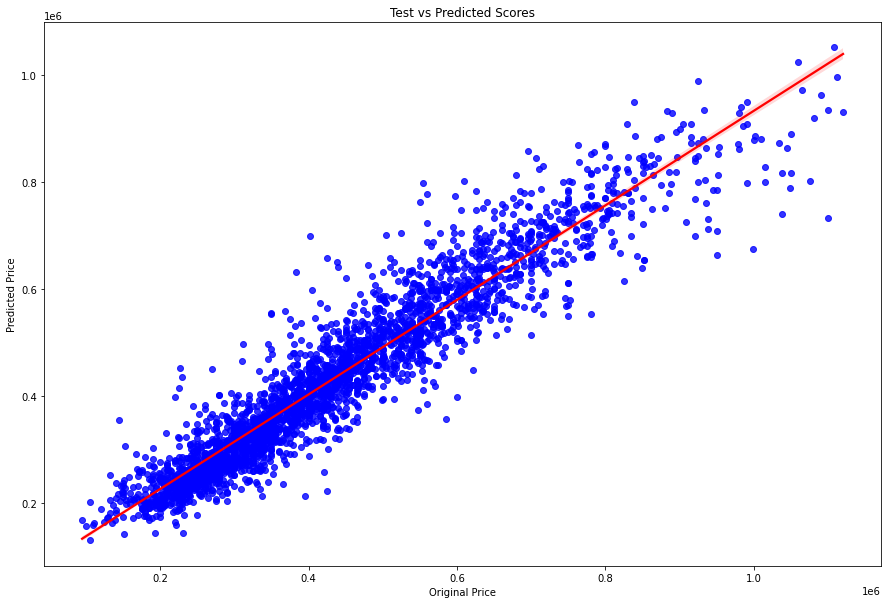

In [94]:
## plot the test, predicted score
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()

<font size="3">
    
PLOT OF LOSS FUNCTION AND EXPLANATION

</font>

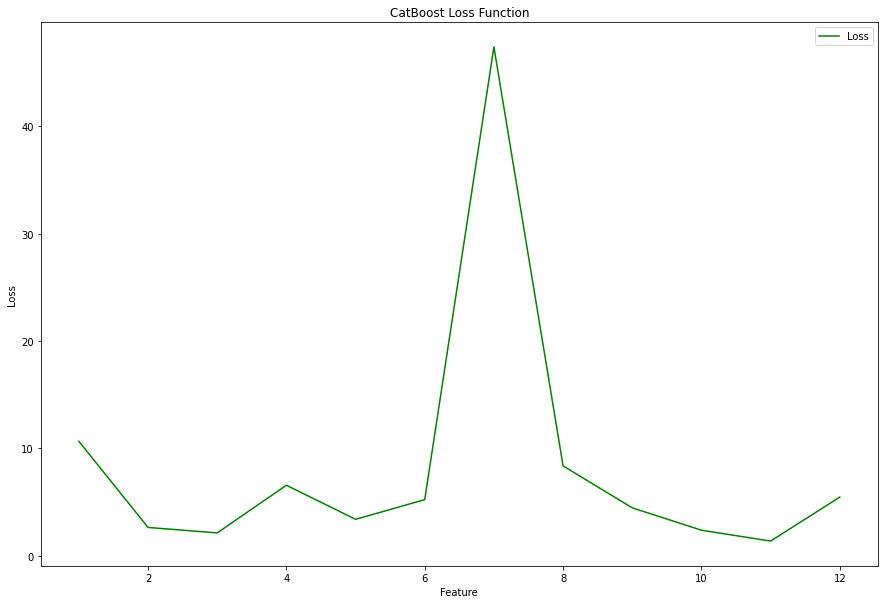

In [95]:
## Plot the loss function with cat boost regressor

model7.fit(X_train, y_train, verbose=False)

# Generate the loss function plot
plt.figure(figsize=(15, 10))
iterations = range(1, len(model7.get_feature_importance()) + 1)
losses = model7.get_feature_importance()
plt.plot(iterations, losses, label='Loss',color = 'green')
plt.xlabel('Feature')
plt.ylabel('Loss')
plt.title('CatBoost Loss Function')
plt.legend()
plt.show()

<font size="3">
    

This loss function plot is generated to visualize the loss values associated with each feature. The loss values provide insights into the importance and contribution of each feature in predicting the target variable.
    
In the loss function plot, a higher loss value for the feature 7 indicates that the model's predictions are more sensitive to variations of this feature. Therefore, feature number 7,"latitude" plays a significant role in determining the target variable and has a strong impact on the accuracy of the model's predictions.
    
</font>

<font size="3">
    
EVALUATION OF MODEL PERFORMANCES
    
</font>


      Actual  Predicted
0  431000.00  363463.16
1  240000.00  284051.12
2  367500.00  412286.03
3  374950.00  371274.63
4  500000.00  472254.99
..       ...        ...
15 406000.00  469539.71
16 750000.00  765825.73
17 360000.00  361275.66
18 357500.00  355462.56
19 622500.00  548651.31

[20 rows x 2 columns]


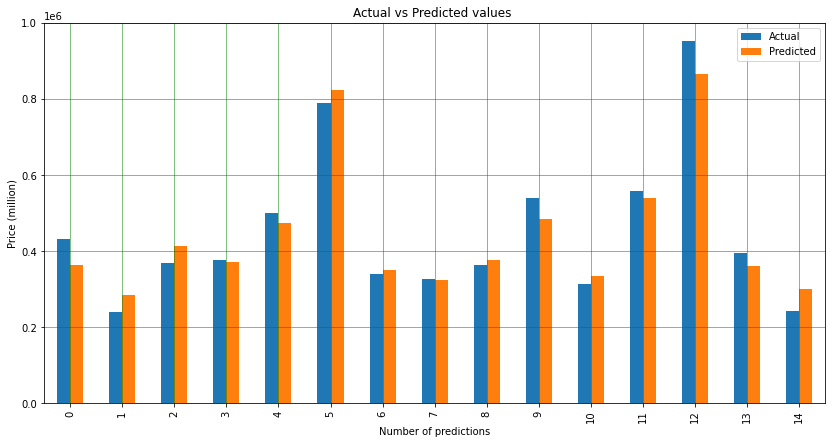

Test vs Pred MAE: 40742.03
Test vs Pred MSE: 3321013142.04
Test vs Pred RMSE: 57628.23
CBR, R-Squared: 89.9 %


In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model7.fit(X_train,y_train,verbose=False)
yhat = model7.predict(X_test)
y_test = np.array(list(y_test))
yhat = np.array(list(yhat))

linear_score = r2_score(y_test, yhat)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yhat.flatten()})
df1 = df1.round(2)
print(df1.head(20))


## Create bar graph atual(y) vs predicted (y)
df2 = df1.head(15)
df2.plot(kind='bar',figsize=(14,7))
plt = pyplot
plt.title('Actual vs Predicted values ') 
plt.xlabel('Number of predictions')
plt.ylabel('Price (million)')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Test vs Pred MAE:', round(mean_absolute_error(y_test, yhat), 2))
print('Test vs Pred MSE:', round(mean_squared_error(y_test, yhat), 2))
print('Test vs Pred RMSE:', round(np.sqrt(mean_squared_error(y_test, yhat)), 2))
print('CBR, R-Squared:', round(linear_score * 100, 2),'%')


<font size="3">
    
The visual comparison of actual prices and predicted prices, as shown above, confirms our expectations. It is evident that there are instances where the model has both overestimated and underestimated the prices. This variation between the actual and predicted values is a common occurrence in predictive modeling and highlights the inherent uncertainty in making accurate predictions. By visually examining the bar chart visualization, we can observe these discrepancies and gain insights into the model's performance and areas for improvement. 

</font>


<font size="3">
    
RESIDUAL PLOT AND FINDINGS

</font>

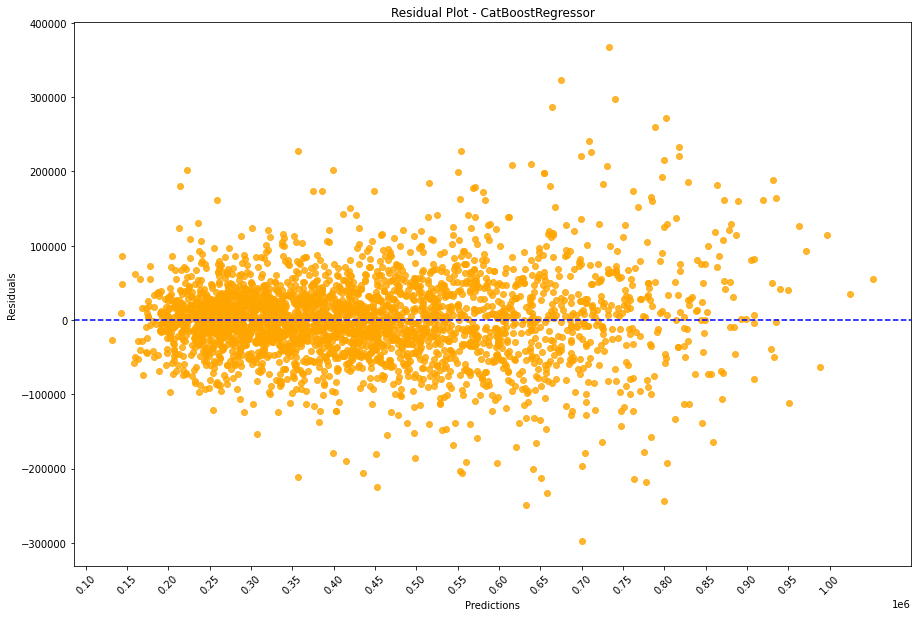

In [97]:

## Fit the CatBoostRegressor model
import matplotlib.ticker as ticker
model7.fit(X_train, y_train, verbose=False)

y_pred = model7.predict(X_test) # make prediction of price
residuals = y_test - y_pred # calculate the residual

## residual chart
plt.figure(figsize=(15,10))
plt.scatter(y_pred, residuals, c='orange', alpha=0.8)
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel('Predictions')
plt.xticks(range(100000, 1000001, 50000), rotation=45)

plt.ylabel('Residuals')
plt.title('Residual Plot - CatBoostRegressor')


plt.show()

<font size="3">
    
The deviations above the line indicate overestimation by the model, while deviations below the line indicate underestimation. This shows the direction and magnitude of the errors made by the model.

The residual plot exhibits no clear trend or pattern and is approximately symmetrical. This suggests that the model is capturing the required relationships between the predictors and the target variable, and there is no systematic bias in the predictions.

The spread of the residuals changes with the predicted values, indicating heteroscedasticity. This means that the model's predictions may be more accurate for certain ranges of the target variable than others.

The residual plot shows the presence of outliers. These outliers represent data points that are poorly predicted by the model or instances with unusual characteristics. 
    
</font>

In [98]:
## Residual distribution in bokeh library

data = pd.DataFrame({'Predictions': y_pred, 'Residuals': residuals})# create dataframe
plt_r =data.groupby(['Residuals'])['Residuals'].mean() # plot data

##  Assogn RGB color
red = 200
green = 50
blue = 100
color = RGB(r = red,
            g = green,
            b = blue)

plt_r.plot_bokeh(kind="hist", title="Mean residual distribution plot",
                 figsize=(800, 500),
                 xlabel="Residuals",
                 ylabel="Frequency",
                 stacked=True,
                color = color)


Figure(id='3184', ...)

<font size="3">
    
The residual distribution appears to be approximately normal. This indicates that the model's predictions are unbiased and accurate on average. The residuals are symmetrically distributed around zero, which is a desirable characteristic for a well-performing model. The normality of the residuals suggests that the model is capturing the underlying patterns and relationships in the data effectively.
    
</font>


<font size="3">
    
EVALUATION MATRIX
    
For evaluation, the following matrices were used to compare the models:
    
R-squared (R2)
It represents the proportion of the variance for a dependent variable that is explained by independent variables in a regression model. R2 does not take into consideration any biases that might be present in the data. Therefore, a good model might have a low R2 value, or a model that does not fit the data might have a high R2 value.
    
MSE (Mean Square Error)
MSE = (1/n) * ∑(i=1 to n) (Yi - Ŷi)^2
    
This measures the squared average distance between the real data and the predicted data. It is not ideal for data with different units as it square up the units. 
    

RMSE (Root Mean Square Error)
RMSE = √((∑(i=1 to n) (yi - ŷi)^2) / n) 
    
RMSE is a popular measure of error rate of a regression model. However, it can only be compared between models with errors can measure in the same units.
   
MAE(Mean Absolute Error)

MAE = (1/n) * ∑(i=1 to n) |Yi - Ŷi|
    
Measures absolute average distance between real data and predicted data. It gives us the measure of how far the predictions were from the actual output. However, they do not give any idea of the direction of the error like whether it was under predicting the data or over predicting the data.

    


</font>

<font size="3">
    
After evaluating several regression models, it has been determined that the CatBoostRegressor model provides the most accurate predictions for the KC House price.

Through optimization, the best parameters for the model were identified as 2000 iterations, a maximal depth of 8, a leaf regularization parameter of 2, and RMSE as the loss function. With these parameters, the optimized model achieved an impressive R2 score of 89.9% in predicting the house prices.

Additionally, the minimized Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) scores further highlight the variations between the actual and predicted house prices. The RMSE score, which measures the average difference between the actual and predicted prices, is 57628.23, and the MAE score, which represents the average absolute difference between the actual and predicted prices, is 40742.03.

These scores indicate that, on average, the predicted prices deviate from the actual prices by approximately $57628.33 (RMSE) and $40742.03 (MAE). While these values may seem relatively large, it's important to consider the context of the housing market and the scale of the prices being predicted. The RMSE and MAE scores provide useful insights into the level of accuracy achieved by the model and help assess its performance in predicting house prices.

Based on the optimized model, the critical factors that significantly influence the prediction of house prices are as follows:
Grade: The overall grade assigned to the property.
Sqft_living: The square footage of the living area.
Lat: The latitude coordinate of the location.
Sqft_living_15: The average square footage of nearby houses built in the last 15 years.
Sqft_above: The square footage of the interior living space above ground level.
Bathrooms: The number of bathrooms in the house.
Floors: The number of floors in the house.
Sqft_basement: The square footage of the basement area.
Sqft_lot15: The average square footage of nearby land lots in the last 15 years.
Condition: The overall condition of the property.
Sqft_lot: The square footage of the land lot.

These features are crucial in determining house prices, and their impact aligns with common expectations. It is reasonable to expect that factors such as the grade, living area size, location coordinates, nearby house and lot sizes, and various other characteristics would play significant roles in influencing house prices.

Overall, the CatBoost Regressor model, with its optimized parameters and influential features, demonstrates strong predictive capabilities for determining house prices accurately in the KC area.

</font>

<font size="4">

Summary
</font>

    
<font size="3">

This analysis began with data exploration, where I gained an understanding of the dataset, checked for missing data, and identified important features. Visualizations were created using bokeh, seaborn and matplotlib to aid in this process. In the data preprocessing phase, I addressed missing values, transformed features into numeric formats,etc.

Following preprocessing, I proceeded to train ten different machine learning models. Among them, we selected the catboost regression model and conducted cross-validation to assess its performance. I delved into the inner workings of the catboost regression algorithm, examined the assigned importance to various features, and fine-tuned its performance by optimizing hyperparameter values.

I thoroughly examined the RMSE, MAE, and R-squared values to evaluate the accuracy and precision of the predicted prices. These metrics provided valuable insights into the performance of the model. Additionally, I investigated the sensitivity of key features involved in predicting the price. This analysis helped identify the most influential factors affecting the price prediction.

Furthermore, I analyzed the residual plot to assess the model's stability, robustness, and overall performance. The residual plot allowed me to visually assess the distribution of the residuals and identify any patterns or systematic deviations from the regression line. This analysis provided further insights into the model's performance and helped validate its effectiveness in capturing the underlying relationships in the data.

By considering all of these evaluations, including the RMSE, MAE, R-squared values, sensitivity analysis, and residual plot, I gained a comprehensive understanding of the model's performance, its strengths, and potential areas for improvement.
    
</font>